In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Keras
#import tensorflow as tf
import IPython
import keras
from keras import regularizers

from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D,Conv2D,MaxPool2D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from keras import losses, models, optimizers
from keras.activations import relu, softmax
from keras.layers import (Conv2D,Conv2DTranspose, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout,
                          GlobalMaxPool2D, MaxPool2D, concatenate, Activation, Input, Dense)
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer


# from keras_preprocessing.sequence import pad_sequences


# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Other
from tqdm import tqdm, tqdm_pandas
import scipy
from scipy.stats import skew
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob
import os
import sys
import IPython.display as Audio  # To play sound in the notebook
import warnings

import numpy as np # linear algebra
import pandas as pd
from tqdm import tqdm
from glob import glob
from keras.layers import *
from keras.models import *
from keras.utils import *
import numpy as np
import os
from tensorflow.keras.optimizers import Adam

# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
!git clone https://github.com/mcdermottLab/pycochleagram

Cloning into 'pycochleagram'...
remote: Enumerating objects: 468, done.
remote: Total 468 (delta 0), reused 0 (delta 0), pack-reused 468
Receiving objects: 100% (468/468), 4.62 MiB | 25.83 MiB/s, done.
Resolving deltas: 100% (241/241), done.


In [ ]:
cd /content/pycochleagram

/content/pycochleagram


In [ ]:
!python setup.py install

running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based t

In [ ]:
from pycochleagram import erbfilter as erb
from pycochleagram import utils
from pycochleagram import cochleagram as cgram
from pycochleagram import erbfilter as erb
from pycochleagram import utils

import pycochleagram.cochleagram as cgram

In [ ]:
if utils.check_if_display_exists():
  import matplotlib.pyplot as plt
  from matplotlib.pyplot import imshow, show
else:
  import matplotlib
  matplotlib.use('Agg')
  import matplotlib.pyplot as plt
  from matplotlib.pyplot import imshow, show

In [ ]:
banglaSER = "/content/drive/MyDrive/data/BanglaSER"
banglaSER_directory_list = os.listdir(banglaSER)
banglaSER_directory_list

['Actor 28',
 'Actor 30',
 'Actor 33',
 'Actor 32',
 'Actor 34',
 'Actor 25',
 'Actor 26',
 'Actor 27',
 'Actor 31',
 'Actor 29',
 'Actor 19',
 'Actor 24',
 'Actor 15',
 'Actor 21',
 'Actor 18',
 'Actor 20',
 'Actor 16',
 'Actor 22',
 'Actor 23',
 'Actor 17',
 'Actor 13',
 'Actor 12',
 'Actor 09',
 'Actor 05',
 'Actor 08',
 'Actor 07',
 'Actor 06',
 'Actor 11',
 'Actor 10',
 'Actor 14',
 'Actor 04',
 'Actor 01',
 'Actor 03',
 'Actor 02']

In [ ]:
a=list()
b=list()
c=list()
# Ravdess preprocess
banglaSER_directory_list = os.listdir(banglaSER)
file_path = []
file_emotion = []
for directory in banglaSER_directory_list:
    # 24 different actors in Ravdess directory needed to be extracted as files for each actor
    actor = os.listdir(banglaSER + '/' + directory)
    for file in actor:
        part1 = file.split('.')[0]
        # print(part1)
        part2 = part1.split('-')
        # print(part2)
        # third part in each file represents the emotion associated to that file
        file_emotion.append(int(part2[2]))
        file_path.append(banglaSER + '/' + directory + '/' + file)

        a.append(banglaSER +'/'+ directory +'/'+file)
        b.append(part1)
        c.append(part2)

In [ ]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files
path_df = pd.DataFrame(file_path, columns=['Path'])
banglaSER_df = pd.concat([emotion_df, path_df], axis=1)
# decode integers to actual emotions
banglaSER_df.Emotions.replace({1:'angry', 2:'happy', 3:'neutral', 4:'sad', 5:'surprise'}, inplace=True)
banglaSER_df.head()

,Emotions,Path
0,happy,/content/drive/MyDrive/data/BanglaSER/Actor 28...
1,happy,/content/drive/MyDrive/data/BanglaSER/Actor 28...
2,happy,/content/drive/MyDrive/data/BanglaSER/Actor 28...
3,angry,/content/drive/MyDrive/data/BanglaSER/Actor 28...
4,angry,/content/drive/MyDrive/data/BanglaSER/Actor 28...


In [ ]:
banglaSER_df.shape

(1472, 2)

In [ ]:
banglaSER_df.Emotions.value_counts()

angry       307
happy       306
neutral     306
sad         306
surprise    247
Name: Emotions, dtype: int64

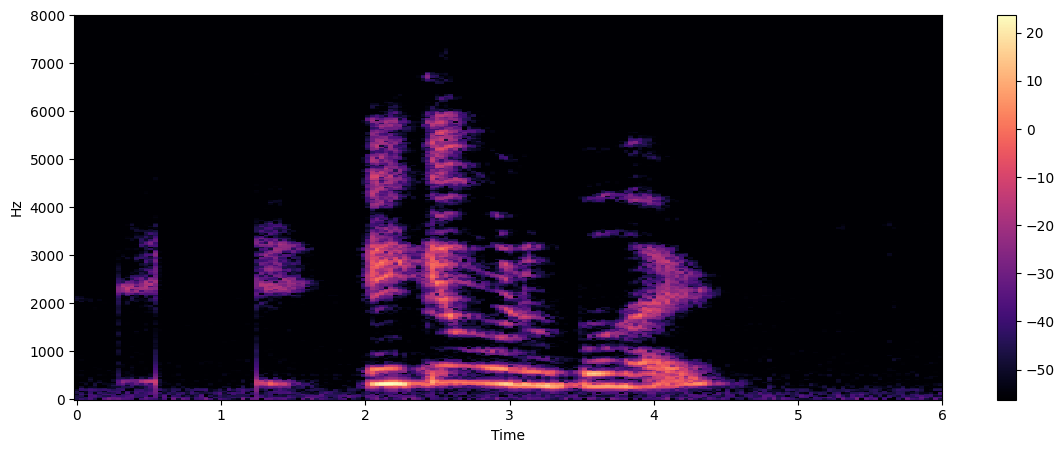

In [ ]:
emotion='angry'
path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[30]
data, sr = librosa.load(path,sr=16000, duration=3)
st_data = np.abs(librosa.stft(data,n_fft=512,hop_length=256,win_length=512))
st_db = librosa.amplitude_to_db(st_data)
plt.figure(figsize=(14, 5))
librosa.display.specshow(st_db, sr=16000, x_axis='time', y_axis='hz')
plt.colorbar()

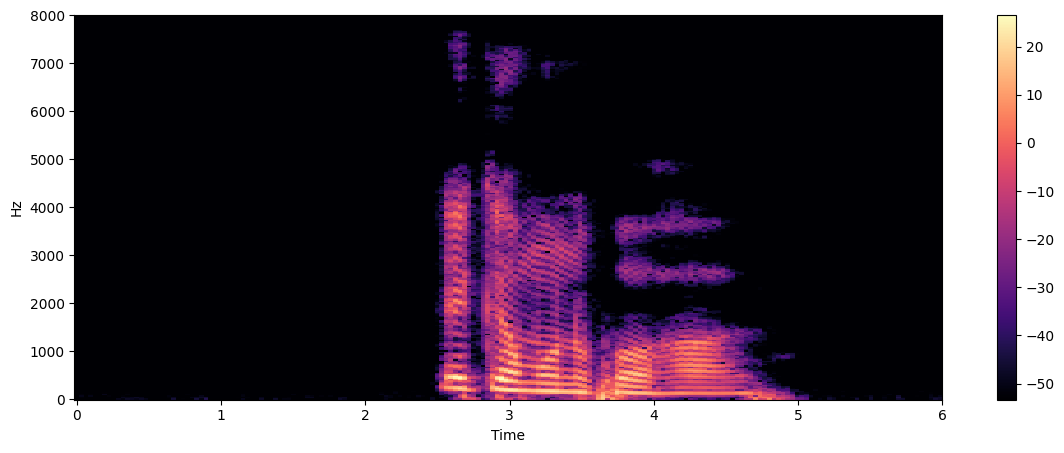

In [ ]:
emotion='sad'
path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[50]
data, sr = librosa.load(path,sr=16000, duration=3)
st_data = np.abs(librosa.stft(data,n_fft=512,hop_length=256,win_length=512))
st_db = librosa.amplitude_to_db(st_data)
plt.figure(figsize=(14, 5))
librosa.display.specshow(st_db, sr=16000, x_axis='time', y_axis='hz')
plt.colorbar()

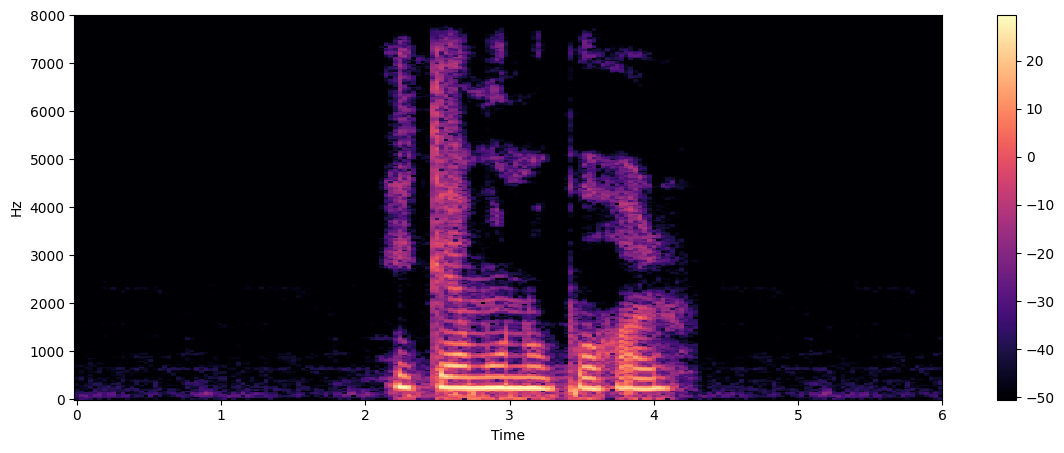

In [ ]:
emotion='surprise'
path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[30]
data, sr = librosa.load(path,sr=16000, duration=3)
st_data = np.abs(librosa.stft(data,n_fft=512,hop_length=256,win_length=512))
st_db = librosa.amplitude_to_db(st_data)
plt.figure(figsize=(14, 5))
librosa.display.specshow(st_db, sr=16000, x_axis='time', y_axis='hz')
plt.colorbar()

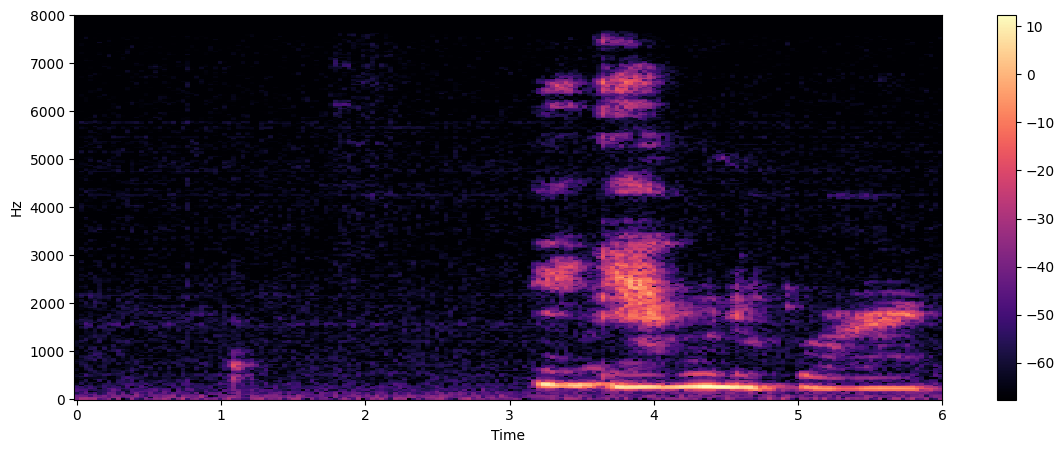

In [ ]:
emotion='happy'
path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[30]
data, sr = librosa.load(path,sr=16000, duration=3)
st_data = np.abs(librosa.stft(data,n_fft=512,hop_length=256,win_length=512))
st_db = librosa.amplitude_to_db(st_data)
plt.figure(figsize=(14, 5))
librosa.display.specshow(st_db, sr=16000, x_axis='time', y_axis='hz')
plt.colorbar()

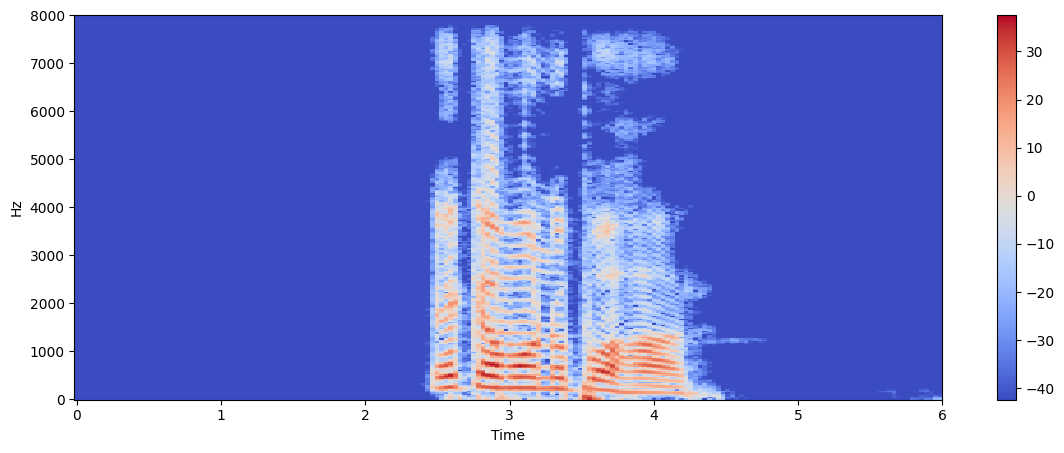

In [ ]:
emotion='neutral'
path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[50]
data, sr = librosa.load(path,sr=16000, duration=3)
st_data = np.abs(librosa.stft(data,n_fft=512,hop_length=256,win_length=512))
st_db = librosa.amplitude_to_db(st_data)
plt.figure(figsize=(14, 5))
librosa.display.specshow(st_db, sr=16000, x_axis='time', y_axis='hz')
plt.colorbar()

In [ ]:
def create_mel_spectrogram(data, sr, e):
    mel_signal = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=30)
    spectrogram = np.abs(mel_signal)
    power_to_db = librosa.amplitude_to_db(spectrogram, ref=np.max)
    plt.figure(figsize=(12, 3))
    plt.title('Mel-Spectrogram for {}'.format(e), size=15)
    librosa.display.specshow(power_to_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar()

In [ ]:
# Method 3
import scipy
from scipy.io import wavfile
sample_rate= 16000
# function to convert the information into
# some readable format
def output_duration(length):
	hours = length // 3600 # calculate in hours
	length %= 3600
	mins = length // 60 # calculate in minutes
	length %= 60
	seconds = length # calculate in seconds

	return hours, mins, seconds

# sample_rate holds the sample rate of the wav file
# in (sample/sec) format
# data is the numpy array that consists
# of actual data read from the wav file
count = 0
for r in np.array(banglaSER_df.Path):
  sample_rate, data = wavfile.read(r)

  len_data = len(data) # holds length of the numpy array

  t = len_data / sample_rate # returns duration but in floats

  hours, mins, seconds = output_duration(int(t))
  print('Total Duration: {}:{}:{}'.format(hours, mins, seconds))
  count= count+1
print(count)

Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Dura

<ipython-input-14-76bfaed6e391>:22: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wavfile.read(r)


Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Dura

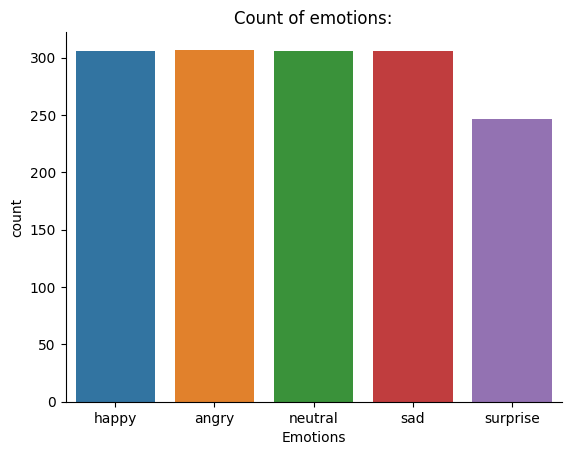

In [ ]:
plt.title("Count of emotions:")
sns.countplot(x=banglaSER_df["Emotions"])
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

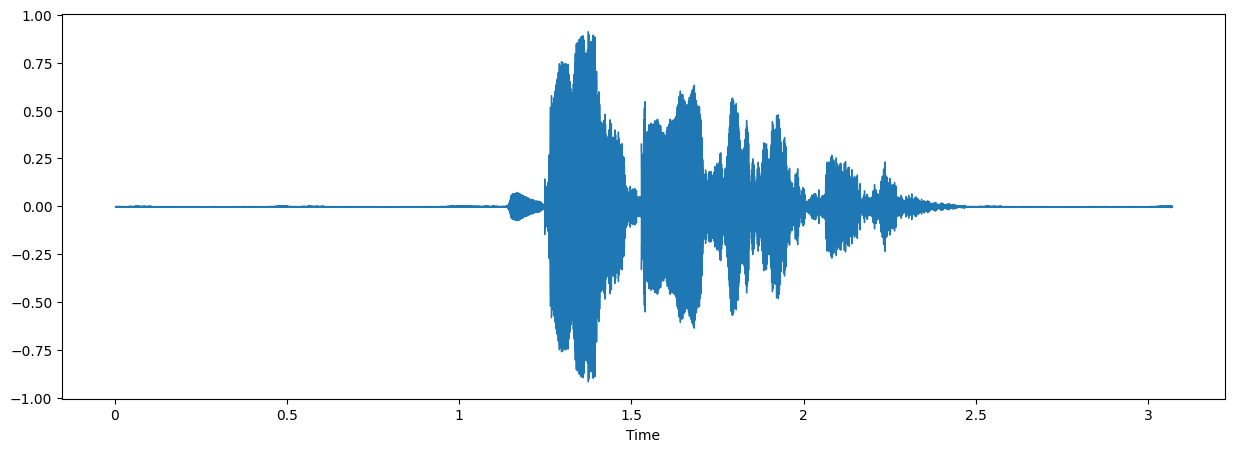

In [ ]:
# Use one audio file in previous parts again
fname = file_path[4]
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Paly it again to refresh our memory
IPython.display.Audio(data, rate=sampling_rate)

In [ ]:
def match_dimension(data,input_length):

  if len(data) > input_length:
      max_offset = int(len(data) - input_length)
      data = data[0:input_length]
  else:
      max_offset =int(input_length - len(data))
      offset = np.zeros(max_offset)
      data=np.concatenate((data,offset),axis=0)

  return data

In [ ]:
from scipy.signal import resample

**COCHLEAGRAM FEATURE**

In [ ]:
sampling_rate = 16000
audio_duration = 3
new_mfcc_dim = 144  # Desired second dimension for the output Cochleagram

def prepare_data(df, n, cochlea):
    X = np.empty(shape=(df.shape[0], n, new_mfcc_dim, 1))

    cnt = 0
    for fname in tqdm(df.Path):
        file_path = fname
        data, sr = librosa.load(file_path, sr=sampling_rate, duration=audio_duration)

        if len(data) != sampling_rate * audio_duration:
            # Random offset / Padding
            data = match_dimension(data, 48000)

        # Cochleagram extraction
        if cochlea == 1:
            cochleagram = cgram.human_cochleagram(data, sr, n=None, low_lim=50, hi_lim=20000, sample_factor=2, padding_size=None, downsample=None, nonlinearity=None, fft_mode='auto', ret_mode='envs', strict=False)
            cochleagram_downsampled = resample(cochleagram, new_mfcc_dim, axis=1)  # Adjust to have new_mfcc_dim columns
            cochleagram_downsampled = np.expand_dims(cochleagram_downsampled, axis=-1)
        else:
            cochleagram_downsampled = np.zeros_like(X[cnt, :, :, :])  # Placeholder for cases when Cochleagram is not selected

        X[cnt,] = cochleagram_downsampled
        print('Cochleagram shape:', cochleagram_downsampled.shape)

        cnt += 1

    return X

# Example usage:
# Assuming data_path is a DataFrame containing the file paths
X = prepare_data(df=banglaSER_df, n=81, cochlea=1)

  0%|          | 0/1472 [00:00<?, ?it/s]

here


  0%|          | 1/1472 [00:00<09:31,  2.57it/s]

Cochleagram shape: (81, 144, 1)
here


  0%|          | 2/1472 [00:00<08:46,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


  0%|          | 3/1472 [00:01<08:28,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


  0%|          | 4/1472 [00:01<08:24,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


  0%|          | 5/1472 [00:01<09:11,  2.66it/s]

Cochleagram shape: (81, 144, 1)
here


  0%|          | 6/1472 [00:02<09:59,  2.45it/s]

Cochleagram shape: (81, 144, 1)
here


  0%|          | 7/1472 [00:02<10:07,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 8/1472 [00:03<10:33,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 9/1472 [00:03<10:38,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 10/1472 [00:04<10:52,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 11/1472 [00:04<10:58,  2.22it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 12/1472 [00:05<11:05,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 13/1472 [00:05<10:58,  2.22it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 14/1472 [00:05<11:10,  2.18it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 15/1472 [00:06<10:24,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 16/1472 [00:06<09:42,  2.50it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 17/1472 [00:06<09:07,  2.66it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 18/1472 [00:07<08:41,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|▏         | 19/1472 [00:07<08:25,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|▏         | 20/1472 [00:07<08:15,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|▏         | 21/1472 [00:08<08:00,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|▏         | 22/1472 [00:08<08:06,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 23/1472 [00:08<07:54,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 24/1472 [00:09<07:51,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 25/1472 [00:09<07:46,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 26/1472 [00:09<07:52,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 27/1472 [00:10<07:45,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 28/1472 [00:10<07:49,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 29/1472 [00:10<07:45,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 30/1472 [00:11<07:49,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 31/1472 [00:11<07:41,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 32/1472 [00:11<07:56,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 33/1472 [00:12<07:48,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 34/1472 [00:12<07:43,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 35/1472 [00:12<07:43,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 36/1472 [00:13<07:42,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 37/1472 [00:13<07:37,  3.14it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 38/1472 [00:13<07:48,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 39/1472 [00:14<07:41,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 40/1472 [00:14<07:45,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 41/1472 [00:14<07:38,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 42/1472 [00:15<07:46,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 43/1472 [00:15<07:42,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 44/1472 [00:15<07:44,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 45/1472 [00:16<07:41,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 46/1472 [00:16<08:29,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 47/1472 [00:16<09:18,  2.55it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 48/1472 [00:17<09:45,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 49/1472 [00:17<10:02,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 50/1472 [00:18<10:17,  2.30it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 51/1472 [00:18<10:18,  2.30it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▎         | 52/1472 [00:19<10:36,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▎         | 53/1472 [00:19<10:30,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▎         | 54/1472 [00:20<10:44,  2.20it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▎         | 55/1472 [00:20<10:42,  2.20it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 56/1472 [00:20<10:10,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 57/1472 [00:21<09:25,  2.50it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 58/1472 [00:21<08:51,  2.66it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 59/1472 [00:21<08:21,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 60/1472 [00:22<08:13,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 61/1472 [00:22<07:55,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 62/1472 [00:22<07:51,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 63/1472 [00:23<07:45,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 64/1472 [00:23<07:42,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 65/1472 [00:23<07:35,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 66/1472 [00:24<07:34,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▍         | 67/1472 [00:24<07:24,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▍         | 68/1472 [00:24<07:23,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▍         | 69/1472 [00:25<07:17,  3.21it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▍         | 70/1472 [00:25<07:25,  3.14it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▍         | 71/1472 [00:25<07:21,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▍         | 72/1472 [00:26<07:26,  3.14it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▍         | 73/1472 [00:26<07:25,  3.14it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▌         | 74/1472 [00:26<07:26,  3.13it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▌         | 75/1472 [00:26<07:20,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▌         | 76/1472 [00:27<07:29,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▌         | 77/1472 [00:27<07:25,  3.13it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▌         | 78/1472 [00:27<07:25,  3.13it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▌         | 79/1472 [00:28<07:18,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▌         | 80/1472 [00:28<07:28,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 81/1472 [00:28<07:24,  3.13it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 82/1472 [00:29<07:26,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 83/1472 [00:29<07:28,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 84/1472 [00:29<07:29,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 85/1472 [00:30<07:21,  3.14it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 86/1472 [00:30<07:32,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 87/1472 [00:30<07:33,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 88/1472 [00:31<08:41,  2.65it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 89/1472 [00:31<09:12,  2.50it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 90/1472 [00:32<09:34,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 91/1472 [00:32<09:42,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▋         | 92/1472 [00:33<10:03,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▋         | 93/1472 [00:33<10:14,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▋         | 94/1472 [00:34<10:19,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▋         | 95/1472 [00:34<10:14,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 96/1472 [00:35<10:24,  2.20it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 97/1472 [00:35<09:54,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 98/1472 [00:35<09:15,  2.47it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 99/1472 [00:36<09:01,  2.54it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 100/1472 [00:36<08:42,  2.63it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 101/1472 [00:36<08:15,  2.76it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 102/1472 [00:37<07:59,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 103/1472 [00:37<07:41,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 104/1472 [00:37<07:35,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 105/1472 [00:38<07:28,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 106/1472 [00:38<07:28,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 107/1472 [00:38<07:21,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 108/1472 [00:39<07:22,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 109/1472 [00:39<07:18,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 110/1472 [00:39<07:18,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 111/1472 [00:39<07:20,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 112/1472 [00:40<07:21,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 113/1472 [00:40<07:15,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 114/1472 [00:40<07:17,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 115/1472 [00:41<07:17,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 116/1472 [00:41<07:18,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 117/1472 [00:41<07:16,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 118/1472 [00:42<07:20,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 119/1472 [00:42<07:15,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 120/1472 [00:42<07:15,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 121/1472 [00:43<07:15,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 122/1472 [00:43<07:14,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 123/1472 [00:43<07:11,  3.13it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 124/1472 [00:44<07:19,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 125/1472 [00:44<07:13,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▊         | 126/1472 [00:44<07:15,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▊         | 127/1472 [00:45<07:18,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▊         | 128/1472 [00:45<08:03,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 129/1472 [00:46<08:42,  2.57it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 130/1472 [00:46<09:13,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 131/1472 [00:46<09:37,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 132/1472 [00:47<09:52,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 133/1472 [00:47<09:52,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 134/1472 [00:48<10:11,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 135/1472 [00:48<10:00,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 136/1472 [00:49<10:12,  2.18it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 137/1472 [00:49<10:09,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 138/1472 [00:50<09:25,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 139/1472 [00:50<08:45,  2.54it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|▉         | 140/1472 [00:50<08:16,  2.68it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|▉         | 141/1472 [00:51<07:50,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|▉         | 142/1472 [00:51<07:42,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|▉         | 143/1472 [00:51<07:25,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|▉         | 144/1472 [00:52<07:20,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|▉         | 145/1472 [00:52<07:13,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|▉         | 146/1472 [00:52<07:13,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|▉         | 147/1472 [00:52<07:07,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|█         | 148/1472 [00:53<07:05,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|█         | 149/1472 [00:53<07:08,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|█         | 150/1472 [00:53<07:07,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|█         | 151/1472 [00:54<07:03,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|█         | 152/1472 [00:54<07:13,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|█         | 153/1472 [00:54<07:02,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|█         | 154/1472 [00:55<07:06,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 155/1472 [00:55<07:05,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 156/1472 [00:55<07:04,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 157/1472 [00:56<06:57,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 158/1472 [00:56<07:01,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 159/1472 [00:56<07:02,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 160/1472 [00:57<07:05,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 161/1472 [00:57<07:01,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 162/1472 [00:57<07:05,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 163/1472 [00:58<07:00,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 164/1472 [00:58<06:56,  3.14it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 165/1472 [00:58<06:59,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█▏        | 166/1472 [00:59<06:55,  3.14it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█▏        | 167/1472 [00:59<06:52,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█▏        | 168/1472 [00:59<07:06,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█▏        | 169/1472 [01:00<07:43,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 170/1472 [01:00<08:32,  2.54it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 171/1472 [01:01<08:49,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 172/1472 [01:01<09:16,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 173/1472 [01:01<09:18,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 174/1472 [01:02<09:31,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 175/1472 [01:02<09:32,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 176/1472 [01:03<09:36,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 177/1472 [01:03<09:29,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 178/1472 [01:04<09:38,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 179/1472 [01:04<09:06,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 180/1472 [01:04<08:34,  2.51it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 181/1472 [01:05<08:00,  2.69it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 182/1472 [01:05<07:40,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 183/1472 [01:05<07:27,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▎        | 184/1472 [01:06<07:14,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 185/1472 [01:06<07:05,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 186/1472 [01:06<07:01,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 187/1472 [01:07<06:57,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 188/1472 [01:07<06:56,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 189/1472 [01:07<06:49,  3.13it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 190/1472 [01:08<06:56,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 191/1472 [01:08<06:48,  3.13it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 192/1472 [01:08<06:49,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 193/1472 [01:09<06:54,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 194/1472 [01:09<06:55,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 195/1472 [01:09<06:50,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 196/1472 [01:10<06:55,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 197/1472 [01:10<06:53,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 198/1472 [01:10<06:54,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▎        | 199/1472 [01:11<06:52,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▎        | 200/1472 [01:11<06:55,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▎        | 201/1472 [01:11<06:49,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▎        | 202/1472 [01:12<06:50,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 203/1472 [01:12<06:50,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 204/1472 [01:12<06:52,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 205/1472 [01:13<06:48,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 206/1472 [01:13<06:54,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 207/1472 [01:13<06:51,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 208/1472 [01:13<06:51,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 209/1472 [01:14<06:54,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 210/1472 [01:14<07:27,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 211/1472 [01:15<07:59,  2.63it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 212/1472 [01:15<08:35,  2.44it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 213/1472 [01:16<08:46,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▍        | 214/1472 [01:16<09:05,  2.30it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▍        | 215/1472 [01:17<09:12,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▍        | 216/1472 [01:17<09:29,  2.20it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▍        | 217/1472 [01:17<09:30,  2.20it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▍        | 218/1472 [01:18<09:27,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▍        | 219/1472 [01:18<09:36,  2.17it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▍        | 220/1472 [01:19<09:02,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▌        | 221/1472 [01:19<08:28,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▌        | 222/1472 [01:19<07:50,  2.66it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▌        | 223/1472 [01:20<07:31,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▌        | 224/1472 [01:20<07:17,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▌        | 225/1472 [01:20<07:05,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▌        | 226/1472 [01:21<06:53,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▌        | 227/1472 [01:21<06:53,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▌        | 228/1472 [01:21<06:49,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 229/1472 [01:22<06:47,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 230/1472 [01:22<06:38,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 231/1472 [01:22<06:43,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 232/1472 [01:23<06:38,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 233/1472 [01:23<06:41,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 234/1472 [01:23<06:39,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 235/1472 [01:24<06:39,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 236/1472 [01:24<06:34,  3.13it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 237/1472 [01:24<06:40,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 238/1472 [01:25<06:34,  3.13it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 239/1472 [01:25<06:33,  3.14it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▋        | 240/1472 [01:25<06:43,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▋        | 241/1472 [01:26<06:39,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▋        | 242/1472 [01:26<06:40,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 243/1472 [01:26<06:36,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 244/1472 [01:27<06:38,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 245/1472 [01:27<06:33,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 246/1472 [01:27<06:33,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 247/1472 [01:27<06:31,  3.13it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 248/1472 [01:28<06:32,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 249/1472 [01:28<06:28,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 250/1472 [01:28<06:32,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 251/1472 [01:29<06:49,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 252/1472 [01:29<07:36,  2.67it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 253/1472 [01:30<08:03,  2.52it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 254/1472 [01:30<08:24,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 255/1472 [01:31<08:30,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 256/1472 [01:31<08:49,  2.30it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 257/1472 [01:32<09:02,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 258/1472 [01:32<09:06,  2.22it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 259/1472 [01:32<09:02,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 260/1472 [01:33<09:12,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 261/1472 [01:33<08:50,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 262/1472 [01:34<08:12,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 263/1472 [01:34<07:34,  2.66it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 264/1472 [01:34<07:17,  2.76it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 265/1472 [01:35<06:56,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 266/1472 [01:35<06:49,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 267/1472 [01:35<06:41,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 268/1472 [01:36<06:36,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 269/1472 [01:36<06:33,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 270/1472 [01:36<06:35,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 271/1472 [01:37<06:28,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 272/1472 [01:37<06:31,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▊        | 273/1472 [01:37<06:26,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▊        | 274/1472 [01:37<06:23,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▊        | 275/1472 [01:38<06:22,  3.13it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 276/1472 [01:38<06:22,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 277/1472 [01:38<06:15,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 278/1472 [01:39<06:15,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 279/1472 [01:39<06:13,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 280/1472 [01:39<06:14,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 281/1472 [01:40<06:11,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 282/1472 [01:40<06:18,  3.14it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 283/1472 [01:40<06:12,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 284/1472 [01:41<06:13,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 285/1472 [01:41<06:14,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 286/1472 [01:41<06:16,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 287/1472 [01:42<06:11,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|█▉        | 288/1472 [01:42<06:19,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|█▉        | 289/1472 [01:42<06:15,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|█▉        | 290/1472 [01:43<06:15,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|█▉        | 291/1472 [01:43<06:11,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|█▉        | 292/1472 [01:43<06:16,  3.13it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|█▉        | 293/1472 [01:44<07:00,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|█▉        | 294/1472 [01:44<07:41,  2.55it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|██        | 295/1472 [01:44<07:48,  2.51it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|██        | 296/1472 [01:45<08:12,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|██        | 297/1472 [01:45<08:18,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|██        | 298/1472 [01:46<08:31,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|██        | 299/1472 [01:46<08:34,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|██        | 300/1472 [01:47<08:42,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|██        | 301/1472 [01:47<08:44,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 302/1472 [01:48<08:47,  2.22it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 303/1472 [01:48<08:11,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 304/1472 [01:48<07:41,  2.53it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 305/1472 [01:49<07:09,  2.72it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 306/1472 [01:49<06:52,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 307/1472 [01:49<06:40,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 308/1472 [01:50<06:30,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 309/1472 [01:50<06:19,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 310/1472 [01:50<06:22,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 311/1472 [01:51<06:13,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 312/1472 [01:51<06:12,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██▏       | 313/1472 [01:51<06:06,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██▏       | 314/1472 [01:52<06:12,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██▏       | 315/1472 [01:52<06:06,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██▏       | 316/1472 [01:52<06:08,  3.14it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 317/1472 [01:52<06:10,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 318/1472 [01:53<06:10,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 319/1472 [01:53<06:05,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 320/1472 [01:53<06:09,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 321/1472 [01:54<06:07,  3.13it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 322/1472 [01:54<06:09,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 323/1472 [01:54<06:08,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 324/1472 [01:55<06:09,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 325/1472 [01:55<06:05,  3.14it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 326/1472 [01:55<06:07,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 327/1472 [01:56<06:04,  3.14it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 328/1472 [01:56<06:08,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 329/1472 [01:56<06:03,  3.14it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 330/1472 [01:57<06:07,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 331/1472 [01:57<06:02,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 332/1472 [01:57<06:07,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 333/1472 [01:58<06:12,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 334/1472 [01:58<06:25,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 335/1472 [01:58<07:01,  2.70it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 336/1472 [01:59<07:33,  2.50it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 337/1472 [01:59<07:46,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 338/1472 [02:00<08:05,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 339/1472 [02:00<08:09,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 340/1472 [02:01<08:26,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 341/1472 [02:01<08:20,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 342/1472 [02:02<08:26,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 343/1472 [02:02<08:31,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 344/1472 [02:03<08:21,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 345/1472 [02:03<07:42,  2.44it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▎       | 346/1472 [02:03<07:12,  2.60it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▎       | 347/1472 [02:03<06:49,  2.75it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▎       | 348/1472 [02:04<06:37,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▎       | 349/1472 [02:04<06:27,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 350/1472 [02:04<06:19,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 351/1472 [02:05<06:13,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 352/1472 [02:05<06:11,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 353/1472 [02:05<06:04,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 354/1472 [02:06<06:04,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 355/1472 [02:06<06:04,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 356/1472 [02:06<06:04,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 357/1472 [02:07<06:00,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 358/1472 [02:07<06:06,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 359/1472 [02:07<06:03,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 360/1472 [02:08<06:04,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▍       | 361/1472 [02:08<06:06,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▍       | 362/1472 [02:08<06:08,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▍       | 363/1472 [02:09<06:02,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▍       | 364/1472 [02:09<06:07,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▍       | 365/1472 [02:09<06:01,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▍       | 366/1472 [02:10<06:02,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▍       | 367/1472 [02:10<05:59,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▌       | 368/1472 [02:10<06:03,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▌       | 369/1472 [02:11<05:58,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▌       | 370/1472 [02:11<05:58,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▌       | 371/1472 [02:11<05:57,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▌       | 372/1472 [02:12<05:55,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▌       | 373/1472 [02:12<05:53,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▌       | 374/1472 [02:12<05:56,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▌       | 375/1472 [02:13<06:21,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 376/1472 [02:13<07:01,  2.60it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 377/1472 [02:14<07:16,  2.51it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 378/1472 [02:14<07:42,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 379/1472 [02:15<07:48,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 380/1472 [02:15<08:00,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 381/1472 [02:15<08:08,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 382/1472 [02:16<08:16,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 383/1472 [02:16<08:13,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 384/1472 [02:17<08:21,  2.17it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 385/1472 [02:17<07:55,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 386/1472 [02:18<07:24,  2.44it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▋       | 387/1472 [02:18<06:56,  2.61it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▋       | 388/1472 [02:18<06:35,  2.74it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▋       | 389/1472 [02:19<06:23,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▋       | 390/1472 [02:19<06:15,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 391/1472 [02:19<06:04,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 392/1472 [02:20<06:03,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 393/1472 [02:20<05:58,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 394/1472 [02:20<05:58,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 395/1472 [02:20<05:55,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 396/1472 [02:21<05:56,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 397/1472 [02:21<05:51,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 398/1472 [02:21<05:48,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 399/1472 [02:22<05:49,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 400/1472 [02:22<05:49,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 401/1472 [02:22<05:45,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 402/1472 [02:23<05:54,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 403/1472 [02:23<05:47,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 404/1472 [02:23<05:50,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 405/1472 [02:24<05:48,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 406/1472 [02:24<05:48,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 407/1472 [02:24<05:45,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 408/1472 [02:25<05:50,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 409/1472 [02:25<05:45,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 410/1472 [02:25<05:46,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 411/1472 [02:26<05:43,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 412/1472 [02:26<05:47,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 413/1472 [02:26<05:43,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 414/1472 [02:27<05:43,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 415/1472 [02:27<05:42,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 416/1472 [02:27<06:25,  2.74it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 417/1472 [02:28<06:59,  2.52it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 418/1472 [02:28<07:15,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 419/1472 [02:29<07:34,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▊       | 420/1472 [02:29<07:49,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▊       | 421/1472 [02:30<07:53,  2.22it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▊       | 422/1472 [02:30<08:04,  2.17it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▊       | 423/1472 [02:31<07:57,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 424/1472 [02:31<08:04,  2.16it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 425/1472 [02:32<08:00,  2.18it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 426/1472 [02:32<07:27,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 427/1472 [02:32<06:55,  2.52it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 428/1472 [02:33<06:30,  2.67it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 429/1472 [02:33<06:11,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 430/1472 [02:33<06:03,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 431/1472 [02:34<05:51,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 432/1472 [02:34<05:48,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 433/1472 [02:34<05:46,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 434/1472 [02:35<05:43,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|██▉       | 435/1472 [02:35<05:37,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|██▉       | 436/1472 [02:35<05:41,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|██▉       | 437/1472 [02:36<05:36,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|██▉       | 438/1472 [02:36<05:36,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|██▉       | 439/1472 [02:36<05:38,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|██▉       | 440/1472 [02:37<05:37,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|██▉       | 441/1472 [02:37<05:38,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|███       | 442/1472 [02:37<05:37,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|███       | 443/1472 [02:38<05:36,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|███       | 444/1472 [02:38<05:38,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|███       | 445/1472 [02:38<05:33,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|███       | 446/1472 [02:39<05:35,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|███       | 447/1472 [02:39<05:32,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|███       | 448/1472 [02:39<05:34,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 449/1472 [02:39<05:32,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 450/1472 [02:40<05:33,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 451/1472 [02:40<05:30,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 452/1472 [02:40<05:33,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 453/1472 [02:41<05:31,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 454/1472 [02:41<05:33,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 455/1472 [02:41<05:34,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 456/1472 [02:42<05:35,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 457/1472 [02:42<06:16,  2.69it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 458/1472 [02:43<06:55,  2.44it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 459/1472 [02:43<07:06,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███▏      | 460/1472 [02:44<07:25,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███▏      | 461/1472 [02:44<07:21,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███▏      | 462/1472 [02:45<07:31,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███▏      | 463/1472 [02:45<07:31,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 464/1472 [02:46<07:35,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 465/1472 [02:46<07:36,  2.20it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 466/1472 [02:46<07:41,  2.18it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 467/1472 [02:47<06:59,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 468/1472 [02:47<06:29,  2.58it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 469/1472 [02:47<06:08,  2.72it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 470/1472 [02:48<05:55,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 471/1472 [02:48<05:48,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 472/1472 [02:48<05:42,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 473/1472 [02:49<05:33,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 474/1472 [02:49<05:32,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 475/1472 [02:49<05:27,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 476/1472 [02:50<05:26,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 477/1472 [02:50<05:27,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 478/1472 [02:50<05:25,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 479/1472 [02:51<05:25,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 480/1472 [02:51<05:32,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 481/1472 [02:51<05:25,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 482/1472 [02:52<05:23,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 483/1472 [02:52<05:22,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 484/1472 [02:52<05:24,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 485/1472 [02:53<05:20,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 486/1472 [02:53<05:24,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 487/1472 [02:53<05:22,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 488/1472 [02:54<05:22,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 489/1472 [02:54<05:20,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 490/1472 [02:54<05:23,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 491/1472 [02:55<05:19,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 492/1472 [02:55<05:21,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 493/1472 [02:55<05:20,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▎      | 494/1472 [02:56<05:17,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▎      | 495/1472 [02:56<05:18,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▎      | 496/1472 [02:56<05:19,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 497/1472 [02:57<05:34,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 498/1472 [02:57<06:16,  2.59it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 499/1472 [02:58<06:30,  2.49it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 500/1472 [02:58<06:52,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 501/1472 [02:58<06:57,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 502/1472 [02:59<07:09,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 503/1472 [02:59<07:15,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 504/1472 [03:00<07:17,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 505/1472 [03:00<07:17,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 506/1472 [03:01<07:22,  2.18it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 507/1472 [03:01<07:15,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▍      | 508/1472 [03:02<06:42,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▍      | 509/1472 [03:02<06:13,  2.58it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▍      | 510/1472 [03:02<05:55,  2.71it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▍      | 511/1472 [03:03<05:43,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▍      | 512/1472 [03:03<05:35,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▍      | 513/1472 [03:03<05:24,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▍      | 514/1472 [03:03<05:23,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▍      | 515/1472 [03:04<05:17,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▌      | 516/1472 [03:04<05:19,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▌      | 517/1472 [03:04<05:16,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▌      | 518/1472 [03:05<05:18,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▌      | 519/1472 [03:05<05:15,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▌      | 520/1472 [03:05<05:14,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▌      | 521/1472 [03:06<05:11,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▌      | 522/1472 [03:06<05:11,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 523/1472 [03:06<05:09,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 524/1472 [03:07<05:10,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 525/1472 [03:07<05:08,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 526/1472 [03:07<05:10,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 527/1472 [03:08<05:10,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 528/1472 [03:08<05:13,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 529/1472 [03:08<05:08,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 530/1472 [03:09<05:13,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 531/1472 [03:09<05:13,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 532/1472 [03:09<05:11,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 533/1472 [03:10<05:12,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▋      | 534/1472 [03:10<05:10,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▋      | 535/1472 [03:10<05:03,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▋      | 536/1472 [03:11<05:06,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▋      | 537/1472 [03:11<05:02,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 538/1472 [03:11<05:36,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 539/1472 [03:12<06:04,  2.56it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 540/1472 [03:12<06:19,  2.45it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 541/1472 [03:13<06:35,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 542/1472 [03:13<06:43,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 543/1472 [03:14<06:42,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 544/1472 [03:14<06:56,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 545/1472 [03:15<06:53,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 546/1472 [03:15<07:00,  2.20it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 547/1472 [03:16<07:01,  2.20it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 548/1472 [03:16<06:40,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 549/1472 [03:16<06:06,  2.52it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 550/1472 [03:17<05:43,  2.69it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 551/1472 [03:17<05:27,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 552/1472 [03:17<05:20,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 553/1472 [03:18<05:13,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 554/1472 [03:18<05:06,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 555/1472 [03:18<05:03,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 556/1472 [03:19<05:00,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 557/1472 [03:19<04:58,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 558/1472 [03:19<05:03,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 559/1472 [03:20<04:56,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 560/1472 [03:20<04:56,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 561/1472 [03:20<04:57,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 562/1472 [03:21<04:56,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 563/1472 [03:21<04:52,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 564/1472 [03:21<04:54,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 565/1472 [03:21<04:55,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 566/1472 [03:22<04:55,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▊      | 567/1472 [03:22<04:55,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▊      | 568/1472 [03:22<04:57,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▊      | 569/1472 [03:23<04:54,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▊      | 570/1472 [03:23<04:54,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 571/1472 [03:23<04:52,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 572/1472 [03:24<04:51,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 573/1472 [03:24<04:49,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 574/1472 [03:24<04:53,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 575/1472 [03:25<04:50,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 576/1472 [03:25<04:54,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 577/1472 [03:25<04:55,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 578/1472 [03:26<04:52,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 579/1472 [03:26<05:23,  2.76it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 580/1472 [03:27<05:56,  2.50it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 581/1472 [03:27<06:04,  2.44it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|███▉      | 582/1472 [03:28<06:20,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|███▉      | 583/1472 [03:28<06:24,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|███▉      | 584/1472 [03:28<06:39,  2.22it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|███▉      | 585/1472 [03:29<06:45,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|███▉      | 586/1472 [03:29<06:46,  2.18it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|███▉      | 587/1472 [03:30<06:48,  2.17it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|███▉      | 588/1472 [03:30<06:54,  2.13it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|████      | 589/1472 [03:31<06:51,  2.14it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|████      | 590/1472 [03:31<06:51,  2.14it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|████      | 591/1472 [03:32<06:44,  2.18it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|████      | 592/1472 [03:32<06:50,  2.15it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|████      | 593/1472 [03:33<06:46,  2.16it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|████      | 594/1472 [03:33<06:50,  2.14it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|████      | 595/1472 [03:34<06:52,  2.13it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|████      | 596/1472 [03:34<06:55,  2.11it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 597/1472 [03:35<06:48,  2.14it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 598/1472 [03:35<06:54,  2.11it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 599/1472 [03:35<06:24,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 600/1472 [03:36<05:57,  2.44it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 601/1472 [03:36<05:37,  2.58it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 602/1472 [03:36<05:22,  2.69it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 603/1472 [03:37<05:09,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 604/1472 [03:37<05:08,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 605/1472 [03:37<05:02,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 606/1472 [03:38<04:56,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 607/1472 [03:38<04:57,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████▏     | 608/1472 [03:38<04:54,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████▏     | 609/1472 [03:39<04:53,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████▏     | 610/1472 [03:39<04:53,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 611/1472 [03:39<04:49,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 612/1472 [03:40<04:47,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 613/1472 [03:40<04:46,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 614/1472 [03:40<04:45,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 615/1472 [03:41<05:09,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 616/1472 [03:41<05:42,  2.50it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 617/1472 [03:42<05:50,  2.44it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 618/1472 [03:42<06:06,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 619/1472 [03:43<06:07,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 620/1472 [03:43<06:16,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 621/1472 [03:44<06:21,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 622/1472 [03:44<06:22,  2.22it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 623/1472 [03:45<06:24,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 624/1472 [03:45<06:27,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 625/1472 [03:45<06:22,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 626/1472 [03:46<05:49,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 627/1472 [03:46<05:25,  2.59it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 628/1472 [03:46<05:14,  2.68it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 629/1472 [03:47<05:00,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 630/1472 [03:47<04:56,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 631/1472 [03:47<04:54,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 632/1472 [03:48<04:47,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 633/1472 [03:48<04:41,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 634/1472 [03:48<04:38,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 635/1472 [03:49<04:39,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 636/1472 [03:49<04:37,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 637/1472 [03:49<04:35,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 638/1472 [03:50<04:35,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 639/1472 [03:50<04:31,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 640/1472 [03:50<04:30,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▎     | 641/1472 [03:51<04:32,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▎     | 642/1472 [03:51<04:34,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▎     | 643/1472 [03:51<04:31,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 644/1472 [03:52<04:34,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 645/1472 [03:52<04:30,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 646/1472 [03:52<04:33,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 647/1472 [03:53<04:32,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 648/1472 [03:53<04:32,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 649/1472 [03:53<04:31,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 650/1472 [03:54<04:30,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 651/1472 [03:54<04:30,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 652/1472 [03:54<04:32,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 653/1472 [03:55<04:32,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 654/1472 [03:55<04:30,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 655/1472 [03:55<04:28,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▍     | 656/1472 [03:56<05:02,  2.70it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▍     | 657/1472 [03:56<05:21,  2.53it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▍     | 658/1472 [03:57<05:37,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▍     | 659/1472 [03:57<05:52,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▍     | 660/1472 [03:58<05:57,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▍     | 661/1472 [03:58<06:01,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▍     | 662/1472 [03:59<06:05,  2.22it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▌     | 663/1472 [03:59<06:01,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▌     | 664/1472 [03:59<06:08,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▌     | 665/1472 [04:00<06:11,  2.17it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▌     | 666/1472 [04:00<05:51,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▌     | 667/1472 [04:01<05:24,  2.48it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▌     | 668/1472 [04:01<05:10,  2.59it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▌     | 669/1472 [04:01<04:55,  2.72it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 670/1472 [04:02<04:45,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 671/1472 [04:02<04:37,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 672/1472 [04:02<04:34,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 673/1472 [04:03<04:28,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 674/1472 [04:03<04:26,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 675/1472 [04:03<04:23,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 676/1472 [04:04<04:23,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 677/1472 [04:04<04:20,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 678/1472 [04:04<04:23,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 679/1472 [04:05<04:21,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 680/1472 [04:05<04:24,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▋     | 681/1472 [04:05<04:25,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▋     | 682/1472 [04:06<04:21,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▋     | 683/1472 [04:06<04:18,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▋     | 684/1472 [04:06<04:20,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 685/1472 [04:07<04:16,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 686/1472 [04:07<04:15,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 687/1472 [04:07<04:14,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 688/1472 [04:08<04:15,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 689/1472 [04:08<04:14,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 690/1472 [04:08<04:13,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 691/1472 [04:09<04:15,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 692/1472 [04:09<04:15,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 693/1472 [04:09<04:15,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 694/1472 [04:10<04:18,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 695/1472 [04:10<04:13,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 696/1472 [04:10<04:14,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 697/1472 [04:11<04:48,  2.69it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 698/1472 [04:11<05:13,  2.47it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 699/1472 [04:12<05:18,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 700/1472 [04:12<05:33,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 701/1472 [04:13<05:37,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 702/1472 [04:13<05:46,  2.22it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 703/1472 [04:13<05:48,  2.20it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 704/1472 [04:14<05:48,  2.20it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 705/1472 [04:14<05:50,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 706/1472 [04:15<05:58,  2.14it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 707/1472 [04:15<05:28,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 708/1472 [04:16<05:02,  2.53it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 709/1472 [04:16<04:47,  2.66it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 710/1472 [04:16<04:35,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 711/1472 [04:16<04:26,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 712/1472 [04:17<04:23,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 713/1472 [04:17<04:19,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▊     | 714/1472 [04:18<04:20,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▊     | 715/1472 [04:18<04:17,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▊     | 716/1472 [04:18<04:15,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▊     | 717/1472 [04:18<04:10,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 718/1472 [04:19<04:13,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 719/1472 [04:19<04:09,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 720/1472 [04:19<04:08,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 721/1472 [04:20<04:08,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 722/1472 [04:20<04:07,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 723/1472 [04:20<04:02,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 724/1472 [04:21<04:07,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 725/1472 [04:21<04:04,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 726/1472 [04:21<04:05,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 727/1472 [04:22<04:04,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 728/1472 [04:22<04:09,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|████▉     | 729/1472 [04:22<04:05,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|████▉     | 730/1472 [04:23<04:06,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|████▉     | 731/1472 [04:23<04:07,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|████▉     | 732/1472 [04:23<04:09,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|████▉     | 733/1472 [04:24<04:05,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|████▉     | 734/1472 [04:24<04:07,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|████▉     | 735/1472 [04:24<04:07,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|█████     | 736/1472 [04:25<04:10,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|█████     | 737/1472 [04:25<04:32,  2.69it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|█████     | 738/1472 [04:26<04:56,  2.48it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|█████     | 739/1472 [04:26<05:10,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|█████     | 740/1472 [04:27<05:24,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|█████     | 741/1472 [04:27<05:23,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|█████     | 742/1472 [04:28<05:27,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|█████     | 743/1472 [04:28<05:31,  2.20it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 744/1472 [04:29<05:35,  2.17it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 745/1472 [04:29<05:36,  2.16it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 746/1472 [04:30<05:39,  2.14it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 747/1472 [04:30<05:14,  2.30it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 748/1472 [04:30<04:55,  2.45it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 749/1472 [04:31<04:37,  2.60it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 750/1472 [04:31<04:26,  2.71it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 751/1472 [04:31<04:14,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 752/1472 [04:32<04:12,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 753/1472 [04:32<04:07,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 754/1472 [04:32<04:04,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████▏    | 755/1472 [04:33<04:04,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████▏    | 756/1472 [04:33<04:05,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████▏    | 757/1472 [04:33<04:00,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████▏    | 758/1472 [04:34<04:01,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 759/1472 [04:34<03:59,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 760/1472 [04:34<03:56,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 761/1472 [04:35<03:58,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 762/1472 [04:35<03:57,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 763/1472 [04:35<03:54,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 764/1472 [04:36<03:56,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 765/1472 [04:36<03:53,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 766/1472 [04:36<03:54,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 767/1472 [04:37<03:54,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 768/1472 [04:37<03:56,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 769/1472 [04:37<03:56,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 770/1472 [04:38<03:57,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 771/1472 [04:38<03:54,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 772/1472 [04:38<03:53,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 773/1472 [04:39<03:50,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 774/1472 [04:39<03:55,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 775/1472 [04:39<03:50,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 776/1472 [04:40<03:52,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 777/1472 [04:40<04:12,  2.75it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 778/1472 [04:40<04:36,  2.51it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 779/1472 [04:41<04:47,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 780/1472 [04:41<05:01,  2.30it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 781/1472 [04:42<05:07,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 782/1472 [04:42<05:13,  2.20it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 783/1472 [04:43<05:14,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 784/1472 [04:43<05:18,  2.16it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 785/1472 [04:44<05:14,  2.18it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 786/1472 [04:44<05:17,  2.16it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 787/1472 [04:45<05:01,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▎    | 788/1472 [04:45<04:42,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▎    | 789/1472 [04:45<04:28,  2.54it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▎    | 790/1472 [04:46<04:16,  2.66it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▎    | 791/1472 [04:46<04:06,  2.76it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 792/1472 [04:46<04:04,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 793/1472 [04:47<03:57,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 794/1472 [04:47<03:53,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 795/1472 [04:47<03:51,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 796/1472 [04:48<03:51,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 797/1472 [04:48<03:48,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 798/1472 [04:48<03:50,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 799/1472 [04:49<03:46,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 800/1472 [04:49<03:44,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 801/1472 [04:49<03:44,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 802/1472 [04:50<03:43,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▍    | 803/1472 [04:50<03:41,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▍    | 804/1472 [04:50<03:45,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▍    | 805/1472 [04:51<03:41,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▍    | 806/1472 [04:51<03:42,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▍    | 807/1472 [04:51<03:43,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▍    | 808/1472 [04:52<03:42,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▍    | 809/1472 [04:52<03:40,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▌    | 810/1472 [04:52<03:44,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▌    | 811/1472 [04:53<03:41,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▌    | 812/1472 [04:53<03:43,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▌    | 813/1472 [04:53<03:46,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▌    | 814/1472 [04:54<03:45,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▌    | 815/1472 [04:54<03:42,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▌    | 816/1472 [04:54<03:43,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 817/1472 [04:55<03:59,  2.73it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 818/1472 [04:55<04:24,  2.48it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 819/1472 [04:56<04:33,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 820/1472 [04:56<04:47,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 821/1472 [04:57<04:49,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 822/1472 [04:57<04:58,  2.18it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 823/1472 [04:58<05:00,  2.16it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 824/1472 [04:58<04:59,  2.16it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 825/1472 [04:59<04:55,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 826/1472 [04:59<05:00,  2.15it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 827/1472 [04:59<04:41,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▋    | 828/1472 [05:00<04:24,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▋    | 829/1472 [05:00<04:09,  2.58it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▋    | 830/1472 [05:00<04:01,  2.66it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▋    | 831/1472 [05:01<03:55,  2.72it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 832/1472 [05:01<03:49,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 833/1472 [05:01<03:43,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 834/1472 [05:02<03:42,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 835/1472 [05:02<03:38,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 836/1472 [05:02<03:37,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 837/1472 [05:03<03:37,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 838/1472 [05:03<03:37,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 839/1472 [05:03<03:35,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 840/1472 [05:04<03:38,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 841/1472 [05:04<03:36,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 842/1472 [05:05<03:37,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 843/1472 [05:05<03:37,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 844/1472 [05:05<03:35,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 845/1472 [05:06<03:33,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 846/1472 [05:06<03:34,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 847/1472 [05:06<03:31,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 848/1472 [05:07<03:30,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 849/1472 [05:07<03:33,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 850/1472 [05:07<03:33,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 851/1472 [05:08<03:31,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 852/1472 [05:08<03:32,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 853/1472 [05:08<03:30,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 854/1472 [05:09<03:30,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 855/1472 [05:09<03:29,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 856/1472 [05:09<03:32,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 857/1472 [05:10<03:53,  2.63it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 858/1472 [05:10<04:13,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 859/1472 [05:11<04:22,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 860/1472 [05:11<04:33,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 861/1472 [05:12<04:33,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▊    | 862/1472 [05:12<04:39,  2.18it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▊    | 863/1472 [05:13<04:40,  2.17it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▊    | 864/1472 [05:13<04:40,  2.17it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 865/1472 [05:14<04:39,  2.17it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 866/1472 [05:14<04:36,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 867/1472 [05:14<04:12,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 868/1472 [05:15<04:00,  2.51it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 869/1472 [05:15<03:48,  2.64it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 870/1472 [05:15<03:41,  2.72it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 871/1472 [05:16<03:36,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 872/1472 [05:16<03:32,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 873/1472 [05:16<03:27,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 874/1472 [05:17<03:28,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 875/1472 [05:17<03:25,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|█████▉    | 876/1472 [05:17<03:26,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|█████▉    | 877/1472 [05:18<03:23,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|█████▉    | 878/1472 [05:18<03:22,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|█████▉    | 879/1472 [05:18<03:21,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|█████▉    | 880/1472 [05:19<03:21,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|█████▉    | 881/1472 [05:19<03:20,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|█████▉    | 882/1472 [05:19<03:21,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|█████▉    | 883/1472 [05:20<03:21,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|██████    | 884/1472 [05:20<03:20,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|██████    | 885/1472 [05:20<03:19,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|██████    | 886/1472 [05:21<03:21,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|██████    | 887/1472 [05:21<03:17,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|██████    | 888/1472 [05:21<03:18,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|██████    | 889/1472 [05:22<03:17,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|██████    | 890/1472 [05:22<03:16,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 891/1472 [05:22<03:15,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 892/1472 [05:23<03:16,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 893/1472 [05:23<03:15,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 894/1472 [05:24<03:15,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 895/1472 [05:24<03:16,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 896/1472 [05:24<03:35,  2.67it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 897/1472 [05:25<03:54,  2.45it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 898/1472 [05:25<04:06,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 899/1472 [05:26<04:16,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 900/1472 [05:26<04:18,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 901/1472 [05:27<04:21,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████▏   | 902/1472 [05:27<04:30,  2.11it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████▏   | 903/1472 [05:28<04:26,  2.14it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████▏   | 904/1472 [05:28<04:31,  2.09it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████▏   | 905/1472 [05:29<04:27,  2.12it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 906/1472 [05:29<04:09,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 907/1472 [05:29<03:52,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 908/1472 [05:30<03:38,  2.58it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 909/1472 [05:30<03:27,  2.71it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 910/1472 [05:30<03:25,  2.73it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 911/1472 [05:31<03:21,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 912/1472 [05:31<03:16,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 913/1472 [05:31<03:14,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 914/1472 [05:32<03:13,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 915/1472 [05:32<03:10,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 916/1472 [05:32<03:10,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 917/1472 [05:33<03:08,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 918/1472 [05:33<03:06,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 919/1472 [05:33<03:06,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▎   | 920/1472 [05:34<03:07,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 921/1472 [05:34<03:07,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 922/1472 [05:34<03:08,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 923/1472 [05:35<03:05,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 924/1472 [05:35<03:05,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 925/1472 [05:35<03:04,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 926/1472 [05:36<03:03,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 927/1472 [05:36<03:02,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 928/1472 [05:36<03:04,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 929/1472 [05:37<03:01,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 930/1472 [05:37<03:03,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 931/1472 [05:37<03:03,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 932/1472 [05:38<03:04,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 933/1472 [05:38<03:01,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 934/1472 [05:38<03:04,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▎   | 935/1472 [05:39<03:05,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▎   | 936/1472 [05:39<03:26,  2.60it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▎   | 937/1472 [05:40<03:38,  2.45it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▎   | 938/1472 [05:40<03:50,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 939/1472 [05:41<03:53,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 940/1472 [05:41<03:58,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 941/1472 [05:42<04:03,  2.18it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 942/1472 [05:42<04:03,  2.18it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 943/1472 [05:43<04:02,  2.18it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 944/1472 [05:43<04:07,  2.13it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 945/1472 [05:43<04:00,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 946/1472 [05:44<03:43,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 947/1472 [05:44<03:26,  2.54it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 948/1472 [05:44<03:16,  2.67it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 949/1472 [05:45<03:09,  2.76it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▍   | 950/1472 [05:45<03:05,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▍   | 951/1472 [05:46<03:01,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▍   | 952/1472 [05:46<03:00,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▍   | 953/1472 [05:46<02:56,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▍   | 954/1472 [05:47<02:56,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▍   | 955/1472 [05:47<02:54,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▍   | 956/1472 [05:47<02:55,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▌   | 957/1472 [05:48<02:51,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▌   | 958/1472 [05:48<02:53,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▌   | 959/1472 [05:48<02:51,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▌   | 960/1472 [05:49<02:51,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▌   | 961/1472 [05:49<02:51,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▌   | 962/1472 [05:49<02:50,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▌   | 963/1472 [05:50<02:48,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▌   | 964/1472 [05:50<02:49,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 965/1472 [05:50<02:50,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 966/1472 [05:51<02:49,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 967/1472 [05:51<02:47,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 968/1472 [05:51<02:48,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 969/1472 [05:52<02:48,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 970/1472 [05:52<02:48,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 971/1472 [05:52<02:48,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 972/1472 [05:53<02:49,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 973/1472 [05:53<02:46,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 974/1472 [05:53<02:48,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 975/1472 [05:54<02:54,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▋   | 976/1472 [05:54<03:14,  2.55it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▋   | 977/1472 [05:55<03:21,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▋   | 978/1472 [05:55<03:28,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 979/1472 [05:55<03:33,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 980/1472 [05:56<03:39,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 981/1472 [05:56<03:43,  2.20it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 982/1472 [05:57<03:45,  2.17it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 983/1472 [05:57<03:45,  2.16it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 984/1472 [05:58<03:48,  2.13it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 985/1472 [05:58<03:38,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 986/1472 [05:59<03:22,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 987/1472 [05:59<03:09,  2.56it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 988/1472 [05:59<03:01,  2.67it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 989/1472 [06:00<02:56,  2.74it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 990/1472 [06:00<02:52,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 991/1472 [06:00<02:47,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 992/1472 [06:01<02:47,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 993/1472 [06:01<02:44,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 994/1472 [06:01<02:43,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 995/1472 [06:02<02:42,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 996/1472 [06:02<02:42,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 997/1472 [06:02<02:41,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 998/1472 [06:03<02:41,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 999/1472 [06:03<02:39,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 1000/1472 [06:03<02:39,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 1001/1472 [06:04<02:40,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 1002/1472 [06:04<02:40,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 1003/1472 [06:04<02:38,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 1004/1472 [06:05<02:39,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 1005/1472 [06:05<02:38,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 1006/1472 [06:05<02:38,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 1007/1472 [06:06<02:39,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 1008/1472 [06:06<02:37,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▊   | 1009/1472 [06:06<02:35,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▊   | 1010/1472 [06:07<02:37,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▊   | 1011/1472 [06:07<02:34,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 1012/1472 [06:07<02:33,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 1013/1472 [06:08<02:35,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 1014/1472 [06:08<02:34,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 1015/1472 [06:08<02:48,  2.72it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 1016/1472 [06:09<03:03,  2.48it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 1017/1472 [06:09<03:08,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 1018/1472 [06:10<03:20,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 1019/1472 [06:10<03:21,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 1020/1472 [06:11<03:27,  2.17it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 1021/1472 [06:11<03:26,  2.18it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 1022/1472 [06:12<03:26,  2.18it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 1023/1472 [06:12<03:24,  2.20it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|██████▉   | 1024/1472 [06:13<03:29,  2.14it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|██████▉   | 1025/1472 [06:13<03:20,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|██████▉   | 1026/1472 [06:13<03:04,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|██████▉   | 1027/1472 [06:14<02:53,  2.57it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|██████▉   | 1028/1472 [06:14<02:48,  2.64it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|██████▉   | 1029/1472 [06:14<02:39,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|██████▉   | 1030/1472 [06:15<02:36,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|███████   | 1031/1472 [06:15<02:34,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|███████   | 1032/1472 [06:15<02:32,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|███████   | 1033/1472 [06:16<02:29,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|███████   | 1034/1472 [06:16<02:30,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|███████   | 1035/1472 [06:16<02:27,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|███████   | 1036/1472 [06:17<02:26,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|███████   | 1037/1472 [06:17<02:27,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 1038/1472 [06:17<02:27,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 1039/1472 [06:18<02:26,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 1040/1472 [06:18<02:28,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 1041/1472 [06:19<02:26,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 1042/1472 [06:19<02:26,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 1043/1472 [06:19<02:26,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 1044/1472 [06:20<02:25,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 1045/1472 [06:20<02:23,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 1046/1472 [06:20<02:24,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 1047/1472 [06:21<02:23,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 1048/1472 [06:21<02:23,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████▏  | 1049/1472 [06:21<02:22,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████▏  | 1050/1472 [06:22<02:22,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████▏  | 1051/1472 [06:22<02:21,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████▏  | 1052/1472 [06:22<02:22,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 1053/1472 [06:23<02:20,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 1054/1472 [06:23<02:21,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 1055/1472 [06:23<02:35,  2.68it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 1056/1472 [06:24<02:51,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 1057/1472 [06:24<02:56,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 1058/1472 [06:25<03:03,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 1059/1472 [06:25<03:02,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 1060/1472 [06:26<03:07,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 1061/1472 [06:26<03:06,  2.20it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 1062/1472 [06:27<03:07,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 1063/1472 [06:27<03:08,  2.17it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 1064/1472 [06:28<03:10,  2.14it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 1065/1472 [06:28<02:57,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 1066/1472 [06:28<02:44,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 1067/1472 [06:29<02:35,  2.61it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 1068/1472 [06:29<02:29,  2.71it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 1069/1472 [06:29<02:23,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 1070/1472 [06:30<02:20,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 1071/1472 [06:30<02:18,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 1072/1472 [06:30<02:18,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 1073/1472 [06:31<02:14,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 1074/1472 [06:31<02:17,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 1075/1472 [06:31<02:14,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 1076/1472 [06:32<02:14,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 1077/1472 [06:32<02:12,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 1078/1472 [06:32<02:13,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 1079/1472 [06:33<02:09,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 1080/1472 [06:33<02:10,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 1081/1472 [06:33<02:08,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▎  | 1082/1472 [06:34<02:08,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▎  | 1083/1472 [06:34<02:09,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▎  | 1084/1472 [06:34<02:09,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▎  | 1085/1472 [06:35<02:08,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 1086/1472 [06:35<02:09,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 1087/1472 [06:35<02:07,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 1088/1472 [06:36<02:07,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 1089/1472 [06:36<02:08,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 1090/1472 [06:36<02:07,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 1091/1472 [06:37<02:06,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 1092/1472 [06:37<02:07,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 1093/1472 [06:37<02:05,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 1094/1472 [06:38<02:05,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 1095/1472 [06:38<02:16,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 1096/1472 [06:39<02:27,  2.54it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▍  | 1097/1472 [06:39<02:32,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▍  | 1098/1472 [06:39<02:39,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▍  | 1099/1472 [06:40<02:39,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▍  | 1100/1472 [06:40<02:45,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▍  | 1101/1472 [06:41<02:47,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▍  | 1102/1472 [06:41<02:50,  2.17it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▍  | 1103/1472 [06:42<02:47,  2.20it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▌  | 1104/1472 [06:42<02:50,  2.16it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▌  | 1105/1472 [06:43<02:45,  2.22it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▌  | 1106/1472 [06:43<02:32,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▌  | 1107/1472 [06:43<02:22,  2.56it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▌  | 1108/1472 [06:44<02:16,  2.66it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▌  | 1109/1472 [06:44<02:11,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▌  | 1110/1472 [06:44<02:08,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▌  | 1111/1472 [06:45<02:06,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 1112/1472 [06:45<02:05,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 1113/1472 [06:45<02:02,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 1114/1472 [06:46<02:01,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 1115/1472 [06:46<01:59,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 1116/1472 [06:46<01:59,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 1117/1472 [06:47<01:58,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 1118/1472 [06:47<01:59,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 1119/1472 [06:47<01:58,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 1120/1472 [06:48<02:00,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 1121/1472 [06:48<01:58,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 1122/1472 [06:48<01:57,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▋  | 1123/1472 [06:49<01:58,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▋  | 1124/1472 [06:49<01:58,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▋  | 1125/1472 [06:49<01:57,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▋  | 1126/1472 [06:50<01:58,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 1127/1472 [06:50<01:56,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 1128/1472 [06:50<01:55,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 1129/1472 [06:51<01:56,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 1130/1472 [06:51<01:56,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 1131/1472 [06:51<01:53,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 1132/1472 [06:52<01:55,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 1133/1472 [06:52<01:54,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 1134/1472 [06:52<01:54,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 1135/1472 [06:53<02:03,  2.73it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 1136/1472 [06:53<02:13,  2.52it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 1137/1472 [06:54<02:20,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 1138/1472 [06:54<02:26,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 1139/1472 [06:55<02:26,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 1140/1472 [06:55<02:31,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 1141/1472 [06:56<02:30,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 1142/1472 [06:56<02:32,  2.17it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 1143/1472 [06:57<02:29,  2.20it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 1144/1472 [06:57<02:31,  2.17it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 1145/1472 [06:57<02:27,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 1146/1472 [06:58<02:16,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 1147/1472 [06:58<02:08,  2.54it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 1148/1472 [06:58<02:02,  2.64it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 1149/1472 [06:59<01:56,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 1150/1472 [06:59<01:56,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 1151/1472 [07:00<01:52,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 1152/1472 [07:00<01:51,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 1153/1472 [07:00<01:50,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 1154/1472 [07:01<01:49,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 1155/1472 [07:01<01:48,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▊  | 1156/1472 [07:01<01:50,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▊  | 1157/1472 [07:02<01:47,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▊  | 1158/1472 [07:02<01:47,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▊  | 1159/1472 [07:02<01:47,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 1160/1472 [07:03<01:46,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 1161/1472 [07:03<01:45,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 1162/1472 [07:03<01:46,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 1163/1472 [07:04<01:44,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 1164/1472 [07:04<01:44,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 1165/1472 [07:04<01:44,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 1166/1472 [07:05<01:44,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 1167/1472 [07:05<01:43,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 1168/1472 [07:05<01:44,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 1169/1472 [07:06<01:42,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 1170/1472 [07:06<01:43,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|███████▉  | 1171/1472 [07:06<01:43,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|███████▉  | 1172/1472 [07:07<01:43,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|███████▉  | 1173/1472 [07:07<01:41,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|███████▉  | 1174/1472 [07:07<01:42,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|███████▉  | 1175/1472 [07:08<01:51,  2.65it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|███████▉  | 1176/1472 [07:08<02:01,  2.44it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|███████▉  | 1177/1472 [07:09<02:03,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|████████  | 1178/1472 [07:09<02:08,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|████████  | 1179/1472 [07:10<02:09,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|████████  | 1180/1472 [07:10<02:13,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|████████  | 1181/1472 [07:11<02:15,  2.15it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|████████  | 1182/1472 [07:11<02:14,  2.15it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|████████  | 1183/1472 [07:12<02:13,  2.16it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|████████  | 1184/1472 [07:12<02:14,  2.14it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 1185/1472 [07:12<02:07,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 1186/1472 [07:13<01:58,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 1187/1472 [07:13<01:51,  2.56it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 1188/1472 [07:13<01:47,  2.65it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 1189/1472 [07:14<01:43,  2.73it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 1190/1472 [07:14<01:41,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 1191/1472 [07:14<01:38,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 1192/1472 [07:15<01:39,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 1193/1472 [07:15<01:37,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 1194/1472 [07:16<01:35,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 1195/1472 [07:16<01:35,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████▏ | 1196/1472 [07:16<01:34,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████▏ | 1197/1472 [07:17<01:33,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████▏ | 1198/1472 [07:17<01:36,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████▏ | 1199/1472 [07:17<01:34,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 1200/1472 [07:18<01:34,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 1201/1472 [07:18<01:35,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 1202/1472 [07:18<01:33,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 1203/1472 [07:19<01:32,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 1204/1472 [07:19<01:33,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 1205/1472 [07:19<01:31,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 1206/1472 [07:20<01:31,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 1207/1472 [07:20<01:31,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 1208/1472 [07:20<01:30,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 1209/1472 [07:21<01:28,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 1210/1472 [07:21<01:30,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 1211/1472 [07:21<01:28,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 1212/1472 [07:22<01:27,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 1213/1472 [07:22<01:27,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 1214/1472 [07:22<01:32,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 1215/1472 [07:23<01:38,  2.60it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 1216/1472 [07:23<01:46,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 1217/1472 [07:24<01:48,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 1218/1472 [07:24<01:51,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 1219/1472 [07:25<01:51,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 1220/1472 [07:25<01:54,  2.20it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 1221/1472 [07:26<01:51,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 1222/1472 [07:26<01:52,  2.22it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 1223/1472 [07:27<01:52,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 1224/1472 [07:27<01:53,  2.18it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 1225/1472 [07:27<01:46,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 1226/1472 [07:28<01:39,  2.47it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 1227/1472 [07:28<01:33,  2.63it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 1228/1472 [07:28<01:30,  2.70it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 1229/1472 [07:29<01:26,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▎ | 1230/1472 [07:29<01:24,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▎ | 1231/1472 [07:29<01:23,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▎ | 1232/1472 [07:30<01:22,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 1233/1472 [07:30<01:21,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 1234/1472 [07:30<01:21,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 1235/1472 [07:31<01:19,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 1236/1472 [07:31<01:20,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 1237/1472 [07:31<01:19,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 1238/1472 [07:32<01:19,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 1239/1472 [07:32<01:18,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 1240/1472 [07:32<01:18,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 1241/1472 [07:33<01:17,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 1242/1472 [07:33<01:17,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 1243/1472 [07:33<01:16,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▍ | 1244/1472 [07:34<01:18,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▍ | 1245/1472 [07:34<01:16,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▍ | 1246/1472 [07:34<01:16,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▍ | 1247/1472 [07:35<01:16,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▍ | 1248/1472 [07:35<01:16,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▍ | 1249/1472 [07:35<01:14,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▍ | 1250/1472 [07:36<01:15,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▍ | 1251/1472 [07:36<01:14,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▌ | 1252/1472 [07:37<01:14,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▌ | 1253/1472 [07:37<01:13,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▌ | 1254/1472 [07:37<01:15,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▌ | 1255/1472 [07:38<01:22,  2.64it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▌ | 1256/1472 [07:38<01:29,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▌ | 1257/1472 [07:39<01:30,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▌ | 1258/1472 [07:39<01:34,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 1259/1472 [07:40<01:34,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 1260/1472 [07:40<01:38,  2.16it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 1261/1472 [07:40<01:36,  2.18it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 1262/1472 [07:41<01:38,  2.13it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 1263/1472 [07:41<01:38,  2.13it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 1264/1472 [07:42<01:39,  2.09it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 1265/1472 [07:42<01:30,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 1266/1472 [07:43<01:23,  2.45it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 1267/1472 [07:43<01:19,  2.58it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 1268/1472 [07:43<01:16,  2.67it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 1269/1472 [07:44<01:13,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▋ | 1270/1472 [07:44<01:12,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▋ | 1271/1472 [07:44<01:10,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▋ | 1272/1472 [07:45<01:09,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▋ | 1273/1472 [07:45<01:08,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 1274/1472 [07:45<01:09,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 1275/1472 [07:46<01:07,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 1276/1472 [07:46<01:07,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 1277/1472 [07:46<01:06,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 1278/1472 [07:47<01:06,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 1279/1472 [07:47<01:05,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 1280/1472 [07:47<01:05,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 1281/1472 [07:48<01:05,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 1282/1472 [07:48<01:05,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 1283/1472 [07:48<01:04,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 1284/1472 [07:49<01:04,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 1285/1472 [07:49<01:03,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 1286/1472 [07:49<01:03,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 1287/1472 [07:50<01:02,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 1288/1472 [07:50<01:02,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 1289/1472 [07:50<01:01,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 1290/1472 [07:51<01:01,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 1291/1472 [07:51<01:00,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 1292/1472 [07:51<01:00,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 1293/1472 [07:52<00:59,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 1294/1472 [07:52<01:00,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 1295/1472 [07:53<01:06,  2.64it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 1296/1472 [07:53<01:12,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 1297/1472 [07:54<01:13,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 1298/1472 [07:54<01:15,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 1299/1472 [07:54<01:15,  2.30it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 1300/1472 [07:55<01:17,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 1301/1472 [07:55<01:16,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 1302/1472 [07:56<01:16,  2.22it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▊ | 1303/1472 [07:56<01:16,  2.20it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▊ | 1304/1472 [07:57<01:18,  2.15it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▊ | 1305/1472 [07:57<01:12,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▊ | 1306/1472 [07:57<01:06,  2.49it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 1307/1472 [07:58<01:03,  2.62it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 1308/1472 [07:58<01:00,  2.70it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 1309/1472 [07:58<00:58,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 1310/1472 [07:59<00:57,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 1311/1472 [07:59<00:56,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 1312/1472 [08:00<00:55,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 1313/1472 [08:00<00:59,  2.66it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 1314/1472 [08:00<01:05,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 1315/1472 [08:01<01:07,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 1316/1472 [08:01<01:09,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 1317/1472 [08:02<01:09,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|████████▉ | 1318/1472 [08:02<01:10,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|████████▉ | 1319/1472 [08:03<01:09,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|████████▉ | 1320/1472 [08:03<01:10,  2.14it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|████████▉ | 1321/1472 [08:04<01:09,  2.17it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|████████▉ | 1322/1472 [08:04<01:10,  2.12it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|████████▉ | 1323/1472 [08:05<01:07,  2.20it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|████████▉ | 1324/1472 [08:05<01:02,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|█████████ | 1325/1472 [08:05<00:58,  2.53it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|█████████ | 1326/1472 [08:06<00:55,  2.65it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|█████████ | 1327/1472 [08:06<00:52,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|█████████ | 1328/1472 [08:06<00:51,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|█████████ | 1329/1472 [08:07<00:50,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|█████████ | 1330/1472 [08:07<00:50,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|█████████ | 1331/1472 [08:07<00:54,  2.58it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|█████████ | 1332/1472 [08:08<00:57,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 1333/1472 [08:08<00:59,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 1334/1472 [08:09<01:00,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 1335/1472 [08:09<01:00,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 1336/1472 [08:10<01:02,  2.18it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 1337/1472 [08:10<01:01,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 1338/1472 [08:11<01:01,  2.17it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 1339/1472 [08:11<01:00,  2.20it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 1340/1472 [08:12<01:00,  2.18it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 1341/1472 [08:12<00:55,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 1342/1472 [08:12<00:52,  2.50it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 1343/1472 [08:13<00:48,  2.65it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████▏| 1344/1472 [08:13<00:46,  2.73it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████▏| 1345/1472 [08:13<00:44,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████▏| 1346/1472 [08:14<00:44,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 1347/1472 [08:14<00:42,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 1348/1472 [08:14<00:42,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 1349/1472 [08:15<00:41,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 1350/1472 [08:15<00:41,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 1351/1472 [08:15<00:40,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 1352/1472 [08:16<00:40,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 1353/1472 [08:16<00:39,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 1354/1472 [08:16<00:39,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 1355/1472 [08:17<00:39,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 1356/1472 [08:17<00:38,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 1357/1472 [08:17<00:38,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 1358/1472 [08:18<00:38,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 1359/1472 [08:18<00:37,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 1360/1472 [08:18<00:37,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 1361/1472 [08:19<00:37,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 1362/1472 [08:19<00:37,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 1363/1472 [08:19<00:37,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 1364/1472 [08:20<00:36,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 1365/1472 [08:20<00:36,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 1366/1472 [08:20<00:35,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 1367/1472 [08:21<00:35,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 1368/1472 [08:21<00:34,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 1369/1472 [08:21<00:34,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 1370/1472 [08:22<00:34,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 1371/1472 [08:22<00:37,  2.70it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 1372/1472 [08:23<00:40,  2.48it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 1373/1472 [08:23<00:41,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 1374/1472 [08:24<00:42,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 1375/1472 [08:24<00:42,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 1376/1472 [08:25<00:43,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▎| 1377/1472 [08:25<00:43,  2.17it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▎| 1378/1472 [08:26<00:43,  2.15it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▎| 1379/1472 [08:26<00:42,  2.17it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 1380/1472 [08:26<00:43,  2.13it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 1381/1472 [08:27<00:40,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 1382/1472 [08:27<00:37,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 1383/1472 [08:28<00:34,  2.56it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 1384/1472 [08:28<00:33,  2.65it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 1385/1472 [08:28<00:31,  2.73it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 1386/1472 [08:29<00:30,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 1387/1472 [08:29<00:29,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 1388/1472 [08:29<00:29,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 1389/1472 [08:30<00:28,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 1390/1472 [08:30<00:28,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 1391/1472 [08:30<00:28,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▍| 1392/1472 [08:31<00:27,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▍| 1393/1472 [08:31<00:27,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▍| 1394/1472 [08:31<00:27,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▍| 1395/1472 [08:32<00:26,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▍| 1396/1472 [08:32<00:26,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▍| 1397/1472 [08:32<00:26,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▍| 1398/1472 [08:33<00:26,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▌| 1399/1472 [08:33<00:25,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▌| 1400/1472 [08:33<00:25,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▌| 1401/1472 [08:34<00:24,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▌| 1402/1472 [08:34<00:24,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▌| 1403/1472 [08:34<00:24,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▌| 1404/1472 [08:35<00:23,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▌| 1405/1472 [08:35<00:23,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 1406/1472 [08:36<00:23,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 1407/1472 [08:36<00:22,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 1408/1472 [08:36<00:22,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 1409/1472 [08:37<00:21,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 1410/1472 [08:37<00:23,  2.67it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 1411/1472 [08:37<00:25,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 1412/1472 [08:38<00:25,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 1413/1472 [08:38<00:25,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 1414/1472 [08:39<00:26,  2.22it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 1415/1472 [08:39<00:26,  2.18it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 1416/1472 [08:40<00:26,  2.08it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▋| 1417/1472 [08:40<00:25,  2.13it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▋| 1418/1472 [08:41<00:25,  2.11it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▋| 1419/1472 [08:41<00:25,  2.10it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▋| 1420/1472 [08:42<00:23,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 1421/1472 [08:42<00:21,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 1422/1472 [08:42<00:19,  2.51it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 1423/1472 [08:43<00:18,  2.62it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 1424/1472 [08:43<00:17,  2.67it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 1425/1472 [08:43<00:17,  2.75it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 1426/1472 [08:44<00:16,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 1427/1472 [08:44<00:16,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 1428/1472 [08:44<00:15,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 1429/1472 [08:45<00:14,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 1430/1472 [08:45<00:14,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 1431/1472 [08:46<00:14,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 1432/1472 [08:46<00:13,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 1433/1472 [08:46<00:13,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 1434/1472 [08:47<00:13,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 1435/1472 [08:47<00:12,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 1436/1472 [08:47<00:12,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 1437/1472 [08:48<00:11,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 1438/1472 [08:48<00:11,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 1439/1472 [08:48<00:11,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 1440/1472 [08:49<00:10,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 1441/1472 [08:49<00:10,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 1442/1472 [08:49<00:10,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 1443/1472 [08:50<00:09,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 1444/1472 [08:50<00:09,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 1445/1472 [08:50<00:09,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 1446/1472 [08:51<00:08,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 1447/1472 [08:51<00:08,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 1448/1472 [08:51<00:08,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 1449/1472 [08:52<00:08,  2.74it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▊| 1450/1472 [08:52<00:08,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▊| 1451/1472 [08:53<00:08,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▊| 1452/1472 [08:53<00:08,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▊| 1453/1472 [08:54<00:08,  2.22it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 1454/1472 [08:54<00:08,  2.18it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 1455/1472 [08:55<00:07,  2.13it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 1456/1472 [08:55<00:07,  2.12it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 1457/1472 [08:56<00:07,  2.13it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 1458/1472 [08:56<00:06,  2.09it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 1459/1472 [08:57<00:06,  2.14it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 1460/1472 [08:57<00:05,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 1461/1472 [08:57<00:04,  2.49it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 1462/1472 [08:58<00:03,  2.58it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 1463/1472 [08:58<00:03,  2.67it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 1464/1472 [08:58<00:02,  2.71it/s]

Cochleagram shape: (81, 144, 1)
here


100%|█████████▉| 1465/1472 [08:59<00:02,  2.76it/s]

Cochleagram shape: (81, 144, 1)
here


100%|█████████▉| 1466/1472 [08:59<00:02,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


100%|█████████▉| 1467/1472 [08:59<00:01,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


100%|█████████▉| 1468/1472 [09:00<00:01,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


100%|█████████▉| 1469/1472 [09:00<00:01,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


100%|█████████▉| 1470/1472 [09:00<00:00,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


100%|█████████▉| 1471/1472 [09:01<00:00,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


100%|██████████| 1472/1472 [09:01<00:00,  2.72it/s]

Cochleagram shape: (81, 144, 1)


In [ ]:
encoder=OneHotEncoder(sparse=False)
encoded_labels = pd.DataFrame (encoder.fit_transform(banglaSER_df[['Emotions']]))
encoded_labels.columns = encoder.get_feature_names_out(['Emotions'])
encoded_labels

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Emotions_angry,Emotions_happy,Emotions_neutral,Emotions_sad,Emotions_surprise
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
1467,0.0,0.0,0.0,0.0,1.0
1468,0.0,0.0,0.0,0.0,1.0
1469,0.0,0.0,0.0,0.0,1.0
1470,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Split between train and test |

X_train, X_test1, y_train, y_test1=train_test_split(X
                                                    , encoded_labels
                                                    , test_size=0.2
                                                    , shuffle=True

                                                   )

X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.2)
# one hot encode the target
#lb = LabelEncoder()
#y_train = np_utils.to_categorical(lb.fit_transform(y_train))
#y_test = np_utils.to_categorical(lb.fit_transform(y_test))
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(1177, 81, 144, 1) (59, 81, 144, 1) (236, 81, 144, 1) (1177, 5) (59, 5) (236, 5)


**BALANCING**

In [ ]:
from imblearn.over_sampling import RandomOverSampler


# Assuming you have a DataFrame 'data_path' with columns 'Path' and one-hot encoded 'Emotions'
# Assuming X_train, y_train, X_test1, y_test1, X_val, y_val are already defined

# Convert y_train to a NumPy array
y_train_array = y_train.to_numpy()

# Oversample the training set to balance the classes
oversampler = RandomOverSampler(random_state=42)

# Flatten the features for oversampling
X_train_flatten = X_train.reshape(X_train.shape[0], -1)

# Oversample the flattened features and labels
X_resampled, y_resampled = oversampler.fit_resample(X_train_flatten, y_train_array)

# Reshape X_resampled back to the original shape
X_resampled = X_resampled.reshape(-1, X_train.shape[1], X_train.shape[2], X_train.shape[3])

# Convert y_resampled back to a DataFrame with columns corresponding to classes
y_resampled_df = pd.DataFrame(data=y_resampled, columns=y_train.columns)

# Split the resampled data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled_df, test_size=0.2, random_state=42)

# Continue with the rest of your code
print(X_train.shape, X_test1.shape, X_val.shape, y_train.shape, y_test1.shape, y_val.shape)


(1032, 81, 144, 1) (295, 81, 144, 1) (258, 81, 144, 1) (1032, 5) (295, 5) (258, 5)


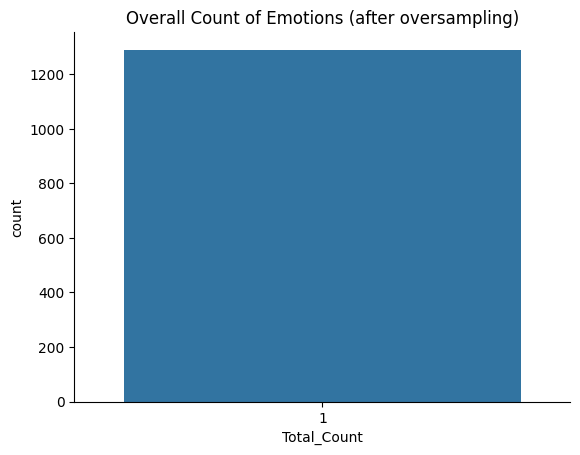

In [ ]:
# Sum the counts across all emotion columns
y_resampled_df['Total_Count'] = y_resampled_df.sum(axis=1)

plt.title("Overall Count of Emotions (after oversampling)")
sns.countplot(x=y_resampled_df['Total_Count'])
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
# Normalization as per the standard NN process
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
X_val = (X_val - mean)/std
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(1032, 81, 144, 1) (59, 81, 144, 1) (258, 81, 144, 1) (1032, 5) (59, 5) (258, 5)


In [ ]:
y_train.nunique()

Emotions_angry       2
Emotions_happy       2
Emotions_neutral     2
Emotions_sad         2
Emotions_surprise    2
dtype: int64

In [ ]:
y_train.Emotions_angry.unique()

array([0, 1])

In [ ]:
y_train.Emotions_happy.unique()

array([0, 1])

In [ ]:
y_train.Emotions_neutral.unique()

array([1, 0])

In [ ]:
y_train.Emotions_sad.unique()

array([0, 1])

In [ ]:
y_train.Emotions_surprise.unique()

array([0, 1])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= accuracy_threshold:
            print("\nReached %2.2f%% accuracy, stopping training" % (accuracy_threshold * 100))
            self.model.stop_training = True

# Callbacks
filepath = "/content/drive/MyDrive/THESIS/BanglaSER/best_model/ICEEICT_main_BanglaSER_HYbrid_CNN_GRU_cochlea_AG_nonAG.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                             save_weights_only=False, mode='max')

lr_schedule = LearningRateScheduler(lambda epoch: 0.001 * (0.1 ** int(epoch / 10)))

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# callback list
callback_list = [myCallback(), checkpoint, lr_schedule, early_stopping]

In [ ]:
pip install keras-self-attention

  Preparing metadata (setup.py) ... done
  Created wheel for keras-self-attention: filename=keras_self_attention-0.51.0-py3-none-any.whl size=18895 sha256=5d402fbca594db9249bbc349e4a0b355260fd77b5923edc3e0b8cdf4682bd399
  Stored in directory: /root/.cache/pip/wheels/b8/f7/24/607b483144fb9c47b4ba2c5fba6b68e54aeee2d5bf6c05302e
Successfully built keras-self-attention


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, GRU, Reshape, BatchNormalization, Dropout,GlobalAveragePooling2D
from keras_self_attention import SeqSelfAttention
from tensorflow.keras.regularizers import l2

# Create the 2D CNN model with self-attention and regularization
nclass = 5
cnn_input = Input(shape=(81, 144, 1))
x = Conv2D(64, 5, padding='same', activation='relu')(cnn_input)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(5, 5), padding='same')(x)

x = Conv2D(128, 5, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(5, 5), padding='same')(x)
x = Dropout(0.2)(x)

x = Conv2D(128, 5, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(5, 5), padding='same')(x)

x = Conv2D(256, 3, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(5, 5), padding='same')(x)
x = Dropout(0.2)(x)

x = Conv2D(512, 3, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(3, 3), padding='same')(x)
x = Dropout(0.2)(x)




x = Flatten()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.1))(x)
x = BatchNormalization()(x)

# Now you can connect this new CNN part with your GRU and Dense layers
x = Reshape((-1, 128))(x)
x = GRU(128, return_sequences=True, kernel_regularizer=l2(0.1))(x)
x = SeqSelfAttention(attention_activation='tanh')(x)
x = GRU(64, kernel_regularizer=l2(0.1))(x)  # Add more GRU layers as needed
x = Dropout(0.3)(x)

out = Dense(nclass, activation='softmax')(x)

model = Model(inputs=cnn_input, outputs=out)

# Compile the hybrid model with an appropriate optimizer and loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the hybrid model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 81, 144, 1)]      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 81, 144, 64)       1664      
                                                                 
 batch_normalization_12 (Ba  (None, 81, 144, 64)       256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 17, 29, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 17, 29, 128)       204928    
                                                                 
 batch_normalization_13 (Ba  (None, 17, 29, 128)       512 

In [ ]:
history=model.fit(X_train, y_train, epochs=70,validation_data = (X_val,y_val),callbacks=[checkpoint],batch_size=32)

Epoch 1/70
33/33 [==============================] - ETA: 0s - loss: 36.8551 - accuracy: 0.3779
Epoch 1: val_accuracy improved from -inf to 0.36047, saving model to /content/drive/MyDrive/THESIS/BanglaSER/best_model/BanglaSER_HYbrid_mfcc_log_mel_spec_cochlea.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


33/33 [==============================] - 50s 2s/step - loss: 36.8551 - accuracy: 0.3779 - val_loss: 21.4787 - val_accuracy: 0.3605
Epoch 2/70
33/33 [==============================] - ETA: 0s - loss: 13.7594 - accuracy: 0.4535
Epoch 2: val_accuracy did not improve from 0.36047
33/33 [==============================] - 57s 2s/step - loss: 13.7594 - accuracy: 0.4535 - val_loss: 8.1534 - val_accuracy: 0.2248
Epoch 3/70
33/33 [==============================] - ETA: 0s - loss: 5.2498 - accuracy: 0.4651
Epoch 3: val_accuracy did not improve from 0.36047
33/33 [==============================] - 51s 2s/step - loss: 5.2498 - accuracy: 0.4651 - val_loss: 3.6849 - val_accuracy: 0.1938
Epoch 4/70
33/33 [==============================] - ETA: 0s - loss: 2.4844 - accuracy: 0.4806
Epoch 4: val_accuracy did not improve from 0.36047
33/33 [==============================] - 53s 2s/step - loss: 2.4844 - accuracy: 0.4806 - val_loss: 2.3347 - val_accuracy: 0.1938
Epoch 5/70
33/33 [===========================

In [ ]:
# Evaluation# Evaluation
print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

2/2 [==============================] - 2s 281ms/step - loss: 1.1349 - accuracy: 0.7119
Accuracy of our model on test data :  71.18644118309021 %


In [ ]:
# Evaluation# Evaluation
print("Accuracy of our model on valodation data : " , model.evaluate(X_val,y_val)[1]*100 , "%")

9/9 [==============================] - 3s 369ms/step - loss: 1.1016 - accuracy: 0.7326
Accuracy of our model on valodation data :  73.25581312179565 %


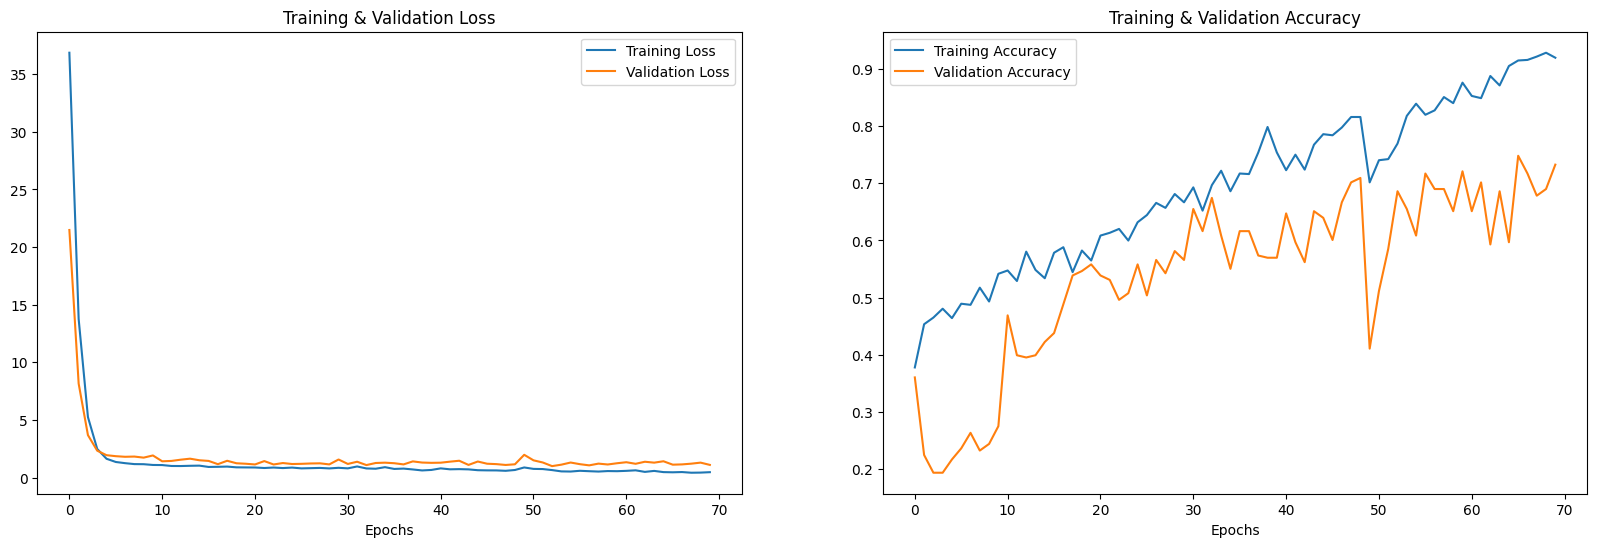

In [ ]:
epochs = [i for i in range(70)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

2/2 [==============================] - 2s 279ms/step


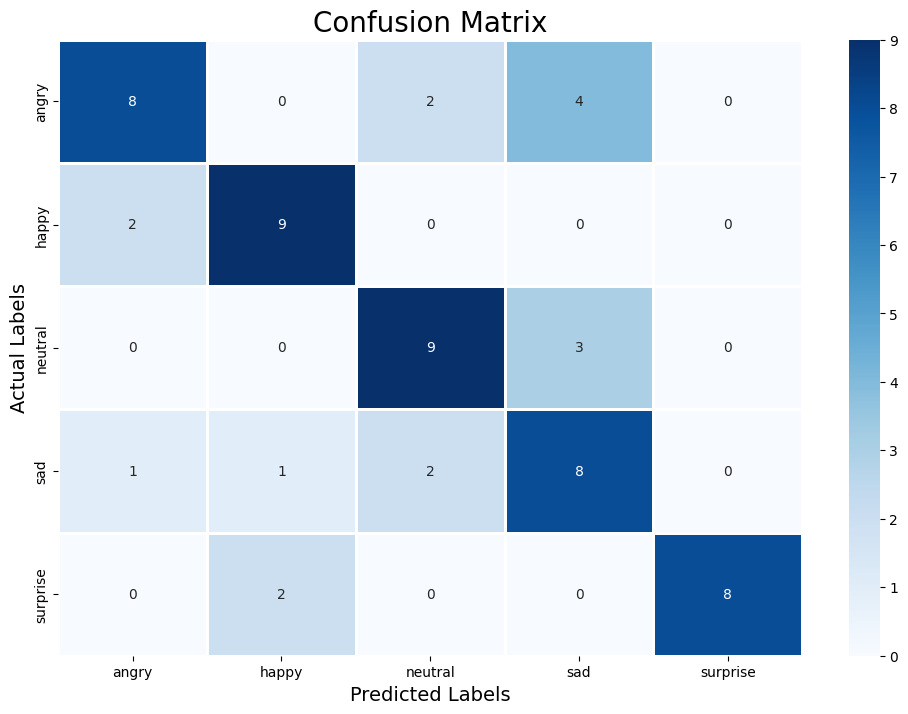

              precision    recall  f1-score   support

       angry       0.73      0.57      0.64        14
       happy       0.75      0.82      0.78        11
     neutral       0.69      0.75      0.72        12
         sad       0.53      0.67      0.59        12
    surprise       1.00      0.80      0.89        10

    accuracy                           0.71        59
   macro avg       0.74      0.72      0.72        59
weighted avg       0.73      0.71      0.72        59



In [ ]:
# predicting on test data.
pred_test = model.predict(X_test)
#pred_test = pred_test.astype(int).flatten()
y_pred = encoder.inverse_transform(pred_test)

#y_test = y_test.astype(int).flatten()
y_test = encoder.inverse_transform(y_test)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 8))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test, y_pred))

AUGMENTED FORM

In [ ]:
def noise(data):
    """
    Adding White Noise.
    """
    noise_amp = 0.05*np.random.uniform()*np.amax(data)   # more noise reduce the value to 0.5
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data

In [ ]:
def shift(data):
    """
    Random Shifting.
    """
    s_range = int(np.random.uniform(low=-5, high = 5)*1000)  #default at 500
    return np.roll(data, s_range)

In [ ]:
# Use one audio file in previous parts again
fname = file_path[200]
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Paly it again to refresh our memory
IPython.display.Audio(data, rate=sampling_rate)

In [ ]:
x = noise(data)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(x, sr=sampling_rate)
IPython.display.Audio(x, rate=sampling_rate)

In [ ]:
x = shift(data)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(x, sr=16000)
IPython.display.Audio(x, rate=16000)

In [ ]:
import sklearn
import scipy.signal as ss
import librosa as lr
import librosa.display
import numpy as np
import math
import IPython.display as ipd
import matplotlib.pyplot as plt
import soundfile as sf

In [ ]:
Num_audio_sample_test=1472
Fs = 16000

In [ ]:
sr=16000
Out_path_test='/content/drive/MyDrive/THESIS/Test_N/Output/'
# Out_path_noisy='/content/drive/MyDrive/THSIS/ravii/test/Noisy/'
for index in range(Num_audio_sample_test):
  clean, Fs = lr.load(a[index], sr = Fs)
  Out_file_clean = b[index] + "_Clean_" + str(index)
  # print(Out_path_test  + Out_file_clean +".wav")
  # print(Out_file_clean)
  sf.write(Out_path_test  + Out_file_clean +".wav", clean,sr)
  # for Noise_file in Noise_type:

  noisy = noise(clean)
  Out_file_noisy = b[index]+ "_Noisy_" + str(index)
  sf.write(Out_path_test + Out_file_noisy + ".wav", noisy, sr)

  shifty = shift(clean)
  Out_file_noisy = b[index]+ "_shift_" + str(index)
  sf.write(Out_path_test + Out_file_noisy + ".wav", shifty, sr)




In [ ]:
banglaSER_final = '/content/drive/MyDrive/THESIS/Test_N/Output/'
banglaSER_final_directory_list = os.listdir(banglaSER_final)
banglaSER_final_directory_list

['03-01-03-02-03-01-06_shift_1138.wav',
 '03-01-04-02-02-01-06_Clean_1139.wav',
 '03-01-04-02-02-01-06_Noisy_1139.wav',
 '03-01-04-02-02-01-06_shift_1139.wav',
 '03-01-03-02-01-01-06_Clean_1140.wav',
 '03-01-03-02-01-01-06_Noisy_1140.wav',
 '03-01-03-02-01-01-06_shift_1140.wav',
 '03-01-04-02-03-02-06_Clean_1141.wav',
 '03-01-04-02-03-02-06_Noisy_1141.wav',
 '03-01-04-02-03-02-06_shift_1141.wav',
 '03-01-02-01-01-03-06_Clean_1142.wav',
 '03-01-02-01-01-03-06_Noisy_1142.wav',
 '03-01-02-01-01-03-06_shift_1142.wav',
 '03-01-04-02-02-03-06_Clean_1143.wav',
 '03-01-04-02-02-03-06_Noisy_1143.wav',
 '03-01-04-02-02-03-06_shift_1143.wav',
 '03-01-03-02-01-02-06_Clean_1144.wav',
 '03-01-03-02-01-02-06_Noisy_1144.wav',
 '03-01-03-02-01-02-06_shift_1144.wav',
 '03-01-02-01-01-02-06_Clean_1145.wav',
 '03-01-02-01-01-02-06_Noisy_1145.wav',
 '03-01-02-01-01-02-06_shift_1145.wav',
 '03-01-02-01-03-03-06_Clean_1146.wav',
 '03-01-02-01-03-03-06_Noisy_1146.wav',
 '03-01-02-01-03-03-06_shift_1146.wav',


In [ ]:
i=list()
j=list()
k=list()

banglaSER_final_directory_list = os.listdir(banglaSER_final)
file_path = []
file_emotion = []
for directory in banglaSER_final_directory_list:

        part1 = directory.split('_')[0]
        # print(part1)
        part2 = part1.split('-')
        # print(part2)
        # third part in each file represents the emotion associated to that file
        file_emotion.append(int(part2[2]))
        file_path.append(banglaSER_final +  directory )

        i.append(banglaSER_final + directory )
        j.append(part1)
        k.append(part2)

In [ ]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files
path_df = pd.DataFrame(file_path, columns=['Path'])
banglaSER_final_df = pd.concat([emotion_df, path_df], axis=1)
# decode integers to actual emotions

banglaSER_final_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
banglaSER_final_df

,Emotions,Path
0,happy,/content/drive/MyDrive/THESIS/Test_N/Output/03...
1,sad,/content/drive/MyDrive/THESIS/Test_N/Output/03...
2,sad,/content/drive/MyDrive/THESIS/Test_N/Output/03...
3,sad,/content/drive/MyDrive/THESIS/Test_N/Output/03...
4,happy,/content/drive/MyDrive/THESIS/Test_N/Output/03...
...,...,...
4411,neutral,/content/drive/MyDrive/THESIS/Test_N/Output/03...
4412,neutral,/content/drive/MyDrive/THESIS/Test_N/Output/03...
4413,neutral,/content/drive/MyDrive/THESIS/Test_N/Output/03...
4414,calm,/content/drive/MyDrive/THESIS/Test_N/Output/03...


In [ ]:
def match_dimension(data,input_length):

  if len(data) > input_length:
      max_offset = int(len(data) - input_length)
      data = data[0:input_length]
  else:
      max_offset =int(input_length - len(data))
      offset = np.zeros(max_offset)
      data=np.concatenate((data,offset),axis=0)

  return data

In [ ]:
from scipy.signal import resample

In [ ]:
sampling_rate = 16000
audio_duration = 3
new_mfcc_dim = 144  # Desired second dimension for the output Cochleagram

def prepare_data(df, n, cochlea):
    X = np.empty(shape=(df.shape[0], n, new_mfcc_dim, 1))

    cnt = 0
    for fname in tqdm(df.Path):
        file_path = fname
        data, sr = librosa.load(file_path, sr=sampling_rate, duration=audio_duration)

        if len(data) != sampling_rate * audio_duration:
            # Random offset / Padding
            data = match_dimension(data, 48000)

        # Cochleagram extraction
        if cochlea == 1:
            cochleagram = cgram.human_cochleagram(data, sr, n=None, low_lim=50, hi_lim=20000, sample_factor=2, padding_size=None, downsample=None, nonlinearity=None, fft_mode='auto', ret_mode='envs', strict=False)
            cochleagram_downsampled = resample(cochleagram, new_mfcc_dim, axis=1)  # Adjust to have new_mfcc_dim columns
            cochleagram_downsampled = np.expand_dims(cochleagram_downsampled, axis=-1)
        else:
            cochleagram_downsampled = np.zeros_like(X[cnt, :, :, :])  # Placeholder for cases when Cochleagram is not selected

        X[cnt,] = cochleagram_downsampled
        print('Cochleagram shape:', cochleagram_downsampled.shape)

        cnt += 1

    return X

# Example usage:
# Assuming data_path is a DataFrame containing the file paths
X = prepare_data(df=banglaSER_final_df, n=81, cochlea=1)

  0%|          | 0/4416 [00:00<?, ?it/s]

here


/content/pycochleagram/pycochleagram/cochleagram.py:129: RuntimeWarning: input arg "hi_lim" exceeds nyquist limit for max frequency; ignore with "strict=False"
  filts, hz_cutoffs, freqs = erb.make_erb_cos_filters_nx(batch_signal.shape[1],
/content/pycochleagram/pycochleagram/cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)
  0%|          | 1/4416 [00:11<14:30:24, 11.83s/it]

Cochleagram shape: (81, 144, 1)
here


  0%|          | 2/4416 [00:12<6:24:12,  5.22s/it] 

Cochleagram shape: (81, 144, 1)
here


  0%|          | 3/4416 [00:13<3:48:17,  3.10s/it]

Cochleagram shape: (81, 144, 1)
here


  0%|          | 4/4416 [00:13<2:34:38,  2.10s/it]

Cochleagram shape: (81, 144, 1)
here


  0%|          | 5/4416 [00:14<1:57:18,  1.60s/it]

Cochleagram shape: (81, 144, 1)
here


  0%|          | 6/4416 [00:14<1:35:24,  1.30s/it]

Cochleagram shape: (81, 144, 1)
here


  0%|          | 7/4416 [00:15<1:21:39,  1.11s/it]

Cochleagram shape: (81, 144, 1)
here


  0%|          | 8/4416 [00:16<1:12:47,  1.01it/s]

Cochleagram shape: (81, 144, 1)
here


  0%|          | 9/4416 [00:17<1:05:33,  1.12it/s]

Cochleagram shape: (81, 144, 1)
here


  0%|          | 10/4416 [00:17<57:20,  1.28it/s] 

Cochleagram shape: (81, 144, 1)
here


  0%|          | 11/4416 [00:18<52:40,  1.39it/s]

Cochleagram shape: (81, 144, 1)
here


  0%|          | 12/4416 [00:18<49:03,  1.50it/s]

Cochleagram shape: (81, 144, 1)
here


  0%|          | 13/4416 [00:19<47:30,  1.54it/s]

Cochleagram shape: (81, 144, 1)
here


  0%|          | 14/4416 [00:19<43:59,  1.67it/s]

Cochleagram shape: (81, 144, 1)
here


  0%|          | 15/4416 [00:20<43:21,  1.69it/s]

Cochleagram shape: (81, 144, 1)
here


  0%|          | 16/4416 [00:21<44:50,  1.64it/s]

Cochleagram shape: (81, 144, 1)
here


  0%|          | 17/4416 [00:21<50:53,  1.44it/s]

Cochleagram shape: (81, 144, 1)
here


  0%|          | 18/4416 [00:22<49:55,  1.47it/s]

Cochleagram shape: (81, 144, 1)
here


  0%|          | 19/4416 [00:23<53:35,  1.37it/s]

Cochleagram shape: (81, 144, 1)
here


  0%|          | 20/4416 [00:24<51:38,  1.42it/s]

Cochleagram shape: (81, 144, 1)
here


  0%|          | 21/4416 [00:24<54:49,  1.34it/s]

Cochleagram shape: (81, 144, 1)
here


  0%|          | 22/4416 [00:25<52:03,  1.41it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 23/4416 [00:26<55:54,  1.31it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 24/4416 [00:28<1:25:41,  1.17s/it]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 25/4416 [00:29<1:17:02,  1.05s/it]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 26/4416 [00:30<1:15:29,  1.03s/it]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 27/4416 [00:31<1:09:58,  1.05it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 28/4416 [00:31<1:04:33,  1.13it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 29/4416 [00:32<1:01:13,  1.19it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 30/4416 [00:33<54:24,  1.34it/s]  

Cochleagram shape: (81, 144, 1)
here


  1%|          | 31/4416 [00:33<50:42,  1.44it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 32/4416 [00:34<47:14,  1.55it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 33/4416 [00:34<45:14,  1.61it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 34/4416 [00:35<44:31,  1.64it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 35/4416 [00:36<47:42,  1.53it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 36/4416 [00:36<45:51,  1.59it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 37/4416 [00:37<45:00,  1.62it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 38/4416 [00:37<45:58,  1.59it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 39/4416 [00:38<43:51,  1.66it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 40/4416 [00:39<42:52,  1.70it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 41/4416 [00:39<41:40,  1.75it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 42/4416 [00:40<42:15,  1.73it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 43/4416 [00:40<43:39,  1.67it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 44/4416 [00:41<43:02,  1.69it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 45/4416 [00:42<50:20,  1.45it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 46/4416 [01:12<11:30:28,  9.48s/it]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 47/4416 [02:51<44:15:52, 36.47s/it]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 48/4416 [02:52<31:23:34, 25.87s/it]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 49/4416 [02:53<22:05:13, 18.21s/it]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 50/4416 [02:53<15:33:51, 12.83s/it]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 51/4416 [02:53<11:00:50,  9.08s/it]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 52/4416 [02:54<7:49:06,  6.45s/it] 

Cochleagram shape: (81, 144, 1)
here


  1%|          | 53/4416 [02:54<5:35:27,  4.61s/it]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 54/4416 [02:54<4:02:10,  3.33s/it]

Cochleagram shape: (81, 144, 1)
here


  1%|          | 55/4416 [02:55<2:56:19,  2.43s/it]

Cochleagram shape: (81, 144, 1)
here


  1%|▏         | 56/4416 [02:55<2:09:57,  1.79s/it]

Cochleagram shape: (81, 144, 1)
here


  1%|▏         | 57/4416 [02:55<1:37:52,  1.35s/it]

Cochleagram shape: (81, 144, 1)
here


  1%|▏         | 58/4416 [02:56<1:14:52,  1.03s/it]

Cochleagram shape: (81, 144, 1)
here


  1%|▏         | 59/4416 [02:56<59:16,  1.23it/s]  

Cochleagram shape: (81, 144, 1)
here


  1%|▏         | 60/4416 [02:56<47:52,  1.52it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|▏         | 61/4416 [02:56<40:37,  1.79it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|▏         | 62/4416 [02:57<34:40,  2.09it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|▏         | 63/4416 [02:57<31:03,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|▏         | 64/4416 [02:57<28:07,  2.58it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|▏         | 65/4416 [02:58<26:55,  2.69it/s]

Cochleagram shape: (81, 144, 1)
here


  1%|▏         | 66/4416 [02:58<25:14,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 67/4416 [02:58<24:31,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 68/4416 [02:59<23:38,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 69/4416 [02:59<23:10,  3.13it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 70/4416 [02:59<22:20,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 71/4416 [03:00<22:42,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 72/4416 [03:00<22:55,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 73/4416 [03:00<25:48,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 74/4416 [03:01<27:05,  2.67it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 75/4416 [03:01<28:29,  2.54it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 76/4416 [03:02<28:39,  2.52it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 77/4416 [03:02<29:42,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 78/4416 [03:02<29:56,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 79/4416 [03:03<29:37,  2.44it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 80/4416 [03:03<30:05,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 81/4416 [03:04<30:01,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 82/4416 [03:04<30:22,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 83/4416 [03:04<27:32,  2.62it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 84/4416 [03:05<25:48,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 85/4416 [03:05<24:18,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 86/4416 [03:05<23:46,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 87/4416 [03:06<23:09,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 88/4416 [03:06<23:18,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 89/4416 [03:06<22:22,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 90/4416 [03:07<22:27,  3.21it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 91/4416 [03:07<21:56,  3.28it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 92/4416 [03:07<22:05,  3.26it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 93/4416 [03:07<21:47,  3.31it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 94/4416 [03:08<21:51,  3.29it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 95/4416 [03:08<23:09,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 96/4416 [03:08<22:54,  3.14it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 97/4416 [03:09<22:18,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 98/4416 [03:09<22:33,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 99/4416 [03:09<22:09,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 100/4416 [03:10<22:06,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 101/4416 [03:10<21:39,  3.32it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 102/4416 [03:10<22:02,  3.26it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 103/4416 [03:11<21:38,  3.32it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 104/4416 [03:11<22:00,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 105/4416 [03:11<21:46,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 106/4416 [03:11<21:47,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 107/4416 [03:12<21:28,  3.34it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 108/4416 [03:12<21:48,  3.29it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 109/4416 [03:12<21:31,  3.34it/s]

Cochleagram shape: (81, 144, 1)
here


  2%|▏         | 110/4416 [03:13<21:36,  3.32it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 111/4416 [03:13<21:15,  3.38it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 112/4416 [03:13<21:45,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 113/4416 [03:14<21:16,  3.37it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 114/4416 [03:14<21:39,  3.31it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 115/4416 [03:14<21:57,  3.26it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 116/4416 [03:15<24:54,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 117/4416 [03:15<25:51,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 118/4416 [03:15<27:43,  2.58it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 119/4416 [03:16<28:02,  2.55it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 120/4416 [03:16<29:05,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 121/4416 [03:17<28:55,  2.47it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 122/4416 [03:17<29:17,  2.44it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 123/4416 [03:17<28:51,  2.48it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 124/4416 [03:18<29:22,  2.44it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 125/4416 [03:18<29:05,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 126/4416 [03:19<27:21,  2.61it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 127/4416 [03:19<25:15,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 128/4416 [03:19<24:10,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 129/4416 [03:20<23:15,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 130/4416 [03:20<22:52,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 131/4416 [03:20<22:11,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 132/4416 [03:20<22:41,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 133/4416 [03:21<21:51,  3.26it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 134/4416 [03:21<21:48,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 135/4416 [03:21<21:30,  3.32it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 136/4416 [03:22<21:48,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 137/4416 [03:22<21:29,  3.32it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 138/4416 [03:22<21:45,  3.28it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 139/4416 [03:23<21:33,  3.31it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 140/4416 [03:23<21:43,  3.28it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 141/4416 [03:23<21:14,  3.36it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 142/4416 [03:23<21:28,  3.32it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 143/4416 [03:24<21:14,  3.35it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 144/4416 [03:24<21:28,  3.32it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 145/4416 [03:24<21:16,  3.35it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 146/4416 [03:25<21:45,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 147/4416 [03:25<21:18,  3.34it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 148/4416 [03:25<21:44,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 149/4416 [03:26<21:21,  3.33it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 150/4416 [03:26<21:53,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 151/4416 [03:26<21:31,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 152/4416 [03:26<21:43,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 153/4416 [03:27<21:39,  3.28it/s]

Cochleagram shape: (81, 144, 1)
here


  3%|▎         | 154/4416 [03:27<21:45,  3.26it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▎         | 155/4416 [03:27<21:20,  3.33it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▎         | 156/4416 [03:28<21:39,  3.28it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▎         | 157/4416 [03:28<21:17,  3.33it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▎         | 158/4416 [03:28<21:28,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▎         | 159/4416 [03:29<23:24,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▎         | 160/4416 [03:29<25:55,  2.74it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▎         | 161/4416 [03:30<26:40,  2.66it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▎         | 162/4416 [03:30<28:12,  2.51it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▎         | 163/4416 [03:30<28:15,  2.51it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▎         | 164/4416 [03:31<29:24,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▎         | 165/4416 [03:31<29:11,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 166/4416 [03:32<29:41,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 167/4416 [03:32<29:46,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 168/4416 [03:33<30:10,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 169/4416 [03:33<27:36,  2.56it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 170/4416 [03:33<26:02,  2.72it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 171/4416 [03:33<24:22,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 172/4416 [03:34<23:30,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 173/4416 [03:34<22:51,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 174/4416 [03:34<22:43,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 175/4416 [03:35<22:00,  3.21it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 176/4416 [03:35<22:13,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 177/4416 [03:35<21:44,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 178/4416 [03:36<21:52,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 179/4416 [03:36<21:29,  3.28it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 180/4416 [03:36<21:37,  3.26it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 181/4416 [03:36<21:05,  3.35it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 182/4416 [03:37<21:05,  3.35it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 183/4416 [03:37<21:11,  3.33it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 184/4416 [03:37<21:28,  3.28it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 185/4416 [03:38<21:08,  3.34it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 186/4416 [03:38<21:23,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 187/4416 [03:38<21:12,  3.32it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 188/4416 [03:39<21:27,  3.28it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 189/4416 [03:39<21:09,  3.33it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 190/4416 [03:39<21:38,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 191/4416 [03:39<21:08,  3.33it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 192/4416 [03:40<21:18,  3.31it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 193/4416 [03:40<21:06,  3.34it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 194/4416 [03:40<21:40,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 195/4416 [03:41<21:21,  3.29it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 196/4416 [03:41<21:22,  3.29it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 197/4416 [03:41<21:15,  3.31it/s]

Cochleagram shape: (81, 144, 1)
here


  4%|▍         | 198/4416 [03:42<21:25,  3.28it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▍         | 199/4416 [03:42<20:52,  3.37it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▍         | 200/4416 [03:42<21:31,  3.26it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▍         | 201/4416 [03:43<21:06,  3.33it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▍         | 202/4416 [03:43<23:09,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▍         | 203/4416 [03:43<24:38,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▍         | 204/4416 [03:44<26:02,  2.70it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▍         | 205/4416 [03:44<26:16,  2.67it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▍         | 206/4416 [03:45<27:32,  2.55it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▍         | 207/4416 [03:45<27:37,  2.54it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▍         | 208/4416 [03:45<29:06,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▍         | 209/4416 [03:46<28:55,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▍         | 210/4416 [03:46<29:23,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▍         | 211/4416 [03:47<29:13,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▍         | 212/4416 [03:47<28:52,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▍         | 213/4416 [03:47<26:14,  2.67it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▍         | 214/4416 [03:48<24:52,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▍         | 215/4416 [03:48<23:26,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▍         | 216/4416 [03:48<22:59,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▍         | 217/4416 [03:49<22:21,  3.13it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▍         | 218/4416 [03:49<22:04,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▍         | 219/4416 [03:49<21:39,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▍         | 220/4416 [03:49<21:43,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▌         | 221/4416 [03:50<21:23,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▌         | 222/4416 [03:50<21:37,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▌         | 223/4416 [03:50<21:23,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▌         | 224/4416 [03:51<22:06,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▌         | 225/4416 [03:51<21:30,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▌         | 226/4416 [03:51<21:38,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▌         | 227/4416 [03:52<21:25,  3.26it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▌         | 228/4416 [03:52<21:25,  3.26it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▌         | 229/4416 [03:52<21:06,  3.31it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▌         | 230/4416 [03:53<21:19,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▌         | 231/4416 [03:53<21:15,  3.28it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▌         | 232/4416 [03:53<21:35,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▌         | 233/4416 [03:53<21:12,  3.29it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▌         | 234/4416 [03:54<21:39,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▌         | 235/4416 [03:54<21:16,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▌         | 236/4416 [03:54<21:34,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▌         | 237/4416 [03:55<21:15,  3.28it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▌         | 238/4416 [03:55<21:41,  3.21it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▌         | 239/4416 [03:55<21:13,  3.28it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▌         | 240/4416 [03:56<21:28,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▌         | 241/4416 [03:56<21:29,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


  5%|▌         | 242/4416 [03:56<21:55,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 243/4416 [03:57<21:23,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 244/4416 [03:57<21:48,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 245/4416 [03:57<23:16,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 246/4416 [03:58<25:34,  2.72it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 247/4416 [03:58<26:18,  2.64it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 248/4416 [03:59<27:30,  2.53it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 249/4416 [03:59<27:57,  2.48it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 250/4416 [03:59<28:38,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 251/4416 [04:00<28:12,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 252/4416 [04:00<28:45,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 253/4416 [04:01<28:01,  2.48it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 254/4416 [04:01<28:32,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 255/4416 [04:01<28:09,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 256/4416 [04:02<26:16,  2.64it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 257/4416 [04:02<24:21,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 258/4416 [04:02<23:33,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 259/4416 [04:03<22:24,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 260/4416 [04:03<21:56,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 261/4416 [04:03<21:41,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 262/4416 [04:04<21:33,  3.21it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 263/4416 [04:04<20:57,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 264/4416 [04:04<21:08,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 265/4416 [04:04<20:53,  3.31it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 266/4416 [04:05<20:59,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 267/4416 [04:05<20:37,  3.35it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 268/4416 [04:05<21:18,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 269/4416 [04:06<20:55,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 270/4416 [04:06<21:03,  3.28it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 271/4416 [04:06<20:46,  3.33it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 272/4416 [04:07<21:19,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 273/4416 [04:07<21:05,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 274/4416 [04:07<21:09,  3.26it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▌         | 275/4416 [04:07<20:55,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▋         | 276/4416 [04:08<21:05,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▋         | 277/4416 [04:08<20:48,  3.31it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▋         | 278/4416 [04:08<21:06,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▋         | 279/4416 [04:09<20:45,  3.32it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▋         | 280/4416 [04:09<20:52,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▋         | 281/4416 [04:09<20:39,  3.34it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▋         | 282/4416 [04:10<21:05,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▋         | 283/4416 [04:10<20:33,  3.35it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▋         | 284/4416 [04:10<20:54,  3.29it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▋         | 285/4416 [04:11<21:07,  3.26it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▋         | 286/4416 [04:11<21:11,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


  6%|▋         | 287/4416 [04:11<20:52,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 288/4416 [04:11<21:26,  3.21it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 289/4416 [04:12<23:36,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 290/4416 [04:12<25:15,  2.72it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 291/4416 [04:13<26:06,  2.63it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 292/4416 [04:13<27:12,  2.53it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 293/4416 [04:14<27:19,  2.51it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 294/4416 [04:14<28:16,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 295/4416 [04:14<27:52,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 296/4416 [04:15<28:53,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 297/4416 [04:15<28:28,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 298/4416 [04:16<28:24,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 299/4416 [04:16<25:58,  2.64it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 300/4416 [04:16<24:42,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 301/4416 [04:17<23:17,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 302/4416 [04:17<22:50,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 303/4416 [04:17<21:46,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 304/4416 [04:17<21:46,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 305/4416 [04:18<21:10,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 306/4416 [04:18<21:26,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 307/4416 [04:18<21:01,  3.26it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 308/4416 [04:19<21:12,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 309/4416 [04:19<20:59,  3.26it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 310/4416 [04:19<21:06,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 311/4416 [04:20<20:47,  3.29it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 312/4416 [04:20<21:12,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 313/4416 [04:20<20:46,  3.29it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 314/4416 [04:21<21:07,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 315/4416 [04:21<21:01,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 316/4416 [04:21<21:08,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 317/4416 [04:21<20:51,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 318/4416 [04:22<21:03,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 319/4416 [04:22<20:54,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 320/4416 [04:22<20:59,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 321/4416 [04:23<20:34,  3.32it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 322/4416 [04:23<20:55,  3.26it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 323/4416 [04:23<20:24,  3.34it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 324/4416 [04:24<20:33,  3.32it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 325/4416 [04:24<20:13,  3.37it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 326/4416 [04:24<20:33,  3.31it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 327/4416 [04:24<20:21,  3.35it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 328/4416 [04:25<20:37,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 329/4416 [04:25<20:38,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 330/4416 [04:25<20:54,  3.26it/s]

Cochleagram shape: (81, 144, 1)
here


  7%|▋         | 331/4416 [04:26<21:37,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 332/4416 [04:26<24:19,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 333/4416 [04:27<25:06,  2.71it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 334/4416 [04:27<26:20,  2.58it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 335/4416 [04:27<26:41,  2.55it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 336/4416 [04:28<27:41,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 337/4416 [04:28<27:39,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 338/4416 [04:29<28:24,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 339/4416 [04:29<27:50,  2.44it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 340/4416 [04:30<28:54,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 341/4416 [04:30<27:47,  2.44it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 342/4416 [04:30<25:52,  2.62it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 343/4416 [04:31<24:17,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 344/4416 [04:31<23:15,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 345/4416 [04:31<22:09,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 346/4416 [04:31<22:10,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 347/4416 [04:32<21:24,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 348/4416 [04:32<21:10,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 349/4416 [04:32<20:52,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 350/4416 [04:33<20:54,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 351/4416 [04:33<20:31,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 352/4416 [04:33<20:32,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 353/4416 [04:34<20:31,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 354/4416 [04:34<20:35,  3.29it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 355/4416 [04:34<20:18,  3.33it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 356/4416 [04:34<20:51,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 357/4416 [04:35<20:23,  3.32it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 358/4416 [04:35<20:31,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 359/4416 [04:35<20:16,  3.34it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 360/4416 [04:36<20:48,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 361/4416 [04:36<20:28,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 362/4416 [04:36<20:37,  3.28it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 363/4416 [04:37<20:31,  3.29it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 364/4416 [04:37<20:39,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 365/4416 [04:37<20:17,  3.33it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 366/4416 [04:38<20:45,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 367/4416 [04:38<20:21,  3.31it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 368/4416 [04:38<20:35,  3.28it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 369/4416 [04:38<20:13,  3.34it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 370/4416 [04:39<20:34,  3.28it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 371/4416 [04:39<20:19,  3.32it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 372/4416 [04:39<20:38,  3.26it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 373/4416 [04:40<20:36,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 374/4416 [04:40<21:54,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


  8%|▊         | 375/4416 [04:40<23:26,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▊         | 376/4416 [04:41<25:27,  2.64it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▊         | 377/4416 [04:41<25:42,  2.62it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▊         | 378/4416 [04:42<26:55,  2.50it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▊         | 379/4416 [04:42<26:53,  2.50it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▊         | 380/4416 [04:43<27:56,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▊         | 381/4416 [04:43<27:47,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▊         | 382/4416 [04:43<28:21,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▊         | 383/4416 [04:44<28:12,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▊         | 384/4416 [04:44<27:44,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▊         | 385/4416 [04:45<25:18,  2.65it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▊         | 386/4416 [04:45<23:54,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 387/4416 [04:45<22:37,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 388/4416 [04:45<21:57,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 389/4416 [04:46<21:18,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 390/4416 [04:46<21:25,  3.13it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 391/4416 [04:46<20:58,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 392/4416 [04:47<21:00,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 393/4416 [04:47<20:39,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 394/4416 [04:47<20:50,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 395/4416 [04:48<20:29,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 396/4416 [04:48<20:33,  3.26it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 397/4416 [04:48<20:09,  3.32it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 398/4416 [04:48<20:21,  3.29it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 399/4416 [04:49<20:04,  3.34it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 400/4416 [04:49<20:22,  3.28it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 401/4416 [04:49<20:05,  3.33it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 402/4416 [04:50<20:19,  3.29it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 403/4416 [04:50<20:04,  3.33it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 404/4416 [04:50<20:23,  3.28it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 405/4416 [04:51<20:17,  3.29it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 406/4416 [04:51<20:39,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 407/4416 [04:51<20:33,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 408/4416 [04:52<20:32,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 409/4416 [04:52<20:13,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 410/4416 [04:52<20:37,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 411/4416 [04:52<20:04,  3.33it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 412/4416 [04:53<20:06,  3.32it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 413/4416 [04:53<19:58,  3.34it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 414/4416 [04:53<20:25,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 415/4416 [04:54<20:06,  3.32it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 416/4416 [04:54<20:17,  3.29it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 417/4416 [04:54<20:43,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 418/4416 [04:55<23:18,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


  9%|▉         | 419/4416 [04:55<24:05,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|▉         | 420/4416 [04:56<25:41,  2.59it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|▉         | 421/4416 [04:56<26:17,  2.53it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|▉         | 422/4416 [04:56<27:10,  2.45it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|▉         | 423/4416 [04:57<27:11,  2.45it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|▉         | 424/4416 [04:57<27:29,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|▉         | 425/4416 [04:58<27:46,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|▉         | 426/4416 [04:58<28:01,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|▉         | 427/4416 [04:58<27:37,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|▉         | 428/4416 [04:59<25:46,  2.58it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|▉         | 429/4416 [04:59<23:43,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|▉         | 430/4416 [04:59<22:51,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|▉         | 431/4416 [05:00<21:58,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|▉         | 432/4416 [05:00<21:39,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|▉         | 433/4416 [05:00<20:56,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|▉         | 434/4416 [05:01<21:23,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|▉         | 435/4416 [05:01<20:39,  3.21it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|▉         | 436/4416 [05:01<20:42,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|▉         | 437/4416 [05:02<20:24,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|▉         | 438/4416 [05:02<20:34,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|▉         | 439/4416 [05:02<20:10,  3.29it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|▉         | 440/4416 [05:02<20:16,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|▉         | 441/4416 [05:03<20:08,  3.29it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|█         | 442/4416 [05:03<20:07,  3.29it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|█         | 443/4416 [05:03<19:53,  3.33it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|█         | 444/4416 [05:04<20:26,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|█         | 445/4416 [05:04<19:58,  3.31it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|█         | 446/4416 [05:04<20:04,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|█         | 447/4416 [05:05<19:53,  3.33it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|█         | 448/4416 [05:05<20:21,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|█         | 449/4416 [05:05<20:08,  3.28it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|█         | 450/4416 [05:06<20:24,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|█         | 451/4416 [05:06<20:13,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|█         | 452/4416 [05:06<20:14,  3.26it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|█         | 453/4416 [05:06<19:50,  3.33it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|█         | 454/4416 [05:07<20:17,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|█         | 455/4416 [05:07<19:50,  3.33it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|█         | 456/4416 [05:07<20:06,  3.28it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|█         | 457/4416 [05:08<19:55,  3.31it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|█         | 458/4416 [05:08<20:13,  3.26it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|█         | 459/4416 [05:08<19:57,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|█         | 460/4416 [05:09<20:18,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|█         | 461/4416 [05:09<22:13,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|█         | 462/4416 [05:09<24:03,  2.74it/s]

Cochleagram shape: (81, 144, 1)
here


 10%|█         | 463/4416 [05:10<24:58,  2.64it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 464/4416 [05:10<26:24,  2.49it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 465/4416 [05:11<26:06,  2.52it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 466/4416 [05:11<27:05,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 467/4416 [05:11<27:10,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 468/4416 [05:12<27:55,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 469/4416 [05:12<27:48,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 470/4416 [05:13<28:16,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 471/4416 [05:13<26:19,  2.50it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 472/4416 [05:13<24:47,  2.65it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 473/4416 [05:14<23:00,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 474/4416 [05:14<22:17,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 475/4416 [05:14<21:20,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 476/4416 [05:15<21:04,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 477/4416 [05:15<20:24,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 478/4416 [05:15<20:36,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 479/4416 [05:16<20:13,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 480/4416 [05:16<20:17,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 481/4416 [05:16<20:02,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 482/4416 [05:16<20:03,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 483/4416 [05:17<19:46,  3.32it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 484/4416 [05:17<19:51,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 485/4416 [05:17<19:48,  3.31it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 486/4416 [05:18<20:03,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 487/4416 [05:18<19:44,  3.32it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 488/4416 [05:18<20:02,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 489/4416 [05:19<19:49,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 490/4416 [05:19<20:00,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 491/4416 [05:19<19:35,  3.34it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 492/4416 [05:20<20:00,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 493/4416 [05:20<19:44,  3.31it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 494/4416 [05:20<19:54,  3.28it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 495/4416 [05:20<19:49,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█         | 496/4416 [05:21<20:02,  3.26it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█▏        | 497/4416 [05:21<19:48,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█▏        | 498/4416 [05:21<20:09,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█▏        | 499/4416 [05:22<19:46,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█▏        | 500/4416 [05:22<19:58,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█▏        | 501/4416 [05:22<19:44,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█▏        | 502/4416 [05:23<20:03,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█▏        | 503/4416 [05:23<19:42,  3.31it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█▏        | 504/4416 [05:23<21:57,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█▏        | 505/4416 [05:24<23:24,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█▏        | 506/4416 [05:24<24:52,  2.62it/s]

Cochleagram shape: (81, 144, 1)
here


 11%|█▏        | 507/4416 [05:25<25:16,  2.58it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 508/4416 [05:25<26:08,  2.49it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 509/4416 [05:25<26:01,  2.50it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 510/4416 [05:26<27:15,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 511/4416 [05:26<27:10,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 512/4416 [05:27<27:42,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 513/4416 [05:27<27:26,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 514/4416 [05:27<26:23,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 515/4416 [05:28<24:10,  2.69it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 516/4416 [05:28<23:26,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 517/4416 [05:28<22:08,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 518/4416 [05:29<21:47,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 519/4416 [05:29<20:57,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 520/4416 [05:29<20:42,  3.14it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 521/4416 [05:30<20:16,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 522/4416 [05:30<20:18,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 523/4416 [05:30<20:01,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 524/4416 [05:31<20:07,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 525/4416 [05:31<19:40,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 526/4416 [05:31<19:51,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 527/4416 [05:31<19:40,  3.29it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 528/4416 [05:32<20:02,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 529/4416 [05:32<19:39,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 530/4416 [05:32<19:41,  3.29it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 531/4416 [05:33<19:25,  3.33it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 532/4416 [05:33<19:41,  3.29it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 533/4416 [05:33<19:31,  3.31it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 534/4416 [05:34<19:45,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 535/4416 [05:34<19:38,  3.29it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 536/4416 [05:34<19:45,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 537/4416 [05:34<19:32,  3.31it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 538/4416 [05:35<19:53,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 539/4416 [05:35<19:28,  3.32it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 540/4416 [05:35<19:50,  3.26it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 541/4416 [05:36<19:38,  3.29it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 542/4416 [05:36<20:00,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 543/4416 [05:36<19:37,  3.29it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 544/4416 [05:37<19:46,  3.26it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 545/4416 [05:37<19:42,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 546/4416 [05:37<19:59,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 547/4416 [05:38<21:29,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 548/4416 [05:38<23:45,  2.71it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 549/4416 [05:38<24:19,  2.65it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 550/4416 [05:39<25:32,  2.52it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▏        | 551/4416 [05:39<25:32,  2.52it/s]

Cochleagram shape: (81, 144, 1)
here


 12%|█▎        | 552/4416 [05:40<26:11,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 553/4416 [05:40<26:18,  2.45it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 554/4416 [05:41<26:34,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 555/4416 [05:41<26:04,  2.47it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 556/4416 [05:41<26:48,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 557/4416 [05:42<26:21,  2.44it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 558/4416 [05:42<24:34,  2.62it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 559/4416 [05:42<22:51,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 560/4416 [05:43<22:00,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 561/4416 [05:43<21:16,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 562/4416 [05:43<21:05,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 563/4416 [05:44<20:28,  3.14it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 564/4416 [05:44<20:17,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 565/4416 [05:44<19:55,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 566/4416 [05:45<19:51,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 567/4416 [05:45<19:25,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 568/4416 [05:45<19:34,  3.28it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 569/4416 [05:45<19:19,  3.32it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 570/4416 [05:46<19:34,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 571/4416 [05:46<19:16,  3.33it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 572/4416 [05:46<19:40,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 573/4416 [05:47<19:19,  3.31it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 574/4416 [05:47<19:30,  3.28it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 575/4416 [05:47<19:20,  3.31it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 576/4416 [05:48<19:43,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 577/4416 [05:48<19:24,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 578/4416 [05:48<19:47,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 579/4416 [05:49<19:38,  3.26it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 580/4416 [05:49<19:43,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 581/4416 [05:49<19:20,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 582/4416 [05:49<19:39,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 583/4416 [05:50<19:24,  3.29it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 584/4416 [05:50<19:36,  3.26it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 585/4416 [05:50<19:22,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 586/4416 [05:51<19:44,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 587/4416 [05:51<19:32,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 588/4416 [05:51<19:43,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 589/4416 [05:52<19:31,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 590/4416 [05:52<20:49,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 591/4416 [05:52<22:21,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 592/4416 [05:53<23:54,  2.67it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 593/4416 [05:53<24:27,  2.60it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 594/4416 [05:54<25:38,  2.48it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 595/4416 [05:54<25:32,  2.49it/s]

Cochleagram shape: (81, 144, 1)
here


 13%|█▎        | 596/4416 [05:54<26:22,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▎        | 597/4416 [05:55<26:27,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▎        | 598/4416 [05:55<26:53,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▎        | 599/4416 [05:56<26:28,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▎        | 600/4416 [05:56<26:32,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▎        | 601/4416 [05:56<24:12,  2.63it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▎        | 602/4416 [05:57<23:12,  2.74it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▎        | 603/4416 [05:57<21:48,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▎        | 604/4416 [05:57<21:15,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▎        | 605/4416 [05:58<20:26,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▎        | 606/4416 [05:58<20:33,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▎        | 607/4416 [05:58<19:56,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 608/4416 [05:59<19:48,  3.21it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 609/4416 [05:59<19:40,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 610/4416 [05:59<19:41,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 611/4416 [06:00<19:26,  3.26it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 612/4416 [06:00<19:47,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 613/4416 [06:00<19:27,  3.26it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 614/4416 [06:00<19:42,  3.21it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 615/4416 [06:01<19:10,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 616/4416 [06:01<19:35,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 617/4416 [06:01<19:17,  3.28it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 618/4416 [06:02<19:30,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 619/4416 [06:02<19:20,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 620/4416 [06:02<19:28,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 621/4416 [06:03<19:07,  3.31it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 622/4416 [06:03<19:25,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 623/4416 [06:03<19:03,  3.32it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 624/4416 [06:04<19:20,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 625/4416 [06:04<19:08,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 626/4416 [06:04<19:37,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 627/4416 [06:04<19:10,  3.29it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 628/4416 [06:05<19:27,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 629/4416 [06:05<19:15,  3.28it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 630/4416 [06:05<19:30,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 631/4416 [06:06<19:06,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 632/4416 [06:06<19:21,  3.26it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 633/4416 [06:06<20:27,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 634/4416 [06:07<22:44,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 635/4416 [06:07<23:47,  2.65it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 636/4416 [06:08<24:59,  2.52it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 637/4416 [06:08<24:54,  2.53it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 638/4416 [06:08<26:00,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 639/4416 [06:09<26:01,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


 14%|█▍        | 640/4416 [06:09<26:29,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▍        | 641/4416 [06:10<26:08,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▍        | 642/4416 [06:10<26:35,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▍        | 643/4416 [06:11<26:34,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▍        | 644/4416 [06:11<24:35,  2.56it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▍        | 645/4416 [06:11<22:53,  2.74it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▍        | 646/4416 [06:12<22:04,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▍        | 647/4416 [06:12<20:54,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▍        | 648/4416 [06:12<20:28,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▍        | 649/4416 [06:12<20:08,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▍        | 650/4416 [06:13<20:03,  3.13it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▍        | 651/4416 [06:13<19:32,  3.21it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▍        | 652/4416 [06:13<19:48,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▍        | 653/4416 [06:14<19:23,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▍        | 654/4416 [06:14<19:35,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▍        | 655/4416 [06:14<19:15,  3.26it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▍        | 656/4416 [06:15<19:35,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▍        | 657/4416 [06:15<19:10,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▍        | 658/4416 [06:15<19:27,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▍        | 659/4416 [06:16<19:22,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▍        | 660/4416 [06:16<19:26,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▍        | 661/4416 [06:16<19:11,  3.26it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▍        | 662/4416 [06:16<19:13,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▌        | 663/4416 [06:17<18:59,  3.29it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▌        | 664/4416 [06:17<19:15,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▌        | 665/4416 [06:17<19:07,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▌        | 666/4416 [06:18<19:36,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▌        | 667/4416 [06:18<19:14,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▌        | 668/4416 [06:18<19:18,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▌        | 669/4416 [06:19<19:13,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▌        | 670/4416 [06:19<19:16,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▌        | 671/4416 [06:19<18:53,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▌        | 672/4416 [06:20<19:03,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▌        | 673/4416 [06:20<18:51,  3.31it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▌        | 674/4416 [06:20<19:08,  3.26it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▌        | 675/4416 [06:20<18:52,  3.30it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▌        | 676/4416 [06:21<20:50,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▌        | 677/4416 [06:21<22:19,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▌        | 678/4416 [06:22<23:55,  2.60it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▌        | 679/4416 [06:22<24:09,  2.58it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▌        | 680/4416 [06:23<24:54,  2.50it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▌        | 681/4416 [06:23<24:57,  2.49it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▌        | 682/4416 [06:23<25:35,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▌        | 683/4416 [06:24<25:15,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 15%|█▌        | 684/4416 [06:24<26:10,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 685/4416 [06:25<25:54,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 686/4416 [06:25<26:11,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 687/4416 [06:25<23:42,  2.62it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 688/4416 [06:26<22:27,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 689/4416 [06:26<21:03,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 690/4416 [06:26<20:37,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 691/4416 [06:27<19:54,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 692/4416 [06:27<19:49,  3.13it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 693/4416 [06:27<19:24,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 694/4416 [06:27<19:24,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 695/4416 [06:28<18:57,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 696/4416 [06:28<19:17,  3.21it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 697/4416 [06:28<18:57,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 698/4416 [06:29<19:07,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 699/4416 [06:29<18:49,  3.29it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 700/4416 [06:29<19:05,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 701/4416 [06:30<18:56,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 702/4416 [06:30<19:14,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 703/4416 [06:30<19:03,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 704/4416 [06:31<19:06,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 705/4416 [06:31<18:54,  3.27it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 706/4416 [06:31<19:14,  3.21it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 707/4416 [06:31<19:02,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 708/4416 [06:32<19:06,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 709/4416 [06:32<18:49,  3.28it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 710/4416 [06:32<19:12,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 711/4416 [06:33<19:01,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 712/4416 [06:33<19:19,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 713/4416 [06:33<20:05,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 714/4416 [06:34<22:09,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 715/4416 [06:34<23:04,  2.67it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 716/4416 [06:35<24:17,  2.54it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▌        | 717/4416 [06:35<24:27,  2.52it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▋        | 718/4416 [06:36<26:01,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▋        | 719/4416 [06:36<26:32,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▋        | 720/4416 [06:36<27:24,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▋        | 721/4416 [06:37<27:19,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▋        | 722/4416 [06:37<27:10,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▋        | 723/4416 [06:38<27:29,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▋        | 724/4416 [06:38<28:33,  2.15it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▋        | 725/4416 [06:39<28:09,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▋        | 726/4416 [06:39<28:56,  2.12it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▋        | 727/4416 [06:40<28:37,  2.15it/s]

Cochleagram shape: (81, 144, 1)
here


 16%|█▋        | 728/4416 [06:40<27:52,  2.20it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 729/4416 [06:41<26:59,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 730/4416 [06:41<26:53,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 731/4416 [06:41<26:02,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 732/4416 [06:42<25:39,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 733/4416 [06:42<23:35,  2.60it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 734/4416 [06:42<22:34,  2.72it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 735/4416 [06:43<21:08,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 736/4416 [06:43<20:49,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 737/4416 [06:43<20:01,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 738/4416 [06:44<19:43,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 739/4416 [06:44<19:30,  3.14it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 740/4416 [06:44<19:27,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 741/4416 [06:45<18:57,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 742/4416 [06:45<19:10,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 743/4416 [06:45<19:05,  3.21it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 744/4416 [06:46<19:09,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 745/4416 [06:46<18:53,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 746/4416 [06:46<19:11,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 747/4416 [06:46<18:53,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 748/4416 [06:47<19:06,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 749/4416 [06:47<18:56,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 750/4416 [06:47<19:06,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 751/4416 [06:48<18:47,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 752/4416 [06:48<18:56,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 753/4416 [06:48<18:42,  3.26it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 754/4416 [06:49<18:48,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 755/4416 [06:49<18:35,  3.28it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 756/4416 [06:49<18:57,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 757/4416 [06:50<18:42,  3.26it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 758/4416 [06:50<18:57,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 759/4416 [06:50<19:02,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 760/4416 [06:50<19:03,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 761/4416 [06:51<18:50,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 762/4416 [06:51<19:14,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 763/4416 [06:51<19:21,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 764/4416 [06:52<19:30,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 765/4416 [06:52<20:58,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 766/4416 [06:53<22:49,  2.66it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 767/4416 [06:53<23:15,  2.62it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 768/4416 [06:53<24:14,  2.51it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 769/4416 [06:54<24:17,  2.50it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 770/4416 [06:54<25:13,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 771/4416 [06:55<24:59,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


 17%|█▋        | 772/4416 [06:55<25:14,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 773/4416 [06:56<25:15,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 774/4416 [06:56<25:45,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 775/4416 [06:56<24:39,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 776/4416 [06:57<23:16,  2.61it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 777/4416 [06:57<21:53,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 778/4416 [06:57<21:13,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 779/4416 [06:58<20:11,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 780/4416 [06:58<19:51,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 781/4416 [06:58<19:17,  3.14it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 782/4416 [06:59<19:35,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 783/4416 [06:59<19:13,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 784/4416 [06:59<19:13,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 785/4416 [06:59<18:48,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 786/4416 [07:00<19:11,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 787/4416 [07:00<18:49,  3.21it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 788/4416 [07:00<18:57,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 789/4416 [07:01<18:38,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 790/4416 [07:01<18:44,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 791/4416 [07:01<18:34,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 792/4416 [07:02<19:03,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 793/4416 [07:02<18:44,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 794/4416 [07:02<18:55,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 795/4416 [07:03<18:31,  3.26it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 796/4416 [07:03<19:09,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 797/4416 [07:03<18:47,  3.21it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 798/4416 [07:04<18:54,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 799/4416 [07:04<18:42,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 800/4416 [07:04<18:49,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 801/4416 [07:04<18:28,  3.26it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 802/4416 [07:05<18:49,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 803/4416 [07:05<18:36,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 804/4416 [07:05<18:55,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 805/4416 [07:06<18:52,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 806/4416 [07:06<19:03,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 807/4416 [07:06<18:59,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 808/4416 [07:07<21:24,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 809/4416 [07:07<22:22,  2.69it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 810/4416 [07:08<23:51,  2.52it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 811/4416 [07:08<24:06,  2.49it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 812/4416 [07:09<24:49,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 813/4416 [07:09<25:01,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 814/4416 [07:09<25:30,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 815/4416 [07:10<25:15,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 18%|█▊        | 816/4416 [07:10<25:55,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▊        | 817/4416 [07:11<25:36,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▊        | 818/4416 [07:11<24:11,  2.48it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▊        | 819/4416 [07:11<22:10,  2.70it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▊        | 820/4416 [07:12<21:09,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▊        | 821/4416 [07:12<20:03,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▊        | 822/4416 [07:12<19:40,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▊        | 823/4416 [07:13<18:56,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▊        | 824/4416 [07:13<18:56,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▊        | 825/4416 [07:13<18:54,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▊        | 826/4416 [07:13<18:59,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▊        | 827/4416 [07:14<18:41,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 828/4416 [07:14<19:02,  3.14it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 829/4416 [07:14<18:44,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 830/4416 [07:15<18:52,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 831/4416 [07:15<18:27,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 832/4416 [07:15<18:47,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 833/4416 [07:16<18:33,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 834/4416 [07:16<18:50,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 835/4416 [07:16<18:36,  3.21it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 836/4416 [07:17<18:47,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 837/4416 [07:17<18:25,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 838/4416 [07:17<18:56,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 839/4416 [07:18<18:32,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 840/4416 [07:18<18:43,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 841/4416 [07:18<18:34,  3.21it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 842/4416 [07:18<18:55,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 843/4416 [07:19<18:35,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 844/4416 [07:19<18:47,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 845/4416 [07:19<18:32,  3.21it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 846/4416 [07:20<18:34,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 847/4416 [07:20<18:24,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 848/4416 [07:20<18:52,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 849/4416 [07:21<18:29,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 850/4416 [07:21<20:20,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 851/4416 [07:21<21:39,  2.74it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 852/4416 [07:22<23:18,  2.55it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 853/4416 [07:22<23:43,  2.50it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 854/4416 [07:23<24:31,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 855/4416 [07:23<24:18,  2.44it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 856/4416 [07:24<24:58,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 857/4416 [07:24<24:42,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 858/4416 [07:25<25:21,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 859/4416 [07:25<24:58,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 860/4416 [07:25<25:18,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 19%|█▉        | 861/4416 [07:26<23:15,  2.55it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|█▉        | 862/4416 [07:26<21:59,  2.69it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|█▉        | 863/4416 [07:26<20:50,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|█▉        | 864/4416 [07:27<20:16,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|█▉        | 865/4416 [07:27<19:18,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|█▉        | 866/4416 [07:27<19:09,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|█▉        | 867/4416 [07:28<18:31,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|█▉        | 868/4416 [07:28<18:45,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|█▉        | 869/4416 [07:28<18:25,  3.21it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|█▉        | 870/4416 [07:28<18:30,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|█▉        | 871/4416 [07:29<18:19,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|█▉        | 872/4416 [07:29<18:32,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|█▉        | 873/4416 [07:29<18:23,  3.21it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|█▉        | 874/4416 [07:30<18:38,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|█▉        | 875/4416 [07:30<18:22,  3.21it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|█▉        | 876/4416 [07:30<18:26,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|█▉        | 877/4416 [07:31<18:19,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|█▉        | 878/4416 [07:31<18:33,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|█▉        | 879/4416 [07:31<18:10,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|█▉        | 880/4416 [07:32<18:22,  3.21it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|█▉        | 881/4416 [07:32<18:17,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|█▉        | 882/4416 [07:32<18:35,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|█▉        | 883/4416 [07:33<18:15,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|██        | 884/4416 [07:33<18:30,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|██        | 885/4416 [07:33<18:17,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|██        | 886/4416 [07:33<18:26,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|██        | 887/4416 [07:34<18:13,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|██        | 888/4416 [07:34<18:31,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|██        | 889/4416 [07:34<18:09,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|██        | 890/4416 [07:35<18:25,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|██        | 891/4416 [07:35<18:22,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|██        | 892/4416 [07:35<18:51,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|██        | 893/4416 [07:36<20:29,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|██        | 894/4416 [07:36<22:26,  2.62it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|██        | 895/4416 [07:37<22:26,  2.61it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|██        | 896/4416 [07:37<23:40,  2.48it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|██        | 897/4416 [07:37<23:44,  2.47it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|██        | 898/4416 [07:38<24:28,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|██        | 899/4416 [07:38<24:19,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|██        | 900/4416 [07:39<24:51,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|██        | 901/4416 [07:39<25:05,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|██        | 902/4416 [07:40<25:16,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|██        | 903/4416 [07:40<24:00,  2.44it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|██        | 904/4416 [07:40<22:46,  2.57it/s]

Cochleagram shape: (81, 144, 1)
here


 20%|██        | 905/4416 [07:41<21:03,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 906/4416 [07:41<20:23,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 907/4416 [07:41<19:42,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 908/4416 [07:42<19:30,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 909/4416 [07:42<18:55,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 910/4416 [07:42<19:07,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 911/4416 [07:43<18:40,  3.13it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 912/4416 [07:43<18:49,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 913/4416 [07:43<18:23,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 914/4416 [07:43<18:34,  3.14it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 915/4416 [07:44<18:10,  3.21it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 916/4416 [07:44<18:23,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 917/4416 [07:44<18:18,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 918/4416 [07:45<18:22,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 919/4416 [07:45<18:07,  3.21it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 920/4416 [07:45<18:30,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 921/4416 [07:46<18:09,  3.21it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 922/4416 [07:46<18:19,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 923/4416 [07:46<18:03,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 924/4416 [07:47<18:13,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 925/4416 [07:47<17:52,  3.26it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 926/4416 [07:47<18:01,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 927/4416 [07:48<18:48,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 928/4416 [07:48<19:54,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 929/4416 [07:48<19:35,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 930/4416 [07:49<19:56,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 931/4416 [07:49<19:09,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 932/4416 [07:49<19:06,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 933/4416 [07:50<18:49,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 934/4416 [07:50<18:43,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 935/4416 [07:50<20:06,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 936/4416 [07:51<21:43,  2.67it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 937/4416 [07:51<22:38,  2.56it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██        | 938/4416 [07:52<24:19,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██▏       | 939/4416 [07:52<23:54,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██▏       | 940/4416 [07:52<24:20,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██▏       | 941/4416 [07:53<24:13,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██▏       | 942/4416 [07:53<24:40,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██▏       | 943/4416 [07:54<24:12,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██▏       | 944/4416 [07:54<24:21,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██▏       | 945/4416 [07:55<24:09,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██▏       | 946/4416 [07:55<22:43,  2.54it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██▏       | 947/4416 [07:55<21:07,  2.74it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██▏       | 948/4416 [07:56<20:25,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 21%|██▏       | 949/4416 [07:56<19:51,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 950/4416 [07:56<19:29,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 951/4416 [07:56<18:49,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 952/4416 [07:57<18:57,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 953/4416 [07:57<18:23,  3.14it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 954/4416 [07:57<18:26,  3.13it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 955/4416 [07:58<17:54,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 956/4416 [07:58<18:06,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 957/4416 [07:58<17:57,  3.21it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 958/4416 [07:59<18:03,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 959/4416 [07:59<18:00,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 960/4416 [07:59<18:05,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 961/4416 [08:00<17:45,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 962/4416 [08:00<18:02,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 963/4416 [08:00<17:50,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 964/4416 [08:01<18:00,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 965/4416 [08:01<17:46,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 966/4416 [08:01<17:57,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 967/4416 [08:01<17:44,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 968/4416 [08:02<18:00,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 969/4416 [08:02<17:45,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 970/4416 [08:02<18:06,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 971/4416 [08:03<17:47,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 972/4416 [08:03<18:05,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 973/4416 [08:03<17:53,  3.21it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 974/4416 [08:04<18:00,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 975/4416 [08:04<17:40,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 976/4416 [08:04<17:56,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 977/4416 [08:05<17:42,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 978/4416 [08:05<19:59,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 979/4416 [08:05<21:31,  2.66it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 980/4416 [08:06<22:40,  2.53it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 981/4416 [08:06<23:27,  2.44it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 982/4416 [08:07<24:01,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 983/4416 [08:07<24:03,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 984/4416 [08:08<24:35,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 985/4416 [08:08<24:21,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 986/4416 [08:09<24:38,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 987/4416 [08:09<24:25,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 988/4416 [08:09<23:55,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 989/4416 [08:10<22:02,  2.59it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 990/4416 [08:10<20:53,  2.73it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 991/4416 [08:10<19:55,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 992/4416 [08:11<19:37,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 22%|██▏       | 993/4416 [08:11<19:02,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 994/4416 [08:11<18:55,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 995/4416 [08:12<18:23,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 996/4416 [08:12<18:19,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 997/4416 [08:12<17:57,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 998/4416 [08:13<18:06,  3.14it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 999/4416 [08:13<17:44,  3.21it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1000/4416 [08:13<17:46,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1001/4416 [08:13<17:29,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1002/4416 [08:14<17:49,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1003/4416 [08:14<17:29,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1004/4416 [08:14<17:46,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1005/4416 [08:15<17:40,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1006/4416 [08:15<17:46,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1007/4416 [08:15<17:29,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1008/4416 [08:16<18:01,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1009/4416 [08:16<17:40,  3.21it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1010/4416 [08:16<18:03,  3.14it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1011/4416 [08:17<17:40,  3.21it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1012/4416 [08:17<18:01,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1013/4416 [08:17<17:45,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1014/4416 [08:18<17:57,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1015/4416 [08:18<17:52,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1016/4416 [08:18<17:57,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1017/4416 [08:18<17:53,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1018/4416 [08:19<18:13,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1019/4416 [08:19<17:46,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1020/4416 [08:19<19:31,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1021/4416 [08:20<20:49,  2.72it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1022/4416 [08:20<22:08,  2.55it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1023/4416 [08:21<22:22,  2.53it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1024/4416 [08:21<23:06,  2.45it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1025/4416 [08:22<22:55,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1026/4416 [08:22<23:37,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1027/4416 [08:22<23:09,  2.44it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1028/4416 [08:23<23:19,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1029/4416 [08:23<23:24,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1030/4416 [08:24<24:04,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1031/4416 [08:24<22:27,  2.51it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1032/4416 [08:24<21:07,  2.67it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1033/4416 [08:25<19:44,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1034/4416 [08:25<19:24,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1035/4416 [08:25<18:40,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1036/4416 [08:26<18:38,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 23%|██▎       | 1037/4416 [08:26<18:03,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▎       | 1038/4416 [08:26<18:19,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▎       | 1039/4416 [08:27<17:53,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▎       | 1040/4416 [08:27<17:56,  3.14it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▎       | 1041/4416 [08:27<17:42,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▎       | 1042/4416 [08:28<17:40,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▎       | 1043/4416 [08:28<17:26,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▎       | 1044/4416 [08:28<17:41,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▎       | 1045/4416 [08:28<17:24,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▎       | 1046/4416 [08:29<17:38,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▎       | 1047/4416 [08:29<17:21,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▎       | 1048/4416 [08:29<17:51,  3.14it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 1049/4416 [08:30<17:29,  3.21it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 1050/4416 [08:30<17:41,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 1051/4416 [08:30<17:44,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 1052/4416 [08:31<17:57,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 1053/4416 [08:31<17:34,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 1054/4416 [08:31<17:55,  3.13it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 1055/4416 [08:32<17:39,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 1056/4416 [08:32<17:50,  3.14it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 1057/4416 [08:32<17:39,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 1058/4416 [08:33<17:47,  3.14it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 1059/4416 [08:33<17:29,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 1060/4416 [08:33<17:36,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 1061/4416 [08:33<17:28,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 1062/4416 [08:34<17:36,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 1063/4416 [08:34<18:47,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 1064/4416 [08:35<20:44,  2.69it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 1065/4416 [08:35<21:04,  2.65it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 1066/4416 [08:35<22:20,  2.50it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 1067/4416 [08:36<22:26,  2.49it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 1068/4416 [08:36<23:08,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 1069/4416 [08:37<22:59,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 1070/4416 [08:37<23:24,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 1071/4416 [08:38<23:42,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 1072/4416 [08:38<24:07,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 1073/4416 [08:38<23:35,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 1074/4416 [08:39<22:10,  2.51it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 1075/4416 [08:39<20:28,  2.72it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 1076/4416 [08:39<19:42,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 1077/4416 [08:40<19:05,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 1078/4416 [08:40<18:35,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 1079/4416 [08:40<17:55,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 1080/4416 [08:41<18:15,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 24%|██▍       | 1081/4416 [08:41<17:46,  3.13it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▍       | 1082/4416 [08:41<18:08,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▍       | 1083/4416 [08:42<17:57,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▍       | 1084/4416 [08:42<17:59,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▍       | 1085/4416 [08:42<17:33,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▍       | 1086/4416 [08:43<17:32,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▍       | 1087/4416 [08:43<17:21,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▍       | 1088/4416 [08:43<17:32,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▍       | 1089/4416 [08:44<17:13,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▍       | 1090/4416 [08:44<17:35,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▍       | 1091/4416 [08:44<17:25,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▍       | 1092/4416 [08:44<17:31,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▍       | 1093/4416 [08:45<17:26,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▍       | 1094/4416 [08:45<17:31,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▍       | 1095/4416 [08:45<17:12,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▍       | 1096/4416 [08:46<17:22,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▍       | 1097/4416 [08:46<17:18,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▍       | 1098/4416 [08:46<17:27,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▍       | 1099/4416 [08:47<17:11,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▍       | 1100/4416 [08:47<17:30,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▍       | 1101/4416 [08:47<17:09,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▍       | 1102/4416 [08:48<17:27,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▍       | 1103/4416 [08:48<17:19,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▌       | 1104/4416 [08:48<17:25,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▌       | 1105/4416 [08:49<17:50,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▌       | 1106/4416 [08:49<19:56,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▌       | 1107/4416 [08:49<20:28,  2.69it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▌       | 1108/4416 [08:50<21:33,  2.56it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▌       | 1109/4416 [08:50<22:14,  2.48it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▌       | 1110/4416 [08:51<22:51,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▌       | 1111/4416 [08:51<22:42,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▌       | 1112/4416 [08:52<23:20,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▌       | 1113/4416 [08:52<22:56,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▌       | 1114/4416 [08:52<23:34,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▌       | 1115/4416 [08:53<23:37,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▌       | 1116/4416 [08:53<22:30,  2.44it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▌       | 1117/4416 [08:54<20:37,  2.67it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▌       | 1118/4416 [08:54<19:42,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▌       | 1119/4416 [08:54<19:07,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▌       | 1120/4416 [08:55<18:40,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▌       | 1121/4416 [08:55<17:59,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▌       | 1122/4416 [08:55<18:03,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▌       | 1123/4416 [08:55<17:38,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▌       | 1124/4416 [08:56<17:42,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▌       | 1125/4416 [08:56<17:35,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


 25%|██▌       | 1126/4416 [08:56<17:48,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 1127/4416 [08:57<17:19,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 1128/4416 [08:57<17:26,  3.14it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 1129/4416 [08:57<17:12,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 1130/4416 [08:58<17:16,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 1131/4416 [08:58<17:06,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 1132/4416 [08:58<17:20,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 1133/4416 [08:59<17:03,  3.21it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 1134/4416 [08:59<17:13,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 1135/4416 [08:59<16:57,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 1136/4416 [09:00<17:13,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 1137/4416 [09:00<16:56,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 1138/4416 [09:00<17:10,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 1139/4416 [09:00<17:05,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 1140/4416 [09:01<17:12,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 1141/4416 [09:01<17:00,  3.21it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 1142/4416 [09:01<17:20,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 1143/4416 [09:02<17:07,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 1144/4416 [09:02<17:20,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 1145/4416 [09:02<17:11,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 1146/4416 [09:03<17:27,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 1147/4416 [09:03<17:13,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 1148/4416 [09:03<19:30,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 1149/4416 [09:04<20:18,  2.68it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 1150/4416 [09:04<21:31,  2.53it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 1151/4416 [09:05<21:48,  2.50it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 1152/4416 [09:05<22:24,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 1153/4416 [09:06<22:25,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 1154/4416 [09:06<23:09,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 1155/4416 [09:06<22:42,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 1156/4416 [09:07<23:19,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 1157/4416 [09:07<23:01,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 1158/4416 [09:08<22:39,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▌       | 1159/4416 [09:08<20:51,  2.60it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▋       | 1160/4416 [09:08<19:48,  2.74it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▋       | 1161/4416 [09:09<18:48,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▋       | 1162/4416 [09:09<18:35,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▋       | 1163/4416 [09:09<17:56,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▋       | 1164/4416 [09:10<18:01,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▋       | 1165/4416 [09:10<17:36,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▋       | 1166/4416 [09:10<17:41,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▋       | 1167/4416 [09:11<17:21,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▋       | 1168/4416 [09:11<17:40,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▋       | 1169/4416 [09:11<17:16,  3.13it/s]

Cochleagram shape: (81, 144, 1)
here


 26%|██▋       | 1170/4416 [09:12<17:19,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1171/4416 [09:12<16:57,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1172/4416 [09:12<17:14,  3.14it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1173/4416 [09:12<17:01,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1174/4416 [09:13<17:13,  3.14it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1175/4416 [09:13<17:12,  3.14it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1176/4416 [09:13<17:08,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1177/4416 [09:14<16:51,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1178/4416 [09:14<17:18,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1179/4416 [09:14<17:03,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1180/4416 [09:15<17:12,  3.13it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1181/4416 [09:15<16:55,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1182/4416 [09:15<17:11,  3.13it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1183/4416 [09:16<16:49,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1184/4416 [09:16<16:56,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1185/4416 [09:16<16:50,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1186/4416 [09:17<16:59,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1187/4416 [09:17<16:39,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1188/4416 [09:17<17:06,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1189/4416 [09:18<16:41,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1190/4416 [09:18<18:27,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1191/4416 [09:18<19:30,  2.75it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1192/4416 [09:19<20:34,  2.61it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1193/4416 [09:19<20:48,  2.58it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1194/4416 [09:20<21:48,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1195/4416 [09:20<22:04,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1196/4416 [09:21<23:18,  2.30it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1197/4416 [09:21<22:48,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1198/4416 [09:21<23:29,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1199/4416 [09:22<23:16,  2.30it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1200/4416 [09:22<23:23,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1201/4416 [09:23<21:28,  2.50it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1202/4416 [09:23<20:09,  2.66it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1203/4416 [09:23<18:48,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1204/4416 [09:24<18:26,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1205/4416 [09:24<17:42,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1206/4416 [09:24<17:31,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1207/4416 [09:24<16:59,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1208/4416 [09:25<17:10,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1209/4416 [09:25<16:49,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1210/4416 [09:25<16:49,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1211/4416 [09:26<16:39,  3.21it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1212/4416 [09:26<16:51,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1213/4416 [09:26<16:29,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


 27%|██▋       | 1214/4416 [09:27<16:51,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1215/4416 [09:27<16:34,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1216/4416 [09:27<16:44,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1217/4416 [09:28<16:23,  3.25it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1218/4416 [09:28<16:40,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1219/4416 [09:28<16:29,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1220/4416 [09:28<16:36,  3.21it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1221/4416 [09:29<16:29,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1222/4416 [09:29<16:41,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1223/4416 [09:29<16:26,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1224/4416 [09:30<16:49,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1225/4416 [09:30<16:29,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1226/4416 [09:30<16:40,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1227/4416 [09:31<16:28,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1228/4416 [09:31<16:58,  3.13it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1229/4416 [09:31<16:41,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1230/4416 [09:32<16:51,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1231/4416 [09:32<16:40,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1232/4416 [09:32<16:58,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1233/4416 [09:33<18:16,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1234/4416 [09:33<19:49,  2.67it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1235/4416 [09:34<20:16,  2.61it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1236/4416 [09:34<21:36,  2.45it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1237/4416 [09:34<21:29,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1238/4416 [09:35<22:07,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1239/4416 [09:35<22:01,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1240/4416 [09:36<22:22,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1241/4416 [09:36<22:16,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1242/4416 [09:37<22:30,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1243/4416 [09:37<21:49,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1244/4416 [09:37<20:34,  2.57it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1245/4416 [09:38<19:09,  2.76it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1246/4416 [09:38<18:28,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1247/4416 [09:38<17:53,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1248/4416 [09:39<17:37,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1249/4416 [09:39<17:04,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1250/4416 [09:39<17:11,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1251/4416 [09:39<16:48,  3.14it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1252/4416 [09:40<16:48,  3.14it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1253/4416 [09:40<16:38,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1254/4416 [09:40<16:52,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1255/4416 [09:41<16:35,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1256/4416 [09:41<16:39,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1257/4416 [09:41<16:31,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 28%|██▊       | 1258/4416 [09:42<16:33,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▊       | 1259/4416 [09:42<16:21,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▊       | 1260/4416 [09:42<16:35,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▊       | 1261/4416 [09:43<16:22,  3.21it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▊       | 1262/4416 [09:43<16:37,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▊       | 1263/4416 [09:43<16:30,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▊       | 1264/4416 [09:44<16:32,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▊       | 1265/4416 [09:44<16:13,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▊       | 1266/4416 [09:44<16:22,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▊       | 1267/4416 [09:44<16:18,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▊       | 1268/4416 [09:45<16:34,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▊       | 1269/4416 [09:45<16:18,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 1270/4416 [09:45<16:39,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 1271/4416 [09:46<16:23,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 1272/4416 [09:46<16:31,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 1273/4416 [09:46<16:26,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 1274/4416 [09:47<16:26,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 1275/4416 [09:47<17:03,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 1276/4416 [09:47<18:49,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 1277/4416 [09:48<19:30,  2.68it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 1278/4416 [09:48<20:22,  2.57it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 1279/4416 [09:49<20:35,  2.54it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 1280/4416 [09:49<21:13,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 1281/4416 [09:50<21:27,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 1282/4416 [09:50<21:56,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 1283/4416 [09:50<22:11,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 1284/4416 [09:51<22:48,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 1285/4416 [09:51<22:09,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 1286/4416 [09:52<21:44,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 1287/4416 [09:52<19:59,  2.61it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 1288/4416 [09:52<18:57,  2.75it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 1289/4416 [09:53<18:10,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 1290/4416 [09:53<17:44,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 1291/4416 [09:53<17:10,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 1292/4416 [09:54<17:03,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 1293/4416 [09:54<16:45,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 1294/4416 [09:54<16:42,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 1295/4416 [09:55<16:21,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 1296/4416 [09:55<16:41,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 1297/4416 [09:55<16:18,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 1298/4416 [09:55<16:26,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 1299/4416 [09:56<16:38,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 1300/4416 [09:56<16:46,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 1301/4416 [09:56<16:27,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


 29%|██▉       | 1302/4416 [09:57<16:42,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|██▉       | 1303/4416 [09:57<16:26,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|██▉       | 1304/4416 [09:57<16:37,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|██▉       | 1305/4416 [09:58<16:13,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|██▉       | 1306/4416 [09:58<16:31,  3.14it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|██▉       | 1307/4416 [09:58<16:17,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|██▉       | 1308/4416 [09:59<16:28,  3.14it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|██▉       | 1309/4416 [09:59<16:35,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|██▉       | 1310/4416 [09:59<16:36,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|██▉       | 1311/4416 [10:00<16:10,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|██▉       | 1312/4416 [10:00<16:34,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|██▉       | 1313/4416 [10:00<16:13,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|██▉       | 1314/4416 [10:01<16:27,  3.14it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|██▉       | 1315/4416 [10:01<16:15,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|██▉       | 1316/4416 [10:01<16:19,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|██▉       | 1317/4416 [10:01<16:10,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|██▉       | 1318/4416 [10:02<18:23,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|██▉       | 1319/4416 [10:02<18:57,  2.72it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|██▉       | 1320/4416 [10:03<20:13,  2.55it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|██▉       | 1321/4416 [10:03<20:27,  2.52it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|██▉       | 1322/4416 [10:04<20:52,  2.47it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|██▉       | 1323/4416 [10:04<21:02,  2.45it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|██▉       | 1324/4416 [10:04<21:26,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|███       | 1325/4416 [10:05<21:22,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|███       | 1326/4416 [10:05<22:00,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|███       | 1327/4416 [10:06<21:44,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|███       | 1328/4416 [10:06<21:47,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|███       | 1329/4416 [10:06<19:50,  2.59it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|███       | 1330/4416 [10:07<18:54,  2.72it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|███       | 1331/4416 [10:07<17:46,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|███       | 1332/4416 [10:07<17:34,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|███       | 1333/4416 [10:08<16:58,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|███       | 1334/4416 [10:08<16:47,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|███       | 1335/4416 [10:08<16:25,  3.13it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|███       | 1336/4416 [10:09<16:24,  3.13it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|███       | 1337/4416 [10:09<16:03,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|███       | 1338/4416 [10:09<16:16,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|███       | 1339/4416 [10:10<16:03,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|███       | 1340/4416 [10:10<16:07,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|███       | 1341/4416 [10:10<15:53,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|███       | 1342/4416 [10:11<16:14,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|███       | 1343/4416 [10:11<16:09,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|███       | 1344/4416 [10:11<16:10,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|███       | 1345/4416 [10:11<16:07,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 30%|███       | 1346/4416 [10:12<16:13,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 1347/4416 [10:12<15:48,  3.24it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 1348/4416 [10:12<16:09,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 1349/4416 [10:13<16:02,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 1350/4416 [10:13<16:07,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 1351/4416 [10:13<15:57,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 1352/4416 [10:14<16:08,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 1353/4416 [10:14<15:48,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 1354/4416 [10:14<16:03,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 1355/4416 [10:15<16:02,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 1356/4416 [10:15<16:08,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 1357/4416 [10:15<15:58,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 1358/4416 [10:16<16:09,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 1359/4416 [10:16<16:03,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 1360/4416 [10:16<16:41,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 1361/4416 [10:17<17:57,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 1362/4416 [10:17<19:23,  2.62it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 1363/4416 [10:18<19:33,  2.60it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 1364/4416 [10:18<20:36,  2.47it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 1365/4416 [10:18<20:37,  2.47it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 1366/4416 [10:19<21:20,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 1367/4416 [10:19<20:51,  2.44it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 1368/4416 [10:20<21:12,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 1369/4416 [10:20<21:27,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 1370/4416 [10:21<21:44,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 1371/4416 [10:21<20:35,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 1372/4416 [10:21<19:20,  2.62it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 1373/4416 [10:21<17:56,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 1374/4416 [10:22<17:51,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 1375/4416 [10:22<16:59,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 1376/4416 [10:22<16:54,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 1377/4416 [10:23<16:21,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 1378/4416 [10:23<16:24,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███       | 1379/4416 [10:23<16:05,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███▏      | 1380/4416 [10:24<16:12,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███▏      | 1381/4416 [10:24<15:56,  3.17it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███▏      | 1382/4416 [10:24<15:55,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███▏      | 1383/4416 [10:25<15:39,  3.23it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███▏      | 1384/4416 [10:25<16:07,  3.13it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███▏      | 1385/4416 [10:25<15:47,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███▏      | 1386/4416 [10:26<15:52,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███▏      | 1387/4416 [10:26<15:39,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███▏      | 1388/4416 [10:26<16:01,  3.15it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███▏      | 1389/4416 [10:27<15:46,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███▏      | 1390/4416 [10:27<15:56,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


 31%|███▏      | 1391/4416 [10:27<15:48,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1392/4416 [10:27<15:49,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1393/4416 [10:28<15:39,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1394/4416 [10:28<15:57,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1395/4416 [10:28<15:42,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1396/4416 [10:29<15:46,  3.19it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1397/4416 [10:29<15:41,  3.21it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1398/4416 [10:29<15:55,  3.16it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1399/4416 [10:30<15:35,  3.22it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1400/4416 [10:30<15:48,  3.18it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1401/4416 [10:30<15:42,  3.20it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1402/4416 [10:31<18:13,  2.76it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1403/4416 [10:31<21:06,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1404/4416 [10:32<26:07,  1.92it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1405/4416 [10:33<27:51,  1.80it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1406/4416 [10:34<31:44,  1.58it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1407/4416 [10:34<30:37,  1.64it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1408/4416 [10:35<36:01,  1.39it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1409/4416 [10:36<35:05,  1.43it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1410/4416 [10:37<40:35,  1.23it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1411/4416 [10:37<38:58,  1.28it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1412/4416 [10:39<43:16,  1.16it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1413/4416 [10:41<1:11:04,  1.42s/it]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1414/4416 [10:42<1:04:15,  1.28s/it]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1415/4416 [10:43<54:21,  1.09s/it]  

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1416/4416 [10:43<46:40,  1.07it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1417/4416 [10:44<39:24,  1.27it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1418/4416 [10:44<34:49,  1.44it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1419/4416 [10:45<30:46,  1.62it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1420/4416 [10:45<27:27,  1.82it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1421/4416 [10:46<24:00,  2.08it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1422/4416 [10:46<21:55,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1423/4416 [10:46<20:16,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1424/4416 [10:47<19:07,  2.61it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1425/4416 [10:47<17:56,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1426/4416 [10:47<17:36,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1427/4416 [10:47<17:08,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1428/4416 [10:48<16:58,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1429/4416 [10:48<16:44,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1430/4416 [10:48<16:40,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1431/4416 [10:49<16:14,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1432/4416 [10:49<16:31,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1433/4416 [10:49<16:16,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1434/4416 [10:50<16:16,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 32%|███▏      | 1435/4416 [10:50<16:19,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1436/4416 [10:50<16:26,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1437/4416 [10:51<16:10,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1438/4416 [10:51<16:24,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1439/4416 [10:51<17:20,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1440/4416 [10:52<19:02,  2.60it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1441/4416 [10:52<19:51,  2.50it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1442/4416 [10:53<20:42,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1443/4416 [10:53<20:49,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1444/4416 [10:54<21:17,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1445/4416 [10:54<21:10,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1446/4416 [10:55<21:37,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1447/4416 [10:55<21:06,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1448/4416 [10:55<21:45,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1449/4416 [10:56<21:18,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1450/4416 [10:56<19:53,  2.49it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1451/4416 [10:57<18:41,  2.64it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1452/4416 [10:57<18:00,  2.74it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1453/4416 [10:57<17:10,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1454/4416 [10:58<17:04,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1455/4416 [10:58<16:36,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1456/4416 [10:58<16:32,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1457/4416 [10:58<16:24,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1458/4416 [10:59<16:29,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1459/4416 [10:59<16:06,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1460/4416 [10:59<16:16,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1461/4416 [11:00<15:53,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1462/4416 [11:00<16:04,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1463/4416 [11:00<15:57,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1464/4416 [11:01<16:14,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1465/4416 [11:01<15:52,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1466/4416 [11:01<16:01,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1467/4416 [11:02<15:47,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1468/4416 [11:02<15:56,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1469/4416 [11:02<15:41,  3.13it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1470/4416 [11:03<16:01,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1471/4416 [11:03<15:49,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1472/4416 [11:03<16:01,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1473/4416 [11:04<16:02,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1474/4416 [11:04<16:04,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1475/4416 [11:04<15:50,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1476/4416 [11:05<16:07,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1477/4416 [11:05<15:56,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1478/4416 [11:05<16:05,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 33%|███▎      | 1479/4416 [11:06<15:54,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▎      | 1480/4416 [11:06<16:52,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▎      | 1481/4416 [11:06<17:47,  2.75it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▎      | 1482/4416 [11:07<19:15,  2.54it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▎      | 1483/4416 [11:07<19:35,  2.50it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▎      | 1484/4416 [11:08<20:26,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▎      | 1485/4416 [11:08<20:07,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▎      | 1486/4416 [11:09<20:58,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▎      | 1487/4416 [11:09<21:00,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▎      | 1488/4416 [11:10<21:26,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▎      | 1489/4416 [11:10<21:15,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▎      | 1490/4416 [11:10<21:39,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 1491/4416 [11:11<19:43,  2.47it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 1492/4416 [11:11<18:56,  2.57it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 1493/4416 [11:11<17:48,  2.74it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 1494/4416 [11:12<17:22,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 1495/4416 [11:12<17:02,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 1496/4416 [11:12<16:46,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 1497/4416 [11:13<16:14,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 1498/4416 [11:13<16:19,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 1499/4416 [11:13<16:07,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 1500/4416 [11:14<16:10,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 1501/4416 [11:14<15:58,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 1502/4416 [11:14<16:12,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 1503/4416 [11:15<15:56,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 1504/4416 [11:15<16:03,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 1505/4416 [11:15<15:57,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 1506/4416 [11:16<15:58,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 1507/4416 [11:16<15:43,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 1508/4416 [11:16<16:01,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 1509/4416 [11:17<15:45,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 1510/4416 [11:17<15:54,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 1511/4416 [11:17<15:47,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 1512/4416 [11:18<15:54,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 1513/4416 [11:18<15:43,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 1514/4416 [11:18<16:04,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 1515/4416 [11:19<15:48,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 1516/4416 [11:19<15:56,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 1517/4416 [11:19<15:54,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 1518/4416 [11:20<15:56,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 1519/4416 [11:20<15:40,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 1520/4416 [11:20<15:59,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 1521/4416 [11:21<16:50,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 1522/4416 [11:21<18:06,  2.66it/s]

Cochleagram shape: (81, 144, 1)
here


 34%|███▍      | 1523/4416 [11:22<18:46,  2.57it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▍      | 1524/4416 [11:22<19:29,  2.47it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▍      | 1525/4416 [11:22<19:32,  2.47it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▍      | 1526/4416 [11:23<20:04,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▍      | 1527/4416 [11:23<20:05,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▍      | 1528/4416 [11:24<20:40,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▍      | 1529/4416 [11:24<20:20,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▍      | 1530/4416 [11:25<20:58,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▍      | 1531/4416 [11:25<20:44,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▍      | 1532/4416 [11:25<19:30,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▍      | 1533/4416 [11:26<18:17,  2.63it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▍      | 1534/4416 [11:26<17:35,  2.73it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▍      | 1535/4416 [11:26<16:47,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▍      | 1536/4416 [11:27<16:28,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▍      | 1537/4416 [11:27<16:04,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▍      | 1538/4416 [11:27<16:12,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▍      | 1539/4416 [11:28<15:55,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▍      | 1540/4416 [11:28<16:01,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▍      | 1541/4416 [11:28<15:33,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▍      | 1542/4416 [11:29<15:43,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▍      | 1543/4416 [11:29<15:36,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▍      | 1544/4416 [11:29<15:47,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▍      | 1545/4416 [11:30<15:32,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▌      | 1546/4416 [11:30<15:50,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▌      | 1547/4416 [11:30<15:34,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▌      | 1548/4416 [11:31<15:42,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▌      | 1549/4416 [11:31<15:38,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▌      | 1550/4416 [11:31<15:44,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▌      | 1551/4416 [11:32<15:30,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▌      | 1552/4416 [11:32<15:40,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▌      | 1553/4416 [11:32<15:26,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▌      | 1554/4416 [11:33<15:39,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▌      | 1555/4416 [11:33<15:21,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▌      | 1556/4416 [11:33<15:40,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▌      | 1557/4416 [11:33<15:22,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▌      | 1558/4416 [11:34<15:41,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▌      | 1559/4416 [11:34<15:24,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▌      | 1560/4416 [11:34<15:37,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▌      | 1561/4416 [11:35<15:29,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▌      | 1562/4416 [11:35<16:21,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▌      | 1563/4416 [11:36<17:28,  2.72it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▌      | 1564/4416 [11:36<18:39,  2.55it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▌      | 1565/4416 [11:36<19:08,  2.48it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▌      | 1566/4416 [11:37<19:46,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


 35%|███▌      | 1567/4416 [11:37<19:50,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 1568/4416 [11:38<20:26,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 1569/4416 [11:38<20:06,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 1570/4416 [11:39<20:22,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 1571/4416 [11:39<20:10,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 1572/4416 [11:40<20:52,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 1573/4416 [11:40<19:20,  2.45it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 1574/4416 [11:40<18:32,  2.56it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 1575/4416 [11:41<17:26,  2.71it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 1576/4416 [11:41<17:00,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 1577/4416 [11:41<16:18,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 1578/4416 [11:42<16:17,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 1579/4416 [11:42<15:49,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 1580/4416 [11:42<15:47,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 1581/4416 [11:43<15:32,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 1582/4416 [11:43<15:40,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 1583/4416 [11:43<15:27,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 1584/4416 [11:44<15:37,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 1585/4416 [11:44<15:24,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 1586/4416 [11:44<15:27,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 1587/4416 [11:44<15:32,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 1588/4416 [11:45<15:37,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 1589/4416 [11:45<15:22,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 1590/4416 [11:45<15:43,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 1591/4416 [11:46<15:30,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 1592/4416 [11:46<15:36,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 1593/4416 [11:46<15:29,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 1594/4416 [11:47<15:37,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 1595/4416 [11:47<15:25,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 1596/4416 [11:47<15:37,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 1597/4416 [11:48<15:16,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 1598/4416 [11:48<15:26,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 1599/4416 [11:48<15:10,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▌      | 1600/4416 [11:49<15:21,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▋      | 1601/4416 [11:49<15:08,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▋      | 1602/4416 [11:49<15:24,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▋      | 1603/4416 [11:50<15:54,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▋      | 1604/4416 [11:50<17:23,  2.70it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▋      | 1605/4416 [11:51<18:16,  2.56it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▋      | 1606/4416 [11:51<19:03,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▋      | 1607/4416 [11:52<19:02,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▋      | 1608/4416 [11:52<19:56,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▋      | 1609/4416 [11:52<19:50,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▋      | 1610/4416 [11:53<20:15,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 36%|███▋      | 1611/4416 [11:53<20:07,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1612/4416 [11:54<20:24,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1613/4416 [11:54<20:10,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1614/4416 [11:55<19:11,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1615/4416 [11:55<17:59,  2.60it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1616/4416 [11:55<17:20,  2.69it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1617/4416 [11:55<16:34,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1618/4416 [11:56<16:32,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1619/4416 [11:56<15:58,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1620/4416 [11:57<15:57,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1621/4416 [11:57<15:28,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1622/4416 [11:57<15:31,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1623/4416 [11:57<15:20,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1624/4416 [11:58<15:18,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1625/4416 [11:58<15:09,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1626/4416 [11:58<15:11,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1627/4416 [11:59<14:54,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1628/4416 [11:59<15:14,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1629/4416 [11:59<15:01,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1630/4416 [12:00<15:10,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1631/4416 [12:00<15:06,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1632/4416 [12:00<15:16,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1633/4416 [12:01<14:54,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1634/4416 [12:01<15:09,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1635/4416 [12:01<14:58,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1636/4416 [12:02<15:03,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1637/4416 [12:02<14:51,  3.12it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1638/4416 [12:02<15:11,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1639/4416 [12:03<14:59,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1640/4416 [12:03<15:11,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1641/4416 [12:03<14:57,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1642/4416 [12:04<15:01,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1643/4416 [12:04<14:51,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1644/4416 [12:04<15:28,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1645/4416 [12:05<16:33,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1646/4416 [12:05<17:57,  2.57it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1647/4416 [12:06<18:04,  2.55it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1648/4416 [12:06<18:44,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1649/4416 [12:06<18:57,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1650/4416 [12:07<19:29,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1651/4416 [12:07<19:39,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1652/4416 [12:08<19:53,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1653/4416 [12:08<19:32,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1654/4416 [12:09<19:36,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 37%|███▋      | 1655/4416 [12:09<18:44,  2.45it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1656/4416 [12:09<17:40,  2.60it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1657/4416 [12:10<16:42,  2.75it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1658/4416 [12:10<16:14,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1659/4416 [12:10<15:46,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1660/4416 [12:11<15:48,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1661/4416 [12:11<15:25,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1662/4416 [12:11<15:28,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1663/4416 [12:12<15:19,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1664/4416 [12:12<15:17,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1665/4416 [12:12<15:02,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1666/4416 [12:13<15:15,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1667/4416 [12:13<14:55,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1668/4416 [12:13<15:01,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1669/4416 [12:14<14:54,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1670/4416 [12:14<14:59,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1671/4416 [12:14<14:42,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1672/4416 [12:15<14:52,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1673/4416 [12:15<14:47,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1674/4416 [12:15<14:57,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1675/4416 [12:16<14:45,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1676/4416 [12:16<14:57,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1677/4416 [12:16<14:46,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1678/4416 [12:16<14:57,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1679/4416 [12:17<14:51,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1680/4416 [12:17<14:58,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1681/4416 [12:17<14:50,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1682/4416 [12:18<15:04,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1683/4416 [12:18<14:51,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1684/4416 [12:18<14:55,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1685/4416 [12:19<14:44,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1686/4416 [12:19<16:11,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1687/4416 [12:20<17:16,  2.63it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1688/4416 [12:20<18:34,  2.45it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1689/4416 [12:21<18:42,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1690/4416 [12:21<19:30,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1691/4416 [12:21<19:34,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1692/4416 [12:22<19:45,  2.30it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1693/4416 [12:22<19:53,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1694/4416 [12:23<19:50,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1695/4416 [12:23<19:29,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1696/4416 [12:24<19:16,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1697/4416 [12:24<17:41,  2.56it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1698/4416 [12:24<17:09,  2.64it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1699/4416 [12:25<16:19,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 38%|███▊      | 1700/4416 [12:25<15:57,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▊      | 1701/4416 [12:25<15:38,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▊      | 1702/4416 [12:26<15:23,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▊      | 1703/4416 [12:26<15:00,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▊      | 1704/4416 [12:26<15:08,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▊      | 1705/4416 [12:27<14:46,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▊      | 1706/4416 [12:27<14:50,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▊      | 1707/4416 [12:27<14:36,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▊      | 1708/4416 [12:28<14:52,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▊      | 1709/4416 [12:28<14:37,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▊      | 1710/4416 [12:28<14:43,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▊      | 1711/4416 [12:28<14:36,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 1712/4416 [12:29<14:41,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 1713/4416 [12:29<14:29,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 1714/4416 [12:29<14:50,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 1715/4416 [12:30<14:33,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 1716/4416 [12:30<14:42,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 1717/4416 [12:30<14:40,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 1718/4416 [12:31<14:39,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 1719/4416 [12:31<14:28,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 1720/4416 [12:31<14:46,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 1721/4416 [12:32<14:28,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 1722/4416 [12:32<14:41,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 1723/4416 [12:32<14:26,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 1724/4416 [12:33<14:32,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 1725/4416 [12:33<14:19,  3.13it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 1726/4416 [12:33<14:33,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 1727/4416 [12:34<15:29,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 1728/4416 [12:34<16:54,  2.65it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 1729/4416 [12:35<17:24,  2.57it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 1730/4416 [12:35<18:24,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 1731/4416 [12:35<18:34,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 1732/4416 [12:36<19:08,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 1733/4416 [12:36<18:53,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 1734/4416 [12:37<19:24,  2.30it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 1735/4416 [12:37<18:49,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 1736/4416 [12:38<19:27,  2.30it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 1737/4416 [12:38<19:15,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 1738/4416 [12:38<17:59,  2.48it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 1739/4416 [12:39<16:49,  2.65it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 1740/4416 [12:39<16:10,  2.76it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 1741/4416 [12:39<15:28,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 1742/4416 [12:40<15:15,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 1743/4416 [12:40<14:55,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 39%|███▉      | 1744/4416 [12:40<14:56,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|███▉      | 1745/4416 [12:41<14:38,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|███▉      | 1746/4416 [12:41<14:45,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|███▉      | 1747/4416 [12:41<14:28,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|███▉      | 1748/4416 [12:42<14:32,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|███▉      | 1749/4416 [12:42<14:31,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|███▉      | 1750/4416 [12:42<14:37,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|███▉      | 1751/4416 [12:43<14:28,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|███▉      | 1752/4416 [12:43<14:41,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|███▉      | 1753/4416 [12:43<14:18,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|███▉      | 1754/4416 [12:44<14:20,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|███▉      | 1755/4416 [12:44<14:18,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|███▉      | 1756/4416 [12:44<14:25,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|███▉      | 1757/4416 [12:45<14:10,  3.13it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|███▉      | 1758/4416 [12:45<14:19,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|███▉      | 1759/4416 [12:45<14:17,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|███▉      | 1760/4416 [12:46<14:25,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|███▉      | 1761/4416 [12:46<14:12,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|███▉      | 1762/4416 [12:46<14:27,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|███▉      | 1763/4416 [12:47<14:15,  3.10it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|███▉      | 1764/4416 [12:47<14:20,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|███▉      | 1765/4416 [12:47<14:21,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|███▉      | 1766/4416 [12:48<14:29,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|████      | 1767/4416 [12:48<14:12,  3.11it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|████      | 1768/4416 [12:48<14:47,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|████      | 1769/4416 [12:49<16:00,  2.76it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|████      | 1770/4416 [12:49<17:12,  2.56it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|████      | 1771/4416 [12:50<17:34,  2.51it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|████      | 1772/4416 [12:50<18:08,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|████      | 1773/4416 [12:50<18:02,  2.44it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|████      | 1774/4416 [12:51<18:47,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|████      | 1775/4416 [12:51<18:41,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|████      | 1776/4416 [12:52<19:22,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|████      | 1777/4416 [12:52<19:06,  2.30it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|████      | 1778/4416 [12:53<19:26,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|████      | 1779/4416 [12:53<18:05,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|████      | 1780/4416 [12:53<16:58,  2.59it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|████      | 1781/4416 [12:54<16:04,  2.73it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|████      | 1782/4416 [12:54<15:36,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|████      | 1783/4416 [12:54<15:05,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|████      | 1784/4416 [12:55<15:08,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|████      | 1785/4416 [12:55<14:40,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|████      | 1786/4416 [12:55<14:44,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|████      | 1787/4416 [12:56<14:39,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 40%|████      | 1788/4416 [12:56<14:44,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 1789/4416 [12:56<14:26,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 1790/4416 [12:57<14:42,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 1791/4416 [12:57<14:28,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 1792/4416 [12:57<14:32,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 1793/4416 [12:58<14:26,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 1794/4416 [12:58<14:30,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 1795/4416 [12:58<14:17,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 1796/4416 [12:59<14:31,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 1797/4416 [12:59<14:13,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 1798/4416 [12:59<14:20,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 1799/4416 [12:59<14:08,  3.09it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 1800/4416 [13:00<14:22,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 1801/4416 [13:00<14:12,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 1802/4416 [13:00<14:23,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 1803/4416 [13:01<14:12,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 1804/4416 [13:01<14:18,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 1805/4416 [13:01<14:12,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 1806/4416 [13:02<14:23,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 1807/4416 [13:02<14:06,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 1808/4416 [13:02<14:13,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 1809/4416 [13:03<14:21,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 1810/4416 [13:03<15:52,  2.74it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 1811/4416 [13:04<16:26,  2.64it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 1812/4416 [13:04<17:17,  2.51it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 1813/4416 [13:05<17:24,  2.49it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 1814/4416 [13:05<17:52,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 1815/4416 [13:05<17:43,  2.44it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 1816/4416 [13:06<18:14,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 1817/4416 [13:06<18:00,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 1818/4416 [13:07<18:13,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 1819/4416 [13:07<18:28,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 1820/4416 [13:08<18:52,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████      | 1821/4416 [13:08<17:26,  2.48it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████▏     | 1822/4416 [13:08<16:36,  2.60it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████▏     | 1823/4416 [13:09<15:41,  2.75it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████▏     | 1824/4416 [13:09<15:25,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████▏     | 1825/4416 [13:09<14:51,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████▏     | 1826/4416 [13:09<14:40,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████▏     | 1827/4416 [13:10<14:21,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████▏     | 1828/4416 [13:10<14:31,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████▏     | 1829/4416 [13:10<14:21,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████▏     | 1830/4416 [13:11<14:27,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████▏     | 1831/4416 [13:11<14:35,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 41%|████▏     | 1832/4416 [13:11<14:29,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1833/4416 [13:12<14:11,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1834/4416 [13:12<14:22,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1835/4416 [13:12<14:07,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1836/4416 [13:13<14:19,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1837/4416 [13:13<14:08,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1838/4416 [13:13<14:20,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1839/4416 [13:14<14:10,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1840/4416 [13:14<14:17,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1841/4416 [13:14<14:06,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1842/4416 [13:15<14:19,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1843/4416 [13:15<14:07,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1844/4416 [13:15<14:19,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1845/4416 [13:16<14:14,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1846/4416 [13:16<14:18,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1847/4416 [13:16<14:09,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1848/4416 [13:17<14:14,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1849/4416 [13:17<13:59,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1850/4416 [13:17<14:19,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1851/4416 [13:18<15:08,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1852/4416 [13:18<16:37,  2.57it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1853/4416 [13:19<16:59,  2.51it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1854/4416 [13:19<17:55,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1855/4416 [13:20<17:57,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1856/4416 [13:20<18:11,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1857/4416 [13:21<18:32,  2.30it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1858/4416 [13:21<18:40,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1859/4416 [13:21<18:24,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1860/4416 [13:22<18:45,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1861/4416 [13:22<18:47,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1862/4416 [13:23<17:57,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1863/4416 [13:23<16:40,  2.55it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1864/4416 [13:23<15:59,  2.66it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1865/4416 [13:24<15:11,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1866/4416 [13:24<15:00,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1867/4416 [13:24<14:31,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1868/4416 [13:25<14:28,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1869/4416 [13:25<14:21,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1870/4416 [13:25<14:22,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1871/4416 [13:26<14:12,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1872/4416 [13:26<14:21,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1873/4416 [13:26<14:02,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1874/4416 [13:27<14:01,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1875/4416 [13:27<13:54,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 42%|████▏     | 1876/4416 [13:27<13:55,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1877/4416 [13:28<13:43,  3.08it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1878/4416 [13:28<14:00,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1879/4416 [13:28<13:47,  3.07it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1880/4416 [13:29<13:57,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1881/4416 [13:29<14:03,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1882/4416 [13:29<14:08,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1883/4416 [13:30<13:51,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1884/4416 [13:30<14:22,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1885/4416 [13:30<14:04,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1886/4416 [13:31<14:08,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1887/4416 [13:31<13:58,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1888/4416 [13:31<14:06,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1889/4416 [13:32<13:55,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1890/4416 [13:32<14:03,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1891/4416 [13:32<13:46,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1892/4416 [13:33<14:42,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1893/4416 [13:33<15:28,  2.72it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1894/4416 [13:34<16:28,  2.55it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1895/4416 [13:34<16:38,  2.52it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1896/4416 [13:34<17:20,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1897/4416 [13:35<17:17,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1898/4416 [13:35<17:56,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1899/4416 [13:36<17:48,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1900/4416 [13:36<18:06,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1901/4416 [13:37<18:06,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1902/4416 [13:37<18:25,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1903/4416 [13:37<17:38,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1904/4416 [13:38<16:34,  2.53it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1905/4416 [13:38<15:30,  2.70it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1906/4416 [13:38<15:13,  2.75it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1907/4416 [13:39<14:36,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1908/4416 [13:39<14:28,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1909/4416 [13:39<14:18,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1910/4416 [13:40<14:10,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1911/4416 [13:40<13:52,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1912/4416 [13:40<14:02,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1913/4416 [13:41<13:50,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1914/4416 [13:41<14:01,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1915/4416 [13:41<13:45,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1916/4416 [13:42<13:59,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1917/4416 [13:42<13:45,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1918/4416 [13:42<13:57,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1919/4416 [13:43<13:49,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 43%|████▎     | 1920/4416 [13:43<14:07,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▎     | 1921/4416 [13:43<13:51,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▎     | 1922/4416 [13:44<13:56,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▎     | 1923/4416 [13:44<13:38,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▎     | 1924/4416 [13:44<13:44,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▎     | 1925/4416 [13:45<13:35,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▎     | 1926/4416 [13:45<13:43,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▎     | 1927/4416 [13:45<13:39,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▎     | 1928/4416 [13:46<13:59,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▎     | 1929/4416 [13:46<13:45,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▎     | 1930/4416 [13:46<13:53,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▎     | 1931/4416 [13:47<13:50,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 1932/4416 [13:47<13:52,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 1933/4416 [13:47<14:16,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 1934/4416 [13:48<15:43,  2.63it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 1935/4416 [13:48<15:58,  2.59it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 1936/4416 [13:49<16:47,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 1937/4416 [13:49<16:45,  2.47it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 1938/4416 [13:50<17:14,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 1939/4416 [13:50<17:19,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 1940/4416 [13:50<17:41,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 1941/4416 [13:51<17:23,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 1942/4416 [13:51<17:51,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 1943/4416 [13:52<17:38,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 1944/4416 [13:52<17:30,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 1945/4416 [13:52<16:16,  2.53it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 1946/4416 [13:53<15:31,  2.65it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 1947/4416 [13:53<14:59,  2.74it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 1948/4416 [13:53<14:35,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 1949/4416 [13:54<14:09,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 1950/4416 [13:54<14:11,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 1951/4416 [13:54<13:50,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 1952/4416 [13:55<13:47,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 1953/4416 [13:55<13:35,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 1954/4416 [13:55<13:47,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 1955/4416 [13:56<13:34,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 1956/4416 [13:56<13:38,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 1957/4416 [13:56<13:36,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 1958/4416 [13:57<13:42,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 1959/4416 [13:57<13:31,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 1960/4416 [13:57<13:42,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 1961/4416 [13:58<13:31,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 1962/4416 [13:58<13:38,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 1963/4416 [13:58<13:30,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 1964/4416 [13:59<13:34,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 44%|████▍     | 1965/4416 [13:59<13:20,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▍     | 1966/4416 [13:59<13:37,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▍     | 1967/4416 [14:00<13:20,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▍     | 1968/4416 [14:00<13:30,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▍     | 1969/4416 [14:00<13:29,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▍     | 1970/4416 [14:01<13:33,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▍     | 1971/4416 [14:01<13:18,  3.06it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▍     | 1972/4416 [14:01<13:43,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▍     | 1973/4416 [14:02<13:27,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▍     | 1974/4416 [14:02<13:43,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▍     | 1975/4416 [14:03<14:55,  2.72it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▍     | 1976/4416 [14:03<16:00,  2.54it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▍     | 1977/4416 [14:03<16:21,  2.48it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▍     | 1978/4416 [14:04<17:00,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▍     | 1979/4416 [14:04<17:03,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▍     | 1980/4416 [14:05<17:34,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▍     | 1981/4416 [14:05<17:29,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▍     | 1982/4416 [14:06<17:48,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▍     | 1983/4416 [14:06<17:35,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▍     | 1984/4416 [14:07<17:55,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▍     | 1985/4416 [14:07<17:34,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▍     | 1986/4416 [14:07<16:26,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▍     | 1987/4416 [14:08<15:25,  2.62it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▌     | 1988/4416 [14:08<14:55,  2.71it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▌     | 1989/4416 [14:08<14:15,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▌     | 1990/4416 [14:09<14:04,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▌     | 1991/4416 [14:09<13:48,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▌     | 1992/4416 [14:09<13:47,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▌     | 1993/4416 [14:10<13:30,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▌     | 1994/4416 [14:10<13:39,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▌     | 1995/4416 [14:10<13:25,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▌     | 1996/4416 [14:11<13:32,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▌     | 1997/4416 [14:11<13:36,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▌     | 1998/4416 [14:11<13:39,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▌     | 1999/4416 [14:12<13:32,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▌     | 2000/4416 [14:12<13:44,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▌     | 2001/4416 [14:12<13:25,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▌     | 2002/4416 [14:13<13:29,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▌     | 2003/4416 [14:13<13:30,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▌     | 2004/4416 [14:13<13:31,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▌     | 2005/4416 [14:14<13:15,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▌     | 2006/4416 [14:14<13:22,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▌     | 2007/4416 [14:14<13:09,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▌     | 2008/4416 [14:15<13:19,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 45%|████▌     | 2009/4416 [14:15<13:08,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 2010/4416 [14:15<13:21,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 2011/4416 [14:16<13:08,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 2012/4416 [14:16<13:16,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 2013/4416 [14:16<13:09,  3.04it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 2014/4416 [14:17<13:21,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 2015/4416 [14:17<13:20,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 2016/4416 [14:17<14:45,  2.71it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 2017/4416 [14:18<15:18,  2.61it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 2018/4416 [14:18<16:12,  2.47it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 2019/4416 [14:19<16:15,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 2020/4416 [14:19<16:46,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 2021/4416 [14:20<16:49,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 2022/4416 [14:20<17:18,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 2023/4416 [14:20<17:13,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 2024/4416 [14:21<17:31,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 2025/4416 [14:21<17:15,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 2026/4416 [14:22<17:28,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 2027/4416 [14:22<16:04,  2.48it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 2028/4416 [14:22<15:34,  2.56it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 2029/4416 [14:23<14:41,  2.71it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 2030/4416 [14:23<14:17,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 2031/4416 [14:23<13:43,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 2032/4416 [14:24<13:41,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 2033/4416 [14:24<13:23,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 2034/4416 [14:24<13:23,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 2035/4416 [14:25<13:10,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 2036/4416 [14:25<13:14,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 2037/4416 [14:25<13:00,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 2038/4416 [14:26<13:19,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 2039/4416 [14:26<13:13,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 2040/4416 [14:26<13:17,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 2041/4416 [14:27<13:10,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▌     | 2042/4416 [14:27<13:21,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▋     | 2043/4416 [14:27<13:05,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▋     | 2044/4416 [14:28<13:19,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▋     | 2045/4416 [14:28<13:03,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▋     | 2046/4416 [14:28<13:06,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▋     | 2047/4416 [14:29<13:03,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▋     | 2048/4416 [14:29<13:11,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▋     | 2049/4416 [14:29<13:02,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▋     | 2050/4416 [14:30<13:21,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▋     | 2051/4416 [14:30<13:07,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▋     | 2052/4416 [14:30<13:13,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 46%|████▋     | 2053/4416 [14:31<13:07,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2054/4416 [14:31<13:07,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2055/4416 [14:31<12:58,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2056/4416 [14:32<13:13,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2057/4416 [14:32<14:13,  2.76it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2058/4416 [14:33<15:15,  2.58it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2059/4416 [14:33<15:52,  2.48it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2060/4416 [14:33<16:32,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2061/4416 [14:34<16:32,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2062/4416 [14:34<17:00,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2063/4416 [14:35<16:48,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2064/4416 [14:35<17:16,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2065/4416 [14:36<16:59,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2066/4416 [14:36<17:44,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2067/4416 [14:37<17:18,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2068/4416 [14:37<16:12,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2069/4416 [14:37<15:08,  2.58it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2070/4416 [14:38<14:33,  2.68it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2071/4416 [14:38<13:55,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2072/4416 [14:38<13:44,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2073/4416 [14:39<13:20,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2074/4416 [14:39<13:21,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2075/4416 [14:39<13:17,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2076/4416 [14:40<13:21,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2077/4416 [14:40<13:07,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2078/4416 [14:40<14:38,  2.66it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2079/4416 [14:41<15:13,  2.56it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2080/4416 [14:41<15:57,  2.44it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2081/4416 [14:42<16:04,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2082/4416 [14:42<16:41,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2083/4416 [14:43<16:51,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2084/4416 [14:43<17:10,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2085/4416 [14:44<17:05,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2086/4416 [14:44<17:23,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2087/4416 [14:44<17:11,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2088/4416 [14:45<17:24,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2089/4416 [14:45<15:56,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2090/4416 [14:46<15:14,  2.54it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2091/4416 [14:46<14:25,  2.68it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2092/4416 [14:46<14:06,  2.75it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2093/4416 [14:47<13:29,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2094/4416 [14:47<14:51,  2.60it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2095/4416 [14:47<15:45,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2096/4416 [14:48<16:36,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 47%|████▋     | 2097/4416 [14:48<16:27,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2098/4416 [14:49<16:45,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2099/4416 [14:49<16:31,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2100/4416 [14:50<16:56,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2101/4416 [14:50<16:50,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2102/4416 [14:51<17:10,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2103/4416 [14:51<16:51,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2104/4416 [14:51<16:49,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2105/4416 [14:52<15:26,  2.49it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2106/4416 [14:52<14:52,  2.59it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2107/4416 [14:52<14:14,  2.70it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2108/4416 [14:53<13:52,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2109/4416 [14:53<13:36,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2110/4416 [14:53<13:29,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2111/4416 [14:54<13:05,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2112/4416 [14:54<13:21,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2113/4416 [14:54<13:02,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2114/4416 [14:55<13:03,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2115/4416 [14:55<13:01,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2116/4416 [14:55<13:06,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2117/4416 [14:56<12:56,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2118/4416 [14:56<13:09,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2119/4416 [14:56<12:53,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2120/4416 [14:57<12:57,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2121/4416 [14:57<12:49,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2122/4416 [14:58<12:59,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2123/4416 [14:58<12:47,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2124/4416 [14:58<13:02,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2125/4416 [14:59<12:49,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2126/4416 [14:59<12:53,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2127/4416 [14:59<12:43,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2128/4416 [15:00<12:52,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2129/4416 [15:00<12:44,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2130/4416 [15:00<12:55,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2131/4416 [15:01<12:50,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2132/4416 [15:01<13:00,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2133/4416 [15:01<12:46,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2134/4416 [15:02<13:48,  2.75it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2135/4416 [15:02<14:22,  2.65it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2136/4416 [15:03<15:13,  2.50it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2137/4416 [15:03<15:15,  2.49it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2138/4416 [15:03<15:42,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2139/4416 [15:04<15:40,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2140/4416 [15:04<16:16,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 48%|████▊     | 2141/4416 [15:05<16:10,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▊     | 2142/4416 [15:05<16:24,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▊     | 2143/4416 [15:06<16:18,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▊     | 2144/4416 [15:06<17:01,  2.22it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▊     | 2145/4416 [15:06<16:11,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▊     | 2146/4416 [15:07<15:16,  2.48it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▊     | 2147/4416 [15:07<14:21,  2.64it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▊     | 2148/4416 [15:07<13:58,  2.70it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▊     | 2149/4416 [15:08<13:34,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▊     | 2150/4416 [15:08<13:22,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▊     | 2151/4416 [15:08<13:01,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▊     | 2152/4416 [15:09<13:01,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 2153/4416 [15:09<12:48,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 2154/4416 [15:09<12:52,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 2155/4416 [15:10<12:43,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 2156/4416 [15:10<12:53,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 2157/4416 [15:10<12:42,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 2158/4416 [15:11<12:48,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 2159/4416 [15:11<12:36,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 2160/4416 [15:11<12:37,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 2161/4416 [15:12<12:30,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 2162/4416 [15:12<12:41,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 2163/4416 [15:12<12:32,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 2164/4416 [15:13<12:37,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 2165/4416 [15:13<12:33,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 2166/4416 [15:13<12:39,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 2167/4416 [15:14<12:25,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 2168/4416 [15:14<12:38,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 2169/4416 [15:14<12:29,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 2170/4416 [15:15<12:34,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 2171/4416 [15:15<12:27,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 2172/4416 [15:15<12:31,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 2173/4416 [15:16<12:19,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 2174/4416 [15:16<12:35,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 2175/4416 [15:17<13:09,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 2176/4416 [15:17<14:24,  2.59it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 2177/4416 [15:17<15:04,  2.47it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 2178/4416 [15:18<15:38,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 2179/4416 [15:18<15:46,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 2180/4416 [15:19<16:16,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 2181/4416 [15:19<16:43,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 2182/4416 [15:20<16:46,  2.22it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 2183/4416 [15:20<16:17,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 2184/4416 [15:21<16:41,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 49%|████▉     | 2185/4416 [15:21<16:36,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|████▉     | 2186/4416 [15:21<15:35,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|████▉     | 2187/4416 [15:22<14:27,  2.57it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|████▉     | 2188/4416 [15:22<13:59,  2.65it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|████▉     | 2189/4416 [15:22<13:31,  2.74it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|████▉     | 2190/4416 [15:23<13:20,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|████▉     | 2191/4416 [15:23<12:56,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|████▉     | 2192/4416 [15:23<12:57,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|████▉     | 2193/4416 [15:24<12:33,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|████▉     | 2194/4416 [15:24<12:35,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|████▉     | 2195/4416 [15:24<12:24,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|████▉     | 2196/4416 [15:25<12:31,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|████▉     | 2197/4416 [15:25<12:22,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|████▉     | 2198/4416 [15:25<12:28,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|████▉     | 2199/4416 [15:26<12:18,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|████▉     | 2200/4416 [15:26<12:23,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|████▉     | 2201/4416 [15:26<12:14,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|████▉     | 2202/4416 [15:27<12:27,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|████▉     | 2203/4416 [15:27<12:17,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|████▉     | 2204/4416 [15:27<12:21,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|████▉     | 2205/4416 [15:28<12:15,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|████▉     | 2206/4416 [15:28<12:27,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|████▉     | 2207/4416 [15:28<12:12,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|█████     | 2208/4416 [15:29<12:21,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|█████     | 2209/4416 [15:29<12:17,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|█████     | 2210/4416 [15:29<12:23,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|█████     | 2211/4416 [15:30<12:15,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|█████     | 2212/4416 [15:30<12:20,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|█████     | 2213/4416 [15:30<12:06,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|█████     | 2214/4416 [15:31<12:25,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|█████     | 2215/4416 [15:31<12:39,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|█████     | 2216/4416 [15:32<13:50,  2.65it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|█████     | 2217/4416 [15:32<14:32,  2.52it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|█████     | 2218/4416 [15:32<14:58,  2.45it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|█████     | 2219/4416 [15:33<15:01,  2.44it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|█████     | 2220/4416 [15:33<15:28,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|█████     | 2221/4416 [15:34<15:22,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|█████     | 2222/4416 [15:34<15:47,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|█████     | 2223/4416 [15:35<15:53,  2.30it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|█████     | 2224/4416 [15:35<16:25,  2.22it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|█████     | 2225/4416 [15:36<16:00,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|█████     | 2226/4416 [15:36<15:45,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|█████     | 2227/4416 [15:36<14:34,  2.50it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|█████     | 2228/4416 [15:37<13:59,  2.61it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|█████     | 2229/4416 [15:37<13:21,  2.73it/s]

Cochleagram shape: (81, 144, 1)
here


 50%|█████     | 2230/4416 [15:37<13:05,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 2231/4416 [15:38<12:40,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 2232/4416 [15:38<12:34,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 2233/4416 [15:38<12:18,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 2234/4416 [15:39<12:22,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 2235/4416 [15:39<12:06,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 2236/4416 [15:39<12:15,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 2237/4416 [15:40<12:01,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 2238/4416 [15:40<12:09,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 2239/4416 [15:40<12:07,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 2240/4416 [15:41<12:12,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 2241/4416 [15:41<12:06,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 2242/4416 [15:41<12:19,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 2243/4416 [15:42<12:03,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 2244/4416 [15:42<12:10,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 2245/4416 [15:42<12:10,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 2246/4416 [15:43<12:13,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 2247/4416 [15:43<11:59,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 2248/4416 [15:43<12:21,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 2249/4416 [15:44<12:10,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 2250/4416 [15:44<12:17,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 2251/4416 [15:44<12:18,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 2252/4416 [15:45<12:18,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 2253/4416 [15:45<12:05,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 2254/4416 [15:45<12:16,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 2255/4416 [15:46<12:01,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 2256/4416 [15:46<13:00,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 2257/4416 [15:47<13:53,  2.59it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 2258/4416 [15:47<14:29,  2.48it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 2259/4416 [15:47<14:37,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 2260/4416 [15:48<15:10,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 2261/4416 [15:48<15:20,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 2262/4416 [15:49<15:44,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████     | 2263/4416 [15:49<15:51,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████▏    | 2264/4416 [15:50<16:06,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████▏    | 2265/4416 [15:50<15:45,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████▏    | 2266/4416 [15:51<15:52,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████▏    | 2267/4416 [15:51<14:56,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████▏    | 2268/4416 [15:51<14:04,  2.54it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████▏    | 2269/4416 [15:52<13:10,  2.71it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████▏    | 2270/4416 [15:52<12:56,  2.76it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████▏    | 2271/4416 [15:52<12:27,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████▏    | 2272/4416 [15:53<12:26,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████▏    | 2273/4416 [15:53<12:11,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 51%|█████▏    | 2274/4416 [15:53<12:11,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2275/4416 [15:54<11:54,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2276/4416 [15:54<12:02,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2277/4416 [15:54<11:55,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2278/4416 [15:55<11:59,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2279/4416 [15:55<11:58,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2280/4416 [15:55<12:00,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2281/4416 [15:56<11:50,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2282/4416 [15:56<12:06,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2283/4416 [15:56<11:54,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2284/4416 [15:57<11:58,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2285/4416 [15:57<11:58,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2286/4416 [15:57<11:58,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2287/4416 [15:58<11:51,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2288/4416 [15:58<12:05,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2289/4416 [15:58<11:52,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2290/4416 [15:59<11:56,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2291/4416 [15:59<11:55,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2292/4416 [15:59<11:59,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2293/4416 [16:00<11:49,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2294/4416 [16:00<12:04,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2295/4416 [16:00<11:48,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2296/4416 [16:01<11:52,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2297/4416 [16:01<12:40,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2298/4416 [16:01<13:33,  2.60it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2299/4416 [16:02<13:42,  2.58it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2300/4416 [16:02<14:40,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2301/4416 [16:03<14:44,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2302/4416 [16:03<15:06,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2303/4416 [16:04<15:04,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2304/4416 [16:04<15:12,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2305/4416 [16:05<14:58,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2306/4416 [16:05<15:09,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2307/4416 [16:05<15:11,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2308/4416 [16:06<14:45,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2309/4416 [16:06<13:45,  2.55it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2310/4416 [16:06<13:18,  2.64it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2311/4416 [16:07<12:43,  2.76it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2312/4416 [16:07<12:32,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2313/4416 [16:07<12:16,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2314/4416 [16:08<12:11,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2315/4416 [16:08<11:55,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2316/4416 [16:08<12:02,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2317/4416 [16:09<11:46,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 52%|█████▏    | 2318/4416 [16:09<11:47,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2319/4416 [16:09<11:44,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2320/4416 [16:10<11:42,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2321/4416 [16:10<11:32,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2322/4416 [16:10<11:49,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2323/4416 [16:11<11:39,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2324/4416 [16:11<11:49,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2325/4416 [16:11<11:40,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2326/4416 [16:12<11:46,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2327/4416 [16:12<11:36,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2328/4416 [16:13<11:47,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2329/4416 [16:13<11:37,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2330/4416 [16:13<11:43,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2331/4416 [16:14<11:32,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2332/4416 [16:14<11:45,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2333/4416 [16:14<11:34,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2334/4416 [16:15<11:40,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2335/4416 [16:15<11:40,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2336/4416 [16:15<11:46,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2337/4416 [16:16<11:35,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2338/4416 [16:16<12:37,  2.74it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2339/4416 [16:16<13:21,  2.59it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2340/4416 [16:17<14:05,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2341/4416 [16:17<14:17,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2342/4416 [16:18<14:46,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2343/4416 [16:18<14:49,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2344/4416 [16:19<14:57,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2345/4416 [16:19<14:54,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2346/4416 [16:20<15:11,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2347/4416 [16:20<15:05,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2348/4416 [16:20<15:26,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2349/4416 [16:21<14:27,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2350/4416 [16:21<13:48,  2.49it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2351/4416 [16:21<13:00,  2.65it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2352/4416 [16:22<12:35,  2.73it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2353/4416 [16:22<12:12,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2354/4416 [16:22<12:08,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2355/4416 [16:23<11:50,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2356/4416 [16:23<11:53,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2357/4416 [16:23<11:42,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2358/4416 [16:24<11:39,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2359/4416 [16:24<11:35,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2360/4416 [16:24<11:39,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2361/4416 [16:25<11:30,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 53%|█████▎    | 2362/4416 [16:25<11:40,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▎    | 2363/4416 [16:25<11:25,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▎    | 2364/4416 [16:26<11:28,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▎    | 2365/4416 [16:26<11:28,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▎    | 2366/4416 [16:26<11:32,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▎    | 2367/4416 [16:27<11:18,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▎    | 2368/4416 [16:27<11:30,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▎    | 2369/4416 [16:27<11:22,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▎    | 2370/4416 [16:28<11:27,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▎    | 2371/4416 [16:28<11:21,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▎    | 2372/4416 [16:29<11:30,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▎    | 2373/4416 [16:29<11:18,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 2374/4416 [16:29<11:26,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 2375/4416 [16:29<11:16,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 2376/4416 [16:30<11:22,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 2377/4416 [16:30<11:13,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 2378/4416 [16:31<11:24,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 2379/4416 [16:31<12:07,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 2380/4416 [16:31<13:16,  2.56it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 2381/4416 [16:32<13:22,  2.53it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 2382/4416 [16:32<13:54,  2.44it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 2383/4416 [16:33<14:10,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 2384/4416 [16:33<14:39,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 2385/4416 [16:34<14:56,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 2386/4416 [16:34<14:58,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 2387/4416 [16:34<14:48,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 2388/4416 [16:35<15:00,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 2389/4416 [16:35<14:50,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 2390/4416 [16:36<14:03,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 2391/4416 [16:36<13:09,  2.56it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 2392/4416 [16:36<12:43,  2.65it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 2393/4416 [16:37<12:17,  2.74it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 2394/4416 [16:37<12:03,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 2395/4416 [16:37<11:39,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 2396/4416 [16:38<11:39,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 2397/4416 [16:38<11:23,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 2398/4416 [16:38<11:27,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 2399/4416 [16:39<11:18,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 2400/4416 [16:39<11:25,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 2401/4416 [16:39<11:15,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 2402/4416 [16:40<11:25,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 2403/4416 [16:40<11:12,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 2404/4416 [16:40<11:13,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 2405/4416 [16:41<11:06,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 54%|█████▍    | 2406/4416 [16:41<11:23,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▍    | 2407/4416 [16:41<11:14,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▍    | 2408/4416 [16:42<11:18,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▍    | 2409/4416 [16:42<11:11,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▍    | 2410/4416 [16:42<11:17,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▍    | 2411/4416 [16:43<11:06,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▍    | 2412/4416 [16:43<11:18,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▍    | 2413/4416 [16:43<11:11,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▍    | 2414/4416 [16:44<11:13,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▍    | 2415/4416 [16:44<11:03,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▍    | 2416/4416 [16:44<11:18,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▍    | 2417/4416 [16:45<11:06,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▍    | 2418/4416 [16:45<11:18,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▍    | 2419/4416 [16:45<11:19,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▍    | 2420/4416 [16:46<12:31,  2.66it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▍    | 2421/4416 [16:46<12:58,  2.56it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▍    | 2422/4416 [16:47<13:27,  2.47it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▍    | 2423/4416 [16:47<13:38,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▍    | 2424/4416 [16:48<14:15,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▍    | 2425/4416 [16:48<14:20,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▍    | 2426/4416 [16:49<14:47,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▍    | 2427/4416 [16:49<14:21,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▍    | 2428/4416 [16:49<14:40,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▌    | 2429/4416 [16:50<14:25,  2.30it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▌    | 2430/4416 [16:50<14:35,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▌    | 2431/4416 [16:51<13:35,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▌    | 2432/4416 [16:51<12:53,  2.57it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▌    | 2433/4416 [16:51<12:17,  2.69it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▌    | 2434/4416 [16:52<12:09,  2.72it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▌    | 2435/4416 [16:52<11:38,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▌    | 2436/4416 [16:52<11:32,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▌    | 2437/4416 [16:53<11:20,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▌    | 2438/4416 [16:53<11:22,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▌    | 2439/4416 [16:53<11:10,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▌    | 2440/4416 [16:54<11:17,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▌    | 2441/4416 [16:54<11:08,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▌    | 2442/4416 [16:54<11:13,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▌    | 2443/4416 [16:55<11:04,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▌    | 2444/4416 [16:55<11:08,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▌    | 2445/4416 [16:55<11:00,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▌    | 2446/4416 [16:56<11:10,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▌    | 2447/4416 [16:56<11:03,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▌    | 2448/4416 [16:56<11:07,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▌    | 2449/4416 [16:57<11:00,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 55%|█████▌    | 2450/4416 [16:57<11:03,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 2451/4416 [16:57<10:57,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 2452/4416 [16:58<11:10,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 2453/4416 [16:58<10:57,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 2454/4416 [16:58<11:05,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 2455/4416 [16:59<11:00,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 2456/4416 [16:59<11:07,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 2457/4416 [16:59<10:57,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 2458/4416 [17:00<11:11,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 2459/4416 [17:00<11:03,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 2460/4416 [17:01<11:30,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 2461/4416 [17:01<12:24,  2.62it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 2462/4416 [17:01<13:06,  2.49it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 2463/4416 [17:02<13:17,  2.45it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 2464/4416 [17:02<13:40,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 2465/4416 [17:03<13:37,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 2466/4416 [17:03<13:59,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 2467/4416 [17:04<13:55,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 2468/4416 [17:04<14:17,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 2469/4416 [17:04<14:01,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 2470/4416 [17:05<14:15,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 2471/4416 [17:05<14:13,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 2472/4416 [17:06<13:14,  2.45it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 2473/4416 [17:06<12:23,  2.61it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 2474/4416 [17:06<12:08,  2.67it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 2475/4416 [17:07<11:36,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 2476/4416 [17:07<11:32,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 2477/4416 [17:07<11:20,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 2478/4416 [17:08<11:09,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 2479/4416 [17:08<10:55,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 2480/4416 [17:08<11:05,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 2481/4416 [17:09<10:54,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 2482/4416 [17:09<11:01,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▌    | 2483/4416 [17:09<10:56,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▋    | 2484/4416 [17:10<10:59,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▋    | 2485/4416 [17:10<10:45,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▋    | 2486/4416 [17:10<11:05,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▋    | 2487/4416 [17:11<10:51,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▋    | 2488/4416 [17:11<10:56,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▋    | 2489/4416 [17:11<10:53,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▋    | 2490/4416 [17:12<10:57,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▋    | 2491/4416 [17:12<10:44,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▋    | 2492/4416 [17:12<10:51,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▋    | 2493/4416 [17:13<10:39,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▋    | 2494/4416 [17:13<10:47,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 56%|█████▋    | 2495/4416 [17:13<10:42,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2496/4416 [17:14<10:46,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2497/4416 [17:14<10:38,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2498/4416 [17:14<10:49,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2499/4416 [17:15<10:38,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2500/4416 [17:15<10:44,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2501/4416 [17:16<10:54,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2502/4416 [17:16<12:00,  2.66it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2503/4416 [17:16<12:16,  2.60it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2504/4416 [17:17<12:59,  2.45it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2505/4416 [17:17<13:08,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2506/4416 [17:18<13:30,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2507/4416 [17:18<13:35,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2508/4416 [17:19<13:43,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2509/4416 [17:19<13:55,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2510/4416 [17:19<14:03,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2511/4416 [17:20<13:42,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2512/4416 [17:20<14:05,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2513/4416 [17:21<12:53,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2514/4416 [17:21<12:24,  2.55it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2515/4416 [17:21<11:47,  2.69it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2516/4416 [17:22<11:30,  2.75it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2517/4416 [17:22<11:12,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2518/4416 [17:22<11:07,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2519/4416 [17:23<10:55,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2520/4416 [17:23<10:58,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2521/4416 [17:23<10:42,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2522/4416 [17:24<10:43,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2523/4416 [17:24<10:37,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2524/4416 [17:24<10:42,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2525/4416 [17:25<10:31,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2526/4416 [17:25<10:43,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2527/4416 [17:25<10:39,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2528/4416 [17:26<10:42,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2529/4416 [17:26<10:31,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2530/4416 [17:26<10:42,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2531/4416 [17:27<10:30,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2532/4416 [17:27<10:35,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2533/4416 [17:27<10:31,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2534/4416 [17:28<10:32,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2535/4416 [17:28<10:29,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2536/4416 [17:28<10:36,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2537/4416 [17:29<10:23,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2538/4416 [17:29<10:29,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 57%|█████▋    | 2539/4416 [17:29<10:24,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2540/4416 [17:30<10:27,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2541/4416 [17:30<10:25,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2542/4416 [17:31<11:04,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2543/4416 [17:31<11:31,  2.71it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2544/4416 [17:31<12:32,  2.49it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2545/4416 [17:32<12:31,  2.49it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2546/4416 [17:32<12:50,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2547/4416 [17:33<12:53,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2548/4416 [17:33<13:17,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2549/4416 [17:34<13:13,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2550/4416 [17:34<13:20,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2551/4416 [17:34<13:26,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2552/4416 [17:35<13:45,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2553/4416 [17:35<13:29,  2.30it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2554/4416 [17:36<12:41,  2.45it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2555/4416 [17:36<11:55,  2.60it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2556/4416 [17:36<11:36,  2.67it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2557/4416 [17:37<11:06,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2558/4416 [17:37<11:01,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2559/4416 [17:37<10:46,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2560/4416 [17:38<10:42,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2561/4416 [17:38<10:25,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2562/4416 [17:38<10:26,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2563/4416 [17:39<10:15,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2564/4416 [17:39<10:25,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2565/4416 [17:39<10:17,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2566/4416 [17:40<10:22,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2567/4416 [17:40<10:17,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2568/4416 [17:40<10:28,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2569/4416 [17:41<10:22,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2570/4416 [17:41<10:31,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2571/4416 [17:41<10:22,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2572/4416 [17:42<10:22,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2573/4416 [17:42<10:21,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2574/4416 [17:42<10:29,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2575/4416 [17:43<10:13,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2576/4416 [17:43<10:26,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2577/4416 [17:43<10:20,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2578/4416 [17:44<10:22,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2579/4416 [17:44<10:22,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2580/4416 [17:44<10:25,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2581/4416 [17:45<10:13,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2582/4416 [17:45<10:26,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 58%|█████▊    | 2583/4416 [17:45<10:38,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▊    | 2584/4416 [17:46<11:40,  2.61it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▊    | 2585/4416 [17:46<12:00,  2.54it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▊    | 2586/4416 [17:47<12:33,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▊    | 2587/4416 [17:47<12:44,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▊    | 2588/4416 [17:48<12:56,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▊    | 2589/4416 [17:48<12:48,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▊    | 2590/4416 [17:49<13:20,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▊    | 2591/4416 [17:49<13:04,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▊    | 2592/4416 [17:49<13:24,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▊    | 2593/4416 [17:50<13:15,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▊    | 2594/4416 [17:50<13:27,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 2595/4416 [17:51<12:24,  2.45it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 2596/4416 [17:51<11:53,  2.55it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 2597/4416 [17:51<11:19,  2.68it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 2598/4416 [17:52<11:08,  2.72it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 2599/4416 [17:52<10:43,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 2600/4416 [17:52<10:39,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 2601/4416 [17:53<10:28,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 2602/4416 [17:53<10:29,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 2603/4416 [17:53<10:17,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 2604/4416 [17:54<10:22,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 2605/4416 [17:54<10:12,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 2606/4416 [17:54<10:17,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 2607/4416 [17:55<10:06,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 2608/4416 [17:55<10:07,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 2609/4416 [17:55<09:58,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 2610/4416 [17:56<10:11,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 2611/4416 [17:56<10:06,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 2612/4416 [17:56<10:16,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 2613/4416 [17:57<10:10,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 2614/4416 [17:57<10:14,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 2615/4416 [17:57<10:06,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 2616/4416 [17:58<10:08,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 2617/4416 [17:58<10:00,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 2618/4416 [17:58<10:10,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 2619/4416 [17:59<10:06,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 2620/4416 [17:59<10:07,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 2621/4416 [17:59<10:00,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 2622/4416 [18:00<10:09,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 2623/4416 [18:00<09:59,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 2624/4416 [18:00<10:34,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 2625/4416 [18:01<11:15,  2.65it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 2626/4416 [18:01<12:06,  2.47it/s]

Cochleagram shape: (81, 144, 1)
here


 59%|█████▉    | 2627/4416 [18:02<12:20,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|█████▉    | 2628/4416 [18:02<12:38,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|█████▉    | 2629/4416 [18:03<12:42,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|█████▉    | 2630/4416 [18:03<12:59,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|█████▉    | 2631/4416 [18:04<12:48,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|█████▉    | 2632/4416 [18:04<13:06,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|█████▉    | 2633/4416 [18:04<12:53,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|█████▉    | 2634/4416 [18:05<13:07,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|█████▉    | 2635/4416 [18:05<12:42,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|█████▉    | 2636/4416 [18:06<12:02,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|█████▉    | 2637/4416 [18:06<11:21,  2.61it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|█████▉    | 2638/4416 [18:06<11:00,  2.69it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|█████▉    | 2639/4416 [18:07<10:33,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|█████▉    | 2640/4416 [18:07<10:34,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|█████▉    | 2641/4416 [18:07<10:19,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|█████▉    | 2642/4416 [18:08<10:17,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|█████▉    | 2643/4416 [18:08<10:05,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|█████▉    | 2644/4416 [18:08<10:05,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|█████▉    | 2645/4416 [18:09<09:53,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|█████▉    | 2646/4416 [18:09<09:57,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|█████▉    | 2647/4416 [18:09<09:49,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|█████▉    | 2648/4416 [18:10<09:55,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|█████▉    | 2649/4416 [18:10<09:46,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|██████    | 2650/4416 [18:10<10:00,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|██████    | 2651/4416 [18:11<09:57,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|██████    | 2652/4416 [18:11<10:01,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|██████    | 2653/4416 [18:11<09:53,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|██████    | 2654/4416 [18:12<09:59,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|██████    | 2655/4416 [18:12<09:47,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|██████    | 2656/4416 [18:12<09:54,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|██████    | 2657/4416 [18:13<09:48,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|██████    | 2658/4416 [18:13<09:52,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|██████    | 2659/4416 [18:13<09:45,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|██████    | 2660/4416 [18:14<09:51,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|██████    | 2661/4416 [18:14<09:42,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|██████    | 2662/4416 [18:14<09:53,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|██████    | 2663/4416 [18:15<09:42,  3.01it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|██████    | 2664/4416 [18:15<09:47,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|██████    | 2665/4416 [18:15<10:22,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|██████    | 2666/4416 [18:16<11:27,  2.55it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|██████    | 2667/4416 [18:16<11:54,  2.45it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|██████    | 2668/4416 [18:17<12:24,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|██████    | 2669/4416 [18:17<12:16,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|██████    | 2670/4416 [18:18<12:46,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 60%|██████    | 2671/4416 [18:18<12:37,  2.30it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 2672/4416 [18:19<12:49,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 2673/4416 [18:19<12:24,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 2674/4416 [18:19<12:41,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 2675/4416 [18:20<12:36,  2.30it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 2676/4416 [18:20<12:17,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 2677/4416 [18:21<11:34,  2.50it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 2678/4416 [18:21<11:06,  2.61it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 2679/4416 [18:21<10:34,  2.74it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 2680/4416 [18:22<10:31,  2.75it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 2681/4416 [18:22<10:05,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 2682/4416 [18:22<10:01,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 2683/4416 [18:23<09:49,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 2684/4416 [18:23<10:01,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 2685/4416 [18:23<09:48,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 2686/4416 [18:24<09:48,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 2687/4416 [18:24<09:42,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 2688/4416 [18:24<09:46,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 2689/4416 [18:25<09:40,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 2690/4416 [18:25<09:49,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 2691/4416 [18:25<09:40,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 2692/4416 [18:26<09:47,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 2693/4416 [18:26<09:40,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 2694/4416 [18:26<09:42,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 2695/4416 [18:27<09:35,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 2696/4416 [18:27<09:40,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 2697/4416 [18:27<09:29,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 2698/4416 [18:28<09:36,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 2699/4416 [18:28<09:28,  3.02it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 2700/4416 [18:28<09:33,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 2701/4416 [18:29<09:22,  3.05it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 2702/4416 [18:29<09:34,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 2703/4416 [18:29<09:25,  3.03it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████    | 2704/4416 [18:30<09:32,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████▏   | 2705/4416 [18:30<09:32,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████▏   | 2706/4416 [18:30<10:19,  2.76it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████▏   | 2707/4416 [18:31<10:53,  2.61it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████▏   | 2708/4416 [18:31<11:39,  2.44it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████▏   | 2709/4416 [18:32<11:53,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████▏   | 2710/4416 [18:32<12:15,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████▏   | 2711/4416 [18:33<12:07,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████▏   | 2712/4416 [18:33<12:22,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████▏   | 2713/4416 [18:34<12:10,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████▏   | 2714/4416 [18:34<12:18,  2.30it/s]

Cochleagram shape: (81, 144, 1)
here


 61%|██████▏   | 2715/4416 [18:34<12:15,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2716/4416 [18:35<12:24,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2717/4416 [18:35<12:00,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2718/4416 [18:36<11:20,  2.49it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2719/4416 [18:36<10:44,  2.63it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2720/4416 [18:36<10:31,  2.69it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2721/4416 [18:37<10:07,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2722/4416 [18:37<10:07,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2723/4416 [18:37<09:55,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2724/4416 [18:38<09:51,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2725/4416 [18:38<09:35,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2726/4416 [18:38<09:40,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2727/4416 [18:39<09:32,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2728/4416 [18:39<09:34,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2729/4416 [18:39<09:25,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2730/4416 [18:40<09:37,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2731/4416 [18:40<09:29,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2732/4416 [18:40<09:42,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2733/4416 [18:41<09:35,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2734/4416 [18:41<09:36,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2735/4416 [18:41<09:22,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2736/4416 [18:42<09:35,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2737/4416 [18:42<09:35,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2738/4416 [18:42<09:40,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2739/4416 [18:43<09:33,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2740/4416 [18:43<09:37,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2741/4416 [18:43<09:25,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2742/4416 [18:44<09:27,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2743/4416 [18:44<09:18,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2744/4416 [18:44<09:29,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2745/4416 [18:45<09:21,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2746/4416 [18:45<10:05,  2.76it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2747/4416 [18:46<11:13,  2.48it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2748/4416 [18:46<12:00,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2749/4416 [18:47<12:05,  2.30it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2750/4416 [18:47<12:24,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2751/4416 [18:48<12:25,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2752/4416 [18:48<12:38,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2753/4416 [18:49<12:30,  2.22it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2754/4416 [18:49<12:31,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2755/4416 [18:49<12:29,  2.22it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2756/4416 [18:50<13:05,  2.11it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2757/4416 [18:50<13:14,  2.09it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2758/4416 [18:51<13:05,  2.11it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▏   | 2759/4416 [18:51<12:43,  2.17it/s]

Cochleagram shape: (81, 144, 1)
here


 62%|██████▎   | 2760/4416 [18:52<12:36,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2761/4416 [18:52<12:23,  2.22it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2762/4416 [18:53<12:49,  2.15it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2763/4416 [18:53<12:53,  2.14it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2764/4416 [18:54<13:17,  2.07it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2765/4416 [18:54<13:19,  2.06it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2766/4416 [18:55<12:33,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2767/4416 [18:55<11:24,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2768/4416 [18:55<10:50,  2.53it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2769/4416 [18:56<10:22,  2.64it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2770/4416 [18:56<10:07,  2.71it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2771/4416 [18:56<09:45,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2772/4416 [18:57<09:47,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2773/4416 [18:57<09:34,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2774/4416 [18:57<09:37,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2775/4416 [18:58<09:32,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2776/4416 [18:58<09:30,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2777/4416 [18:58<09:15,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2778/4416 [18:59<09:22,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2779/4416 [18:59<09:11,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2780/4416 [18:59<09:13,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2781/4416 [19:00<09:12,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2782/4416 [19:00<09:16,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2783/4416 [19:00<09:10,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2784/4416 [19:01<09:18,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2785/4416 [19:01<09:07,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2786/4416 [19:01<09:12,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2787/4416 [19:02<09:03,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2788/4416 [19:02<09:16,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2789/4416 [19:02<09:09,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2790/4416 [19:03<09:13,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2791/4416 [19:03<09:10,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2792/4416 [19:03<09:17,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2793/4416 [19:04<09:06,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2794/4416 [19:04<09:15,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2795/4416 [19:04<09:24,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2796/4416 [19:05<10:23,  2.60it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2797/4416 [19:05<10:35,  2.55it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2798/4416 [19:06<10:54,  2.47it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2799/4416 [19:06<10:56,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2800/4416 [19:07<11:18,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2801/4416 [19:07<11:24,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2802/4416 [19:08<11:40,  2.30it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2803/4416 [19:08<11:31,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 63%|██████▎   | 2804/4416 [19:08<11:44,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▎   | 2805/4416 [19:09<11:44,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▎   | 2806/4416 [19:09<11:53,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▎   | 2807/4416 [19:10<11:18,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▎   | 2808/4416 [19:10<10:43,  2.50it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▎   | 2809/4416 [19:10<10:17,  2.60it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▎   | 2810/4416 [19:11<09:58,  2.69it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▎   | 2811/4416 [19:11<09:36,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▎   | 2812/4416 [19:11<09:32,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▎   | 2813/4416 [19:12<09:11,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▎   | 2814/4416 [19:12<09:13,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▎   | 2815/4416 [19:12<09:07,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 2816/4416 [19:13<09:09,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 2817/4416 [19:13<08:59,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 2818/4416 [19:13<09:09,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 2819/4416 [19:14<08:58,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 2820/4416 [19:14<09:03,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 2821/4416 [19:14<08:57,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 2822/4416 [19:15<08:59,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 2823/4416 [19:15<08:55,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 2824/4416 [19:15<09:06,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 2825/4416 [19:16<08:56,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 2826/4416 [19:16<09:03,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 2827/4416 [19:16<08:58,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 2828/4416 [19:17<09:02,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 2829/4416 [19:17<08:55,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 2830/4416 [19:17<09:07,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 2831/4416 [19:18<08:56,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 2832/4416 [19:18<09:02,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 2833/4416 [19:18<08:55,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 2834/4416 [19:19<08:56,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 2835/4416 [19:19<08:50,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 2836/4416 [19:19<08:56,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 2837/4416 [19:20<09:35,  2.74it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 2838/4416 [19:20<10:19,  2.55it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 2839/4416 [19:21<10:28,  2.51it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 2840/4416 [19:21<10:46,  2.44it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 2841/4416 [19:22<10:53,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 2842/4416 [19:22<11:07,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 2843/4416 [19:23<11:02,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 2844/4416 [19:23<11:14,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 2845/4416 [19:23<10:57,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 2846/4416 [19:24<11:04,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 2847/4416 [19:24<11:14,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 64%|██████▍   | 2848/4416 [19:25<11:25,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▍   | 2849/4416 [19:25<10:50,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▍   | 2850/4416 [19:25<10:18,  2.53it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▍   | 2851/4416 [19:26<09:41,  2.69it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▍   | 2852/4416 [19:26<09:36,  2.71it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▍   | 2853/4416 [19:26<09:14,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▍   | 2854/4416 [19:27<09:08,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▍   | 2855/4416 [19:27<09:01,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▍   | 2856/4416 [19:27<09:00,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▍   | 2857/4416 [19:28<08:51,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▍   | 2858/4416 [19:28<09:00,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▍   | 2859/4416 [19:28<08:46,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▍   | 2860/4416 [19:29<08:49,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▍   | 2861/4416 [19:29<08:47,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▍   | 2862/4416 [19:29<08:49,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▍   | 2863/4416 [19:30<08:43,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▍   | 2864/4416 [19:30<08:55,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▍   | 2865/4416 [19:30<08:44,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▍   | 2866/4416 [19:31<08:46,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▍   | 2867/4416 [19:31<08:46,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▍   | 2868/4416 [19:31<08:47,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▍   | 2869/4416 [19:32<08:41,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▍   | 2870/4416 [19:32<08:50,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▌   | 2871/4416 [19:33<08:37,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▌   | 2872/4416 [19:33<08:45,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▌   | 2873/4416 [19:33<08:43,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▌   | 2874/4416 [19:34<08:47,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▌   | 2875/4416 [19:34<08:36,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▌   | 2876/4416 [19:34<08:47,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▌   | 2877/4416 [19:35<08:36,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▌   | 2878/4416 [19:35<08:38,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▌   | 2879/4416 [19:35<09:18,  2.75it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▌   | 2880/4416 [19:36<09:53,  2.59it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▌   | 2881/4416 [19:36<09:58,  2.56it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▌   | 2882/4416 [19:37<10:31,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▌   | 2883/4416 [19:37<10:27,  2.44it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▌   | 2884/4416 [19:37<10:41,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▌   | 2885/4416 [19:38<10:36,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▌   | 2886/4416 [19:38<10:48,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▌   | 2887/4416 [19:39<10:51,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▌   | 2888/4416 [19:39<11:01,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▌   | 2889/4416 [19:40<11:07,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▌   | 2890/4416 [19:40<11:16,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▌   | 2891/4416 [19:40<10:30,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


 65%|██████▌   | 2892/4416 [19:41<10:02,  2.53it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 2893/4416 [19:41<09:28,  2.68it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 2894/4416 [19:41<09:20,  2.72it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 2895/4416 [19:42<09:02,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 2896/4416 [19:42<08:59,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 2897/4416 [19:42<08:44,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 2898/4416 [19:43<08:47,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 2899/4416 [19:43<08:44,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 2900/4416 [19:43<08:41,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 2901/4416 [19:44<08:37,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 2902/4416 [19:44<08:40,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 2903/4416 [19:45<08:30,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 2904/4416 [19:45<08:37,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 2905/4416 [19:45<08:32,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 2906/4416 [19:46<08:33,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 2907/4416 [19:46<08:31,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 2908/4416 [19:46<08:35,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 2909/4416 [19:47<08:27,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 2910/4416 [19:47<08:38,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 2911/4416 [19:47<08:29,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 2912/4416 [19:48<08:32,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 2913/4416 [19:48<08:30,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 2914/4416 [19:48<08:33,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 2915/4416 [19:49<08:23,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 2916/4416 [19:49<08:35,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 2917/4416 [19:49<08:29,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 2918/4416 [19:50<08:42,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 2919/4416 [19:50<08:35,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 2920/4416 [19:50<08:59,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 2921/4416 [19:51<09:25,  2.64it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 2922/4416 [19:51<10:02,  2.48it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 2923/4416 [19:52<10:03,  2.47it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 2924/4416 [19:52<10:30,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▌   | 2925/4416 [19:53<10:37,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▋   | 2926/4416 [19:53<10:49,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▋   | 2927/4416 [19:53<10:56,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▋   | 2928/4416 [19:54<11:00,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▋   | 2929/4416 [19:54<10:53,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▋   | 2930/4416 [19:55<11:05,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▋   | 2931/4416 [19:55<11:03,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▋   | 2932/4416 [19:56<10:25,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▋   | 2933/4416 [19:56<09:40,  2.56it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▋   | 2934/4416 [19:56<09:27,  2.61it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▋   | 2935/4416 [19:57<08:59,  2.74it/s]

Cochleagram shape: (81, 144, 1)
here


 66%|██████▋   | 2936/4416 [19:57<08:52,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2937/4416 [19:57<08:38,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2938/4416 [19:58<08:40,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2939/4416 [19:58<08:28,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2940/4416 [19:58<08:28,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2941/4416 [19:59<08:24,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2942/4416 [19:59<08:25,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2943/4416 [19:59<08:13,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2944/4416 [20:00<08:16,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2945/4416 [20:00<08:09,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2946/4416 [20:00<08:18,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2947/4416 [20:01<08:12,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2948/4416 [20:01<08:19,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2949/4416 [20:01<08:12,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2950/4416 [20:02<08:19,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2951/4416 [20:02<08:13,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2952/4416 [20:02<08:18,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2953/4416 [20:03<08:12,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2954/4416 [20:03<08:16,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2955/4416 [20:03<08:09,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2956/4416 [20:04<08:21,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2957/4416 [20:04<08:12,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2958/4416 [20:04<08:20,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2959/4416 [20:05<08:15,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2960/4416 [20:05<08:17,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2961/4416 [20:05<08:38,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2962/4416 [20:06<09:20,  2.60it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2963/4416 [20:06<09:33,  2.54it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2964/4416 [20:07<10:05,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2965/4416 [20:07<10:04,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2966/4416 [20:08<10:20,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2967/4416 [20:08<10:21,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2968/4416 [20:09<10:25,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2969/4416 [20:09<10:27,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2970/4416 [20:09<10:37,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2971/4416 [20:10<10:34,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2972/4416 [20:10<10:54,  2.20it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2973/4416 [20:11<10:02,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2974/4416 [20:11<09:41,  2.48it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2975/4416 [20:11<09:07,  2.63it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2976/4416 [20:12<08:55,  2.69it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2977/4416 [20:12<08:41,  2.76it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2978/4416 [20:12<08:35,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2979/4416 [20:13<08:22,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 67%|██████▋   | 2980/4416 [20:13<08:27,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 2981/4416 [20:13<08:15,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 2982/4416 [20:14<08:18,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 2983/4416 [20:14<08:16,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 2984/4416 [20:15<08:18,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 2985/4416 [20:15<08:13,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 2986/4416 [20:15<08:22,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 2987/4416 [20:16<08:10,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 2988/4416 [20:16<08:14,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 2989/4416 [20:16<08:10,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 2990/4416 [20:17<08:14,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 2991/4416 [20:17<08:04,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 2992/4416 [20:17<08:13,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 2993/4416 [20:18<08:03,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 2994/4416 [20:18<08:08,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 2995/4416 [20:18<08:05,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 2996/4416 [20:19<08:10,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 2997/4416 [20:19<07:57,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 2998/4416 [20:19<08:03,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 2999/4416 [20:20<07:53,  2.99it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 3000/4416 [20:20<07:59,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 3001/4416 [20:20<07:56,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 3002/4416 [20:21<08:40,  2.72it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 3003/4416 [20:21<09:16,  2.54it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 3004/4416 [20:22<09:40,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 3005/4416 [20:22<09:50,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 3006/4416 [20:23<10:15,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 3007/4416 [20:23<10:04,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 3008/4416 [20:23<10:11,  2.30it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 3009/4416 [20:24<10:13,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 3010/4416 [20:24<10:22,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 3011/4416 [20:25<10:26,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 3012/4416 [20:25<10:30,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 3013/4416 [20:26<09:54,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 3014/4416 [20:26<09:26,  2.47it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 3015/4416 [20:26<08:51,  2.63it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 3016/4416 [20:27<08:34,  2.72it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 3017/4416 [20:27<08:20,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 3018/4416 [20:27<08:14,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 3019/4416 [20:28<08:03,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 3020/4416 [20:28<08:10,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 3021/4416 [20:28<07:59,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 3022/4416 [20:29<08:02,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 3023/4416 [20:29<07:55,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 68%|██████▊   | 3024/4416 [20:29<07:59,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▊   | 3025/4416 [20:30<07:50,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▊   | 3026/4416 [20:30<07:55,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▊   | 3027/4416 [20:30<07:48,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▊   | 3028/4416 [20:31<07:52,  2.94it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▊   | 3029/4416 [20:31<07:46,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▊   | 3030/4416 [20:31<07:50,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▊   | 3031/4416 [20:32<07:42,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▊   | 3032/4416 [20:32<07:49,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▊   | 3033/4416 [20:32<07:41,  3.00it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▊   | 3034/4416 [20:33<07:45,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▊   | 3035/4416 [20:33<07:44,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 3036/4416 [20:33<07:47,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 3037/4416 [20:34<07:42,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 3038/4416 [20:34<07:50,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 3039/4416 [20:34<07:42,  2.98it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 3040/4416 [20:35<07:44,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 3041/4416 [20:35<07:42,  2.97it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 3042/4416 [20:35<07:45,  2.95it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 3043/4416 [20:36<08:13,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 3044/4416 [20:36<08:57,  2.55it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 3045/4416 [20:37<08:59,  2.54it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 3046/4416 [20:37<09:25,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 3047/4416 [20:38<09:20,  2.44it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 3048/4416 [20:38<09:36,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 3049/4416 [20:38<09:44,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 3050/4416 [20:39<09:52,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 3051/4416 [20:39<09:58,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 3052/4416 [20:40<10:03,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 3053/4416 [20:40<10:08,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 3054/4416 [20:41<10:06,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 3055/4416 [20:41<09:18,  2.44it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 3056/4416 [20:41<08:54,  2.54it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 3057/4416 [20:42<08:23,  2.70it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 3058/4416 [20:42<08:17,  2.73it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 3059/4416 [20:42<08:01,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 3060/4416 [20:43<07:57,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 3061/4416 [20:43<09:24,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 3062/4416 [20:44<10:52,  2.07it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 3063/4416 [20:45<12:00,  1.88it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 3064/4416 [20:45<13:23,  1.68it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 3065/4416 [20:46<13:50,  1.63it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 3066/4416 [20:47<15:02,  1.50it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 3067/4416 [20:47<13:41,  1.64it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 3068/4416 [20:48<13:46,  1.63it/s]

Cochleagram shape: (81, 144, 1)
here


 69%|██████▉   | 3069/4416 [20:48<13:07,  1.71it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|██████▉   | 3070/4416 [20:49<15:37,  1.44it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|██████▉   | 3071/4416 [20:50<15:42,  1.43it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|██████▉   | 3072/4416 [20:51<18:12,  1.23it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|██████▉   | 3073/4416 [20:52<19:44,  1.13it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|██████▉   | 3074/4416 [20:55<31:16,  1.40s/it]

Cochleagram shape: (81, 144, 1)
here


 70%|██████▉   | 3075/4416 [20:55<26:15,  1.18s/it]

Cochleagram shape: (81, 144, 1)
here


 70%|██████▉   | 3076/4416 [20:56<24:16,  1.09s/it]

Cochleagram shape: (81, 144, 1)
here


 70%|██████▉   | 3077/4416 [20:57<21:27,  1.04it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|██████▉   | 3078/4416 [20:58<18:36,  1.20it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|██████▉   | 3079/4416 [20:58<16:16,  1.37it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|██████▉   | 3080/4416 [20:59<14:45,  1.51it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|██████▉   | 3081/4416 [20:59<13:12,  1.69it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|██████▉   | 3082/4416 [20:59<11:39,  1.91it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|██████▉   | 3083/4416 [21:00<10:23,  2.14it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|██████▉   | 3084/4416 [21:00<09:42,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|██████▉   | 3085/4416 [21:00<09:03,  2.45it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|██████▉   | 3086/4416 [21:01<08:37,  2.57it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|██████▉   | 3087/4416 [21:01<08:20,  2.66it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|██████▉   | 3088/4416 [21:01<08:11,  2.70it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|██████▉   | 3089/4416 [21:02<07:55,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|██████▉   | 3090/4416 [21:02<07:58,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|██████▉   | 3091/4416 [21:02<07:46,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|███████   | 3092/4416 [21:03<07:44,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|███████   | 3093/4416 [21:03<07:38,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|███████   | 3094/4416 [21:03<07:40,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|███████   | 3095/4416 [21:04<07:34,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|███████   | 3096/4416 [21:04<07:42,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|███████   | 3097/4416 [21:04<07:32,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|███████   | 3098/4416 [21:05<07:37,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|███████   | 3099/4416 [21:05<07:38,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|███████   | 3100/4416 [21:06<07:43,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|███████   | 3101/4416 [21:06<07:34,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|███████   | 3102/4416 [21:06<07:43,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|███████   | 3103/4416 [21:07<07:38,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|███████   | 3104/4416 [21:07<07:43,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|███████   | 3105/4416 [21:07<07:39,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|███████   | 3106/4416 [21:08<07:45,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|███████   | 3107/4416 [21:08<07:40,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|███████   | 3108/4416 [21:08<07:45,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|███████   | 3109/4416 [21:09<07:34,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|███████   | 3110/4416 [21:09<08:03,  2.70it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|███████   | 3111/4416 [21:10<08:27,  2.57it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|███████   | 3112/4416 [21:10<08:58,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


 70%|███████   | 3113/4416 [21:10<09:08,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 3114/4416 [21:11<09:28,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 3115/4416 [21:11<09:27,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 3116/4416 [21:12<09:35,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 3117/4416 [21:12<09:38,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 3118/4416 [21:13<09:48,  2.20it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 3119/4416 [21:13<09:40,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 3120/4416 [21:14<09:55,  2.18it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 3121/4416 [21:14<09:32,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 3122/4416 [21:14<08:59,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 3123/4416 [21:15<08:30,  2.53it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 3124/4416 [21:15<08:14,  2.61it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 3125/4416 [21:15<07:55,  2.71it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 3126/4416 [21:16<07:49,  2.75it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 3127/4416 [21:16<07:35,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 3128/4416 [21:17<07:34,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 3129/4416 [21:17<07:26,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 3130/4416 [21:17<07:26,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 3131/4416 [21:18<07:18,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 3132/4416 [21:18<07:24,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 3133/4416 [21:18<07:20,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 3134/4416 [21:19<07:24,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 3135/4416 [21:19<07:17,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 3136/4416 [21:19<07:19,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 3137/4416 [21:20<07:12,  2.96it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 3138/4416 [21:20<07:20,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 3139/4416 [21:20<07:16,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 3140/4416 [21:21<07:21,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 3141/4416 [21:21<07:17,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 3142/4416 [21:21<07:20,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 3143/4416 [21:22<07:14,  2.93it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 3144/4416 [21:22<07:18,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 3145/4416 [21:22<07:15,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████   | 3146/4416 [21:23<07:19,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████▏  | 3147/4416 [21:23<07:15,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████▏  | 3148/4416 [21:23<07:23,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████▏  | 3149/4416 [21:24<07:16,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████▏  | 3150/4416 [21:24<07:28,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████▏  | 3151/4416 [21:25<07:54,  2.66it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████▏  | 3152/4416 [21:25<08:26,  2.50it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████▏  | 3153/4416 [21:25<08:31,  2.47it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████▏  | 3154/4416 [21:26<09:03,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████▏  | 3155/4416 [21:26<09:01,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████▏  | 3156/4416 [21:27<09:13,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 71%|███████▏  | 3157/4416 [21:27<09:12,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3158/4416 [21:28<09:16,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3159/4416 [21:28<09:07,  2.30it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3160/4416 [21:29<09:22,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3161/4416 [21:29<09:16,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3162/4416 [21:29<08:55,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3163/4416 [21:30<08:20,  2.51it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3164/4416 [21:30<08:02,  2.60it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3165/4416 [21:30<07:48,  2.67it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3166/4416 [21:31<07:39,  2.72it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3167/4416 [21:31<07:27,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3168/4416 [21:31<07:32,  2.76it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3169/4416 [21:32<07:20,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3170/4416 [21:32<07:20,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3171/4416 [21:33<07:18,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3172/4416 [21:33<07:19,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3173/4416 [21:33<07:09,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3174/4416 [21:34<07:17,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3175/4416 [21:34<07:09,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3176/4416 [21:34<07:09,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3177/4416 [21:35<07:04,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3178/4416 [21:35<07:08,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3179/4416 [21:35<07:03,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3180/4416 [21:36<07:13,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3181/4416 [21:36<07:10,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3182/4416 [21:36<07:13,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3183/4416 [21:37<07:10,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3184/4416 [21:37<07:11,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3185/4416 [21:37<07:07,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3186/4416 [21:38<07:11,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3187/4416 [21:38<07:03,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3188/4416 [21:38<07:06,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3189/4416 [21:39<07:04,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3190/4416 [21:39<07:04,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3191/4416 [21:40<07:39,  2.67it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3192/4416 [21:40<08:15,  2.47it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3193/4416 [21:40<08:26,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3194/4416 [21:41<08:45,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3195/4416 [21:41<08:32,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3196/4416 [21:42<08:37,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3197/4416 [21:42<08:37,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3198/4416 [21:43<08:51,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3199/4416 [21:43<08:44,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3200/4416 [21:44<08:52,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 72%|███████▏  | 3201/4416 [21:44<08:59,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3202/4416 [21:44<09:04,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3203/4416 [21:45<08:22,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3204/4416 [21:45<08:07,  2.49it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3205/4416 [21:45<07:38,  2.64it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3206/4416 [21:46<07:28,  2.69it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3207/4416 [21:46<07:19,  2.75it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3208/4416 [21:47<07:15,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3209/4416 [21:47<07:02,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3210/4416 [21:47<07:08,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3211/4416 [21:48<07:00,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3212/4416 [21:48<06:59,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3213/4416 [21:48<07:01,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3214/4416 [21:49<07:05,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3215/4416 [21:49<06:58,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3216/4416 [21:49<07:03,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3217/4416 [21:50<06:58,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3218/4416 [21:50<07:00,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3219/4416 [21:50<06:58,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3220/4416 [21:51<07:03,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3221/4416 [21:51<06:54,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3222/4416 [21:51<07:00,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3223/4416 [21:52<06:52,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3224/4416 [21:52<06:54,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3225/4416 [21:52<06:53,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3226/4416 [21:53<06:57,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3227/4416 [21:53<06:50,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3228/4416 [21:54<06:57,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3229/4416 [21:54<06:54,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3230/4416 [21:54<06:53,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3231/4416 [21:55<07:07,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3232/4416 [21:55<07:42,  2.56it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3233/4416 [21:55<08:02,  2.45it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3234/4416 [21:56<08:21,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3235/4416 [21:56<08:20,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3236/4416 [21:57<08:46,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3237/4416 [21:57<08:38,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3238/4416 [21:58<09:02,  2.17it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3239/4416 [21:58<08:46,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3240/4416 [21:59<08:58,  2.18it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3241/4416 [21:59<08:51,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3242/4416 [22:00<08:56,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3243/4416 [22:00<08:15,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3244/4416 [22:00<07:53,  2.48it/s]

Cochleagram shape: (81, 144, 1)
here


 73%|███████▎  | 3245/4416 [22:01<07:30,  2.60it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▎  | 3246/4416 [22:01<07:23,  2.64it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▎  | 3247/4416 [22:01<07:06,  2.74it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▎  | 3248/4416 [22:02<06:59,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▎  | 3249/4416 [22:02<06:54,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▎  | 3250/4416 [22:02<06:55,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▎  | 3251/4416 [22:03<06:48,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▎  | 3252/4416 [22:03<06:54,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▎  | 3253/4416 [22:03<06:46,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▎  | 3254/4416 [22:04<06:46,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▎  | 3255/4416 [22:04<06:45,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▎  | 3256/4416 [22:04<06:47,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 3257/4416 [22:05<06:43,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 3258/4416 [22:05<06:51,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 3259/4416 [22:06<06:44,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 3260/4416 [22:06<06:49,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 3261/4416 [22:06<06:48,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 3262/4416 [22:07<06:50,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 3263/4416 [22:07<06:44,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 3264/4416 [22:07<06:52,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 3265/4416 [22:08<06:42,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 3266/4416 [22:08<06:44,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 3267/4416 [22:08<06:40,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 3268/4416 [22:09<06:45,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 3269/4416 [22:09<06:36,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 3270/4416 [22:09<06:44,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 3271/4416 [22:10<07:01,  2.72it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 3272/4416 [22:10<07:47,  2.45it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 3273/4416 [22:11<07:52,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 3274/4416 [22:11<08:06,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 3275/4416 [22:12<08:09,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 3276/4416 [22:12<08:25,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 3277/4416 [22:13<08:18,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 3278/4416 [22:13<08:17,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 3279/4416 [22:13<08:03,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 3280/4416 [22:14<08:20,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 3281/4416 [22:14<08:18,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 3282/4416 [22:15<08:30,  2.22it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 3283/4416 [22:15<07:52,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 3284/4416 [22:15<07:32,  2.50it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 3285/4416 [22:16<07:14,  2.60it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 3286/4416 [22:16<07:03,  2.67it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 3287/4416 [22:17<06:48,  2.76it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 3288/4416 [22:17<06:49,  2.76it/s]

Cochleagram shape: (81, 144, 1)
here


 74%|███████▍  | 3289/4416 [22:17<06:39,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▍  | 3290/4416 [22:18<06:36,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▍  | 3291/4416 [22:18<06:36,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▍  | 3292/4416 [22:18<06:38,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▍  | 3293/4416 [22:19<06:29,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▍  | 3294/4416 [22:19<06:35,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▍  | 3295/4416 [22:19<06:27,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▍  | 3296/4416 [22:20<06:29,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▍  | 3297/4416 [22:20<06:28,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▍  | 3298/4416 [22:20<06:31,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▍  | 3299/4416 [22:21<06:24,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▍  | 3300/4416 [22:21<06:33,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▍  | 3301/4416 [22:21<06:26,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▍  | 3302/4416 [22:22<06:29,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▍  | 3303/4416 [22:22<06:30,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▍  | 3304/4416 [22:22<06:33,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▍  | 3305/4416 [22:23<06:24,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▍  | 3306/4416 [22:23<06:31,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▍  | 3307/4416 [22:23<06:22,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▍  | 3308/4416 [22:24<06:29,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▍  | 3309/4416 [22:24<06:28,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▍  | 3310/4416 [22:25<06:28,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▍  | 3311/4416 [22:25<06:28,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▌  | 3312/4416 [22:25<07:10,  2.56it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▌  | 3313/4416 [22:26<07:28,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▌  | 3314/4416 [22:26<07:47,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▌  | 3315/4416 [22:27<07:45,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▌  | 3316/4416 [22:27<07:54,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▌  | 3317/4416 [22:28<08:00,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▌  | 3318/4416 [22:28<08:06,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▌  | 3319/4416 [22:28<08:02,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▌  | 3320/4416 [22:29<08:09,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▌  | 3321/4416 [22:29<08:04,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▌  | 3322/4416 [22:30<08:14,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▌  | 3323/4416 [22:30<07:49,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▌  | 3324/4416 [22:31<07:27,  2.44it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▌  | 3325/4416 [22:31<06:58,  2.60it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▌  | 3326/4416 [22:31<06:49,  2.66it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▌  | 3327/4416 [22:32<06:38,  2.73it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▌  | 3328/4416 [22:32<06:33,  2.76it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▌  | 3329/4416 [22:32<06:21,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▌  | 3330/4416 [22:33<06:27,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▌  | 3331/4416 [22:33<06:20,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▌  | 3332/4416 [22:33<06:22,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▌  | 3333/4416 [22:34<06:19,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 75%|███████▌  | 3334/4416 [22:34<06:19,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 3335/4416 [22:34<06:13,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 3336/4416 [22:35<06:20,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 3337/4416 [22:35<06:11,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 3338/4416 [22:35<06:15,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 3339/4416 [22:36<06:16,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 3340/4416 [22:36<06:19,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 3341/4416 [22:37<06:16,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 3342/4416 [22:37<06:26,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 3343/4416 [22:37<06:18,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 3344/4416 [22:38<06:17,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 3345/4416 [22:38<06:14,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 3346/4416 [22:38<06:16,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 3347/4416 [22:39<06:10,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 3348/4416 [22:39<06:19,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 3349/4416 [22:39<06:11,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 3350/4416 [22:40<06:13,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 3351/4416 [22:40<06:09,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 3352/4416 [22:40<06:48,  2.60it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 3353/4416 [22:41<07:12,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 3354/4416 [22:41<07:23,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 3355/4416 [22:42<07:31,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 3356/4416 [22:42<07:49,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 3357/4416 [22:43<07:42,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 3358/4416 [22:43<07:57,  2.22it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 3359/4416 [22:44<07:48,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 3360/4416 [22:44<07:51,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 3361/4416 [22:45<07:48,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 3362/4416 [22:45<07:54,  2.22it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 3363/4416 [22:45<07:47,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 3364/4416 [22:46<07:19,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 3365/4416 [22:46<06:52,  2.55it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 3366/4416 [22:46<06:41,  2.61it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▌  | 3367/4416 [22:47<06:27,  2.71it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▋  | 3368/4416 [22:47<06:22,  2.74it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▋  | 3369/4416 [22:48<06:14,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▋  | 3370/4416 [22:48<06:14,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▋  | 3371/4416 [22:48<06:06,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▋  | 3372/4416 [22:49<06:10,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▋  | 3373/4416 [22:49<06:02,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▋  | 3374/4416 [22:49<06:06,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▋  | 3375/4416 [22:50<06:01,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▋  | 3376/4416 [22:50<06:03,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▋  | 3377/4416 [22:50<05:59,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 76%|███████▋  | 3378/4416 [22:51<06:05,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3379/4416 [22:51<06:17,  2.75it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3380/4416 [22:52<06:48,  2.54it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3381/4416 [22:52<07:01,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3382/4416 [22:52<07:09,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3383/4416 [22:53<07:15,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3384/4416 [22:53<07:36,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3385/4416 [22:54<07:36,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3386/4416 [22:54<07:45,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3387/4416 [22:55<07:38,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3388/4416 [22:55<07:40,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3389/4416 [22:56<07:43,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3390/4416 [22:56<08:14,  2.08it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3391/4416 [22:57<08:11,  2.09it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3392/4416 [22:57<08:16,  2.06it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3393/4416 [22:58<07:55,  2.15it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3394/4416 [22:58<08:01,  2.12it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3395/4416 [22:58<07:46,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3396/4416 [22:59<08:07,  2.09it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3397/4416 [22:59<08:21,  2.03it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3398/4416 [23:00<08:31,  1.99it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3399/4416 [23:00<08:17,  2.04it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3400/4416 [23:01<08:12,  2.06it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3401/4416 [23:01<07:58,  2.12it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3402/4416 [23:02<07:55,  2.13it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3403/4416 [23:02<07:37,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3404/4416 [23:03<07:07,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3405/4416 [23:03<06:39,  2.53it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3406/4416 [23:03<06:25,  2.62it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3407/4416 [23:04<06:09,  2.73it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3408/4416 [23:04<06:05,  2.76it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3409/4416 [23:04<05:55,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3410/4416 [23:05<05:55,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3411/4416 [23:05<05:50,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3412/4416 [23:05<05:51,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3413/4416 [23:06<05:47,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3414/4416 [23:06<05:50,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3415/4416 [23:06<05:44,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3416/4416 [23:07<05:49,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3417/4416 [23:07<05:47,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3418/4416 [23:07<05:49,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3419/4416 [23:08<05:47,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3420/4416 [23:08<05:49,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3421/4416 [23:08<05:43,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 77%|███████▋  | 3422/4416 [23:09<05:50,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3423/4416 [23:09<05:44,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3424/4416 [23:10<05:47,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3425/4416 [23:10<05:45,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3426/4416 [23:10<05:52,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3427/4416 [23:11<05:46,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3428/4416 [23:11<05:50,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3429/4416 [23:11<05:45,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3430/4416 [23:12<05:49,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3431/4416 [23:12<05:44,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3432/4416 [23:12<06:00,  2.73it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3433/4416 [23:13<06:27,  2.54it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3434/4416 [23:13<06:45,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3435/4416 [23:14<06:43,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3436/4416 [23:14<06:59,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3437/4416 [23:15<06:50,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3438/4416 [23:15<07:12,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3439/4416 [23:16<07:05,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3440/4416 [23:16<07:14,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3441/4416 [23:16<07:04,  2.30it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3442/4416 [23:17<07:20,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3443/4416 [23:17<07:19,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3444/4416 [23:18<07:05,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3445/4416 [23:18<06:33,  2.47it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3446/4416 [23:18<06:19,  2.55it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3447/4416 [23:19<06:01,  2.68it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3448/4416 [23:19<05:55,  2.72it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3449/4416 [23:19<05:47,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3450/4416 [23:20<05:46,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3451/4416 [23:20<05:40,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3452/4416 [23:21<05:42,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3453/4416 [23:21<05:35,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3454/4416 [23:21<05:38,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3455/4416 [23:22<05:35,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3456/4416 [23:22<05:36,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3457/4416 [23:22<05:32,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3458/4416 [23:23<05:39,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3459/4416 [23:23<05:32,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3460/4416 [23:23<05:34,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3461/4416 [23:24<05:28,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3462/4416 [23:24<05:34,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3463/4416 [23:24<05:28,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3464/4416 [23:25<05:33,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3465/4416 [23:25<05:28,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 78%|███████▊  | 3466/4416 [23:25<05:31,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▊  | 3467/4416 [23:26<05:31,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▊  | 3468/4416 [23:26<05:32,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▊  | 3469/4416 [23:26<05:28,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▊  | 3470/4416 [23:27<05:32,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▊  | 3471/4416 [23:27<05:28,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▊  | 3472/4416 [23:27<05:29,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▊  | 3473/4416 [23:28<05:57,  2.64it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▊  | 3474/4416 [23:28<06:14,  2.52it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▊  | 3475/4416 [23:29<06:26,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▊  | 3476/4416 [23:29<06:39,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▊  | 3477/4416 [23:30<06:41,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 3478/4416 [23:30<06:47,  2.30it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 3479/4416 [23:31<06:41,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 3480/4416 [23:31<06:53,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 3481/4416 [23:31<06:48,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 3482/4416 [23:32<07:04,  2.20it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 3483/4416 [23:32<06:57,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 3484/4416 [23:33<06:54,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 3485/4416 [23:33<06:23,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 3486/4416 [23:34<06:07,  2.53it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 3487/4416 [23:34<05:50,  2.65it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 3488/4416 [23:34<05:45,  2.69it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 3489/4416 [23:35<05:34,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 3490/4416 [23:35<05:31,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 3491/4416 [23:35<05:26,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 3492/4416 [23:36<05:25,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 3493/4416 [23:36<05:21,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 3494/4416 [23:36<05:24,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 3495/4416 [23:37<05:20,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 3496/4416 [23:37<05:24,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 3497/4416 [23:37<05:21,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 3498/4416 [23:38<05:20,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 3499/4416 [23:38<05:18,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 3500/4416 [23:38<05:22,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 3501/4416 [23:39<05:15,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 3502/4416 [23:39<05:17,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 3503/4416 [23:39<05:13,  2.91it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 3504/4416 [23:40<05:16,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 3505/4416 [23:40<05:13,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 3506/4416 [23:40<05:20,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 3507/4416 [23:41<05:16,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 3508/4416 [23:41<05:18,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 3509/4416 [23:41<05:14,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 79%|███████▉  | 3510/4416 [23:42<05:16,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|███████▉  | 3511/4416 [23:42<05:12,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|███████▉  | 3512/4416 [23:43<05:16,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|███████▉  | 3513/4416 [23:43<05:26,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|███████▉  | 3514/4416 [23:43<05:54,  2.54it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|███████▉  | 3515/4416 [23:44<06:06,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|███████▉  | 3516/4416 [23:44<06:16,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|███████▉  | 3517/4416 [23:45<06:20,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|███████▉  | 3518/4416 [23:45<06:24,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|███████▉  | 3519/4416 [23:46<06:32,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|███████▉  | 3520/4416 [23:46<06:34,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|███████▉  | 3521/4416 [23:46<06:24,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|███████▉  | 3522/4416 [23:47<06:30,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|███████▉  | 3523/4416 [23:47<06:31,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|███████▉  | 3524/4416 [23:48<06:35,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|███████▉  | 3525/4416 [23:48<06:29,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|███████▉  | 3526/4416 [23:49<06:05,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|███████▉  | 3527/4416 [23:49<05:47,  2.56it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|███████▉  | 3528/4416 [23:49<05:37,  2.63it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|███████▉  | 3529/4416 [23:50<05:27,  2.70it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|███████▉  | 3530/4416 [23:50<05:25,  2.72it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|███████▉  | 3531/4416 [23:50<05:15,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|███████▉  | 3532/4416 [23:51<05:15,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|████████  | 3533/4416 [23:51<05:11,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|████████  | 3534/4416 [23:51<05:12,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|████████  | 3535/4416 [23:52<05:09,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|████████  | 3536/4416 [23:52<05:16,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|████████  | 3537/4416 [23:52<05:10,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|████████  | 3538/4416 [23:53<05:12,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|████████  | 3539/4416 [23:53<05:08,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|████████  | 3540/4416 [23:54<05:09,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|████████  | 3541/4416 [23:54<05:04,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|████████  | 3542/4416 [23:54<05:12,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|████████  | 3543/4416 [23:55<05:06,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|████████  | 3544/4416 [23:55<05:07,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|████████  | 3545/4416 [23:55<05:07,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|████████  | 3546/4416 [23:56<05:13,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|████████  | 3547/4416 [23:56<05:15,  2.75it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|████████  | 3548/4416 [23:56<05:12,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|████████  | 3549/4416 [23:57<05:05,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|████████  | 3550/4416 [23:57<05:09,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|████████  | 3551/4416 [23:57<05:04,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|████████  | 3552/4416 [23:58<05:08,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|████████  | 3553/4416 [23:58<05:09,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 80%|████████  | 3554/4416 [23:59<05:38,  2.55it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 3555/4416 [23:59<05:47,  2.48it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 3556/4416 [24:00<06:06,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 3557/4416 [24:00<06:09,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 3558/4416 [24:00<06:20,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 3559/4416 [24:01<06:14,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 3560/4416 [24:01<06:23,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 3561/4416 [24:02<06:16,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 3562/4416 [24:02<06:20,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 3563/4416 [24:03<06:16,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 3564/4416 [24:03<06:22,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 3565/4416 [24:04<06:14,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 3566/4416 [24:04<05:56,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 3567/4416 [24:04<05:34,  2.54it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 3568/4416 [24:05<05:28,  2.58it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 3569/4416 [24:05<05:15,  2.69it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 3570/4416 [24:05<05:09,  2.73it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 3571/4416 [24:06<05:05,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 3572/4416 [24:06<05:04,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 3573/4416 [24:06<04:56,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 3574/4416 [24:07<05:01,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 3575/4416 [24:07<04:53,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 3576/4416 [24:07<04:55,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 3577/4416 [24:08<04:56,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 3578/4416 [24:08<04:55,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 3579/4416 [24:08<04:50,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 3580/4416 [24:09<04:57,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 3581/4416 [24:09<04:51,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 3582/4416 [24:10<04:53,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 3583/4416 [24:10<04:51,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 3584/4416 [24:10<04:56,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 3585/4416 [24:11<04:50,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 3586/4416 [24:11<04:53,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████  | 3587/4416 [24:11<04:47,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████▏ | 3588/4416 [24:12<04:50,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████▏ | 3589/4416 [24:12<04:50,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████▏ | 3590/4416 [24:12<04:52,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████▏ | 3591/4416 [24:13<04:49,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████▏ | 3592/4416 [24:13<04:53,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████▏ | 3593/4416 [24:13<04:48,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████▏ | 3594/4416 [24:14<04:55,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████▏ | 3595/4416 [24:14<05:16,  2.59it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████▏ | 3596/4416 [24:15<05:36,  2.44it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████▏ | 3597/4416 [24:15<05:39,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████▏ | 3598/4416 [24:16<05:51,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 81%|████████▏ | 3599/4416 [24:16<05:48,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3600/4416 [24:16<05:55,  2.30it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3601/4416 [24:17<05:53,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3602/4416 [24:17<05:56,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3603/4416 [24:18<05:44,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3604/4416 [24:18<05:51,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3605/4416 [24:19<05:48,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3606/4416 [24:19<05:55,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3607/4416 [24:19<05:32,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3608/4416 [24:20<05:19,  2.53it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3609/4416 [24:20<05:05,  2.64it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3610/4416 [24:20<05:02,  2.66it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3611/4416 [24:21<04:52,  2.76it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3612/4416 [24:21<04:50,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3613/4416 [24:21<04:44,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3614/4416 [24:22<04:43,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3615/4416 [24:22<04:39,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3616/4416 [24:23<04:41,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3617/4416 [24:23<04:38,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3618/4416 [24:23<04:43,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3619/4416 [24:24<04:39,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3620/4416 [24:24<04:39,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3621/4416 [24:24<04:38,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3622/4416 [24:25<04:42,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3623/4416 [24:25<04:37,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3624/4416 [24:25<04:40,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3625/4416 [24:26<04:37,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3626/4416 [24:26<04:40,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3627/4416 [24:26<04:36,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3628/4416 [24:27<04:39,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3629/4416 [24:27<04:35,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3630/4416 [24:27<04:36,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3631/4416 [24:28<04:34,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3632/4416 [24:28<04:36,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3633/4416 [24:29<04:32,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3634/4416 [24:29<04:35,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3635/4416 [24:29<04:43,  2.76it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3636/4416 [24:30<05:08,  2.53it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3637/4416 [24:30<05:16,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3638/4416 [24:31<05:26,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3639/4416 [24:31<05:29,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3640/4416 [24:31<05:33,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3641/4416 [24:32<05:30,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3642/4416 [24:32<05:42,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 82%|████████▏ | 3643/4416 [24:33<05:37,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3644/4416 [24:33<05:42,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3645/4416 [24:34<05:33,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3646/4416 [24:34<05:44,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3647/4416 [24:35<05:41,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3648/4416 [24:35<05:25,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3649/4416 [24:35<05:08,  2.48it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3650/4416 [24:36<04:59,  2.56it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3651/4416 [24:36<04:45,  2.68it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3652/4416 [24:36<04:43,  2.69it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3653/4416 [24:37<04:35,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3654/4416 [24:37<04:34,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3655/4416 [24:37<04:31,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3656/4416 [24:38<04:29,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3657/4416 [24:38<04:24,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3658/4416 [24:38<04:28,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3659/4416 [24:39<04:23,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3660/4416 [24:39<04:23,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3661/4416 [24:40<04:24,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3662/4416 [24:40<04:25,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3663/4416 [24:40<04:26,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3664/4416 [24:41<04:28,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3665/4416 [24:41<04:24,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3666/4416 [24:41<04:24,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3667/4416 [24:42<04:22,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3668/4416 [24:42<04:23,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3669/4416 [24:42<04:22,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3670/4416 [24:43<04:26,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3671/4416 [24:43<04:20,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3672/4416 [24:43<04:23,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3673/4416 [24:44<04:21,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3674/4416 [24:44<04:23,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3675/4416 [24:44<04:19,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3676/4416 [24:45<04:38,  2.65it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3677/4416 [24:45<04:50,  2.54it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3678/4416 [24:46<05:10,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3679/4416 [24:46<05:12,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3680/4416 [24:47<05:27,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3681/4416 [24:47<05:20,  2.30it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3682/4416 [24:48<05:29,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3683/4416 [24:48<05:26,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3684/4416 [24:49<05:27,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3685/4416 [24:49<05:28,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3686/4416 [24:49<05:29,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 83%|████████▎ | 3687/4416 [24:50<05:24,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▎ | 3688/4416 [24:50<05:04,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▎ | 3689/4416 [24:51<04:44,  2.55it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▎ | 3690/4416 [24:51<04:38,  2.61it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▎ | 3691/4416 [24:51<04:27,  2.71it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▎ | 3692/4416 [24:52<04:25,  2.72it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▎ | 3693/4416 [24:52<04:18,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▎ | 3694/4416 [24:52<04:17,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▎ | 3695/4416 [24:53<04:13,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▎ | 3696/4416 [24:53<04:16,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▎ | 3697/4416 [24:53<04:13,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▎ | 3698/4416 [24:54<04:14,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 3699/4416 [24:54<04:12,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 3700/4416 [24:54<04:15,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 3701/4416 [24:55<04:09,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 3702/4416 [24:55<04:13,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 3703/4416 [24:55<04:10,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 3704/4416 [24:56<04:11,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 3705/4416 [24:56<04:11,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 3706/4416 [24:57<04:12,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 3707/4416 [24:57<04:08,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 3708/4416 [24:57<04:11,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 3709/4416 [24:58<04:09,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 3710/4416 [24:58<04:09,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 3711/4416 [24:58<04:06,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 3712/4416 [24:59<04:08,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 3713/4416 [24:59<04:02,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 3714/4416 [24:59<04:08,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 3715/4416 [25:00<04:04,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 3716/4416 [25:00<04:26,  2.63it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 3717/4416 [25:01<04:39,  2.50it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 3718/4416 [25:01<04:49,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 3719/4416 [25:01<04:52,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 3720/4416 [25:02<04:58,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 3721/4416 [25:02<04:55,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 3722/4416 [25:03<05:06,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 3723/4416 [25:03<05:06,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 3724/4416 [25:04<05:13,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 3725/4416 [25:04<05:01,  2.30it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 3726/4416 [25:05<05:03,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 3727/4416 [25:05<05:00,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 3728/4416 [25:05<04:54,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 3729/4416 [25:06<04:40,  2.45it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 3730/4416 [25:06<04:27,  2.56it/s]

Cochleagram shape: (81, 144, 1)
here


 84%|████████▍ | 3731/4416 [25:06<04:15,  2.68it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▍ | 3732/4416 [25:07<04:14,  2.69it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▍ | 3733/4416 [25:07<04:06,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▍ | 3734/4416 [25:08<04:05,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▍ | 3735/4416 [25:08<04:03,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▍ | 3736/4416 [25:08<04:03,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▍ | 3737/4416 [25:09<03:59,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▍ | 3738/4416 [25:09<04:02,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▍ | 3739/4416 [25:09<03:58,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▍ | 3740/4416 [25:10<04:00,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▍ | 3741/4416 [25:10<03:59,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▍ | 3742/4416 [25:10<04:03,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▍ | 3743/4416 [25:11<03:57,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▍ | 3744/4416 [25:11<03:59,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▍ | 3745/4416 [25:11<03:55,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▍ | 3746/4416 [25:12<03:56,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▍ | 3747/4416 [25:12<03:53,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▍ | 3748/4416 [25:12<03:55,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▍ | 3749/4416 [25:13<03:51,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▍ | 3750/4416 [25:13<03:54,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▍ | 3751/4416 [25:14<03:52,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▍ | 3752/4416 [25:14<03:54,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▍ | 3753/4416 [25:14<03:52,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▌ | 3754/4416 [25:15<03:52,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▌ | 3755/4416 [25:15<03:49,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▌ | 3756/4416 [25:15<03:54,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▌ | 3757/4416 [25:16<04:11,  2.62it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▌ | 3758/4416 [25:16<04:27,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▌ | 3759/4416 [25:17<04:37,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▌ | 3760/4416 [25:17<04:44,  2.30it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▌ | 3761/4416 [25:18<04:42,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▌ | 3762/4416 [25:18<04:49,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▌ | 3763/4416 [25:18<04:50,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▌ | 3764/4416 [25:19<04:52,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▌ | 3765/4416 [25:19<04:47,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▌ | 3766/4416 [25:20<04:50,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▌ | 3767/4416 [25:20<04:47,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▌ | 3768/4416 [25:21<04:52,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▌ | 3769/4416 [25:21<04:30,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▌ | 3770/4416 [25:21<04:18,  2.50it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▌ | 3771/4416 [25:22<04:05,  2.63it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▌ | 3772/4416 [25:22<04:00,  2.67it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▌ | 3773/4416 [25:22<03:53,  2.75it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▌ | 3774/4416 [25:23<03:53,  2.75it/s]

Cochleagram shape: (81, 144, 1)
here


 85%|████████▌ | 3775/4416 [25:23<03:48,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 3776/4416 [25:24<03:49,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 3777/4416 [25:24<03:45,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 3778/4416 [25:24<03:49,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 3779/4416 [25:25<03:43,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 3780/4416 [25:25<03:45,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 3781/4416 [25:25<03:41,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 3782/4416 [25:26<03:42,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 3783/4416 [25:26<03:40,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 3784/4416 [25:26<03:40,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 3785/4416 [25:27<03:36,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 3786/4416 [25:27<03:39,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 3787/4416 [25:27<03:35,  2.92it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 3788/4416 [25:28<03:38,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 3789/4416 [25:28<03:37,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 3790/4416 [25:28<03:38,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 3791/4416 [25:29<03:35,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 3792/4416 [25:29<03:40,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 3793/4416 [25:29<03:37,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 3794/4416 [25:30<03:37,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 3795/4416 [25:30<03:37,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 3796/4416 [25:30<03:39,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 3797/4416 [25:31<03:41,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 3798/4416 [25:31<04:07,  2.50it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 3799/4416 [25:32<04:13,  2.44it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 3800/4416 [25:32<04:24,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 3801/4416 [25:33<04:22,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 3802/4416 [25:33<04:33,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 3803/4416 [25:34<04:36,  2.22it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 3804/4416 [25:34<04:39,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 3805/4416 [25:35<04:36,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 3806/4416 [25:35<04:41,  2.17it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 3807/4416 [25:35<04:36,  2.20it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▌ | 3808/4416 [25:36<04:39,  2.18it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▋ | 3809/4416 [25:36<04:19,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▋ | 3810/4416 [25:37<04:06,  2.45it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▋ | 3811/4416 [25:37<03:53,  2.59it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▋ | 3812/4416 [25:37<03:48,  2.64it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▋ | 3813/4416 [25:38<03:43,  2.69it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▋ | 3814/4416 [25:38<03:40,  2.73it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▋ | 3815/4416 [25:38<03:37,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▋ | 3816/4416 [25:39<03:36,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▋ | 3817/4416 [25:39<03:33,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▋ | 3818/4416 [25:39<03:33,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 86%|████████▋ | 3819/4416 [25:40<03:30,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3820/4416 [25:40<03:32,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3821/4416 [25:41<03:27,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3822/4416 [25:41<03:30,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3823/4416 [25:41<03:27,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3824/4416 [25:42<03:29,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3825/4416 [25:42<03:28,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3826/4416 [25:42<03:29,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3827/4416 [25:43<03:27,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3828/4416 [25:43<03:29,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3829/4416 [25:43<03:25,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3830/4416 [25:44<03:27,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3831/4416 [25:44<03:24,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3832/4416 [25:44<03:26,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3833/4416 [25:45<03:23,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3834/4416 [25:45<03:28,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3835/4416 [25:45<03:24,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3836/4416 [25:46<03:25,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3837/4416 [25:46<03:29,  2.76it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3838/4416 [25:47<03:49,  2.52it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3839/4416 [25:47<04:00,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3840/4416 [25:48<04:07,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3841/4416 [25:48<04:05,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3842/4416 [25:48<04:07,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3843/4416 [25:49<04:09,  2.30it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3844/4416 [25:49<04:17,  2.22it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3845/4416 [25:50<04:10,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3846/4416 [25:50<04:16,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3847/4416 [25:51<04:15,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3848/4416 [25:51<04:18,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3849/4416 [25:52<04:10,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3850/4416 [25:52<03:56,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3851/4416 [25:52<03:44,  2.52it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3852/4416 [25:53<03:38,  2.58it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3853/4416 [25:53<03:28,  2.69it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3854/4416 [25:53<03:28,  2.70it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3855/4416 [25:54<03:22,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3856/4416 [25:54<03:21,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3857/4416 [25:54<03:20,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3858/4416 [25:55<03:20,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3859/4416 [25:55<03:14,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3860/4416 [25:56<03:19,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3861/4416 [25:56<03:17,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3862/4416 [25:56<03:17,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 87%|████████▋ | 3863/4416 [25:57<03:17,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3864/4416 [25:57<03:17,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3865/4416 [25:57<03:13,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3866/4416 [25:58<03:16,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3867/4416 [25:58<03:12,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3868/4416 [25:58<03:12,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3869/4416 [25:59<03:11,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3870/4416 [25:59<03:11,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3871/4416 [25:59<03:10,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3872/4416 [26:00<03:12,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3873/4416 [26:00<03:09,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3874/4416 [26:00<03:09,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3875/4416 [26:01<03:08,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3876/4416 [26:01<03:08,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3877/4416 [26:01<03:06,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3878/4416 [26:02<03:22,  2.66it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3879/4416 [26:02<03:33,  2.52it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3880/4416 [26:03<03:45,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3881/4416 [26:03<03:50,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3882/4416 [26:04<03:58,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3883/4416 [26:04<03:52,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3884/4416 [26:05<03:54,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3885/4416 [26:05<03:50,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3886/4416 [26:05<03:51,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3887/4416 [26:06<03:46,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3888/4416 [26:06<03:52,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3889/4416 [26:07<03:50,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3890/4416 [26:07<03:50,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3891/4416 [26:08<03:34,  2.45it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3892/4416 [26:08<03:26,  2.53it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3893/4416 [26:08<03:19,  2.62it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3894/4416 [26:09<03:16,  2.66it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3895/4416 [26:09<03:10,  2.73it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3896/4416 [26:09<03:10,  2.72it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3897/4416 [26:10<03:07,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3898/4416 [26:10<03:06,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3899/4416 [26:10<03:05,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3900/4416 [26:11<03:07,  2.76it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3901/4416 [26:11<03:02,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3902/4416 [26:12<03:04,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3903/4416 [26:12<02:59,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3904/4416 [26:12<03:01,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3905/4416 [26:13<02:59,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3906/4416 [26:13<03:00,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3907/4416 [26:13<02:58,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 88%|████████▊ | 3908/4416 [26:14<03:00,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▊ | 3909/4416 [26:14<02:57,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▊ | 3910/4416 [26:14<02:58,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▊ | 3911/4416 [26:15<02:56,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▊ | 3912/4416 [26:15<02:58,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▊ | 3913/4416 [26:15<02:55,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▊ | 3914/4416 [26:16<02:59,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▊ | 3915/4416 [26:16<02:56,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▊ | 3916/4416 [26:16<02:57,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▊ | 3917/4416 [26:17<02:56,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▊ | 3918/4416 [26:17<02:56,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▊ | 3919/4416 [26:18<03:06,  2.67it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 3920/4416 [26:18<03:18,  2.50it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 3921/4416 [26:18<03:17,  2.50it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 3922/4416 [26:19<03:33,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 3923/4416 [26:19<03:28,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 3924/4416 [26:20<03:36,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 3925/4416 [26:20<03:32,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 3926/4416 [26:21<03:34,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 3927/4416 [26:21<03:32,  2.30it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 3928/4416 [26:22<03:33,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 3929/4416 [26:22<03:34,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 3930/4416 [26:22<03:40,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 3931/4416 [26:23<03:35,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 3932/4416 [26:23<03:23,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 3933/4416 [26:24<03:11,  2.52it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 3934/4416 [26:24<03:06,  2.59it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 3935/4416 [26:24<02:58,  2.70it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 3936/4416 [26:25<02:57,  2.70it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 3937/4416 [26:25<02:53,  2.76it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 3938/4416 [26:25<02:52,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 3939/4416 [26:26<02:48,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 3940/4416 [26:26<02:51,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 3941/4416 [26:26<02:47,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 3942/4416 [26:27<02:48,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 3943/4416 [26:27<02:48,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 3944/4416 [26:27<02:48,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 3945/4416 [26:28<02:45,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 3946/4416 [26:28<02:48,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 3947/4416 [26:29<02:46,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 3948/4416 [26:29<02:46,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 3949/4416 [26:29<02:45,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 3950/4416 [26:30<02:45,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 3951/4416 [26:30<02:41,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 89%|████████▉ | 3952/4416 [26:30<02:44,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|████████▉ | 3953/4416 [26:31<02:42,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|████████▉ | 3954/4416 [26:31<02:42,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|████████▉ | 3955/4416 [26:31<02:41,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|████████▉ | 3956/4416 [26:32<02:42,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|████████▉ | 3957/4416 [26:32<02:39,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|████████▉ | 3958/4416 [26:32<02:42,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|████████▉ | 3959/4416 [26:33<02:40,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|████████▉ | 3960/4416 [26:33<02:57,  2.57it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|████████▉ | 3961/4416 [26:34<03:08,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|████████▉ | 3962/4416 [26:34<03:13,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|████████▉ | 3963/4416 [26:35<03:13,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|████████▉ | 3964/4416 [26:35<03:17,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|████████▉ | 3965/4416 [26:35<03:16,  2.30it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|████████▉ | 3966/4416 [26:36<03:25,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|████████▉ | 3967/4416 [26:36<03:18,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|████████▉ | 3968/4416 [26:37<03:23,  2.20it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|████████▉ | 3969/4416 [26:37<03:15,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|████████▉ | 3970/4416 [26:38<03:15,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|████████▉ | 3971/4416 [26:38<03:13,  2.30it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|████████▉ | 3972/4416 [26:39<03:08,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|████████▉ | 3973/4416 [26:39<02:57,  2.50it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|████████▉ | 3974/4416 [26:39<02:51,  2.57it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|█████████ | 3975/4416 [26:40<02:44,  2.67it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|█████████ | 3976/4416 [26:40<02:43,  2.70it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|█████████ | 3977/4416 [26:40<02:39,  2.76it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|█████████ | 3978/4416 [26:41<02:39,  2.75it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|█████████ | 3979/4416 [26:41<02:35,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|█████████ | 3980/4416 [26:41<02:33,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|█████████ | 3981/4416 [26:42<02:31,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|█████████ | 3982/4416 [26:42<02:34,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|█████████ | 3983/4416 [26:42<02:31,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|█████████ | 3984/4416 [26:43<02:32,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|█████████ | 3985/4416 [26:43<02:31,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|█████████ | 3986/4416 [26:43<02:32,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|█████████ | 3987/4416 [26:44<02:28,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|█████████ | 3988/4416 [26:44<02:30,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|█████████ | 3989/4416 [26:45<02:28,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|█████████ | 3990/4416 [26:45<02:28,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|█████████ | 3991/4416 [26:45<02:27,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|█████████ | 3992/4416 [26:46<02:28,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|█████████ | 3993/4416 [26:46<02:27,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|█████████ | 3994/4416 [26:46<02:30,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|█████████ | 3995/4416 [26:47<02:27,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 90%|█████████ | 3996/4416 [26:47<02:28,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 3997/4416 [26:47<02:27,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 3998/4416 [26:48<02:28,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 3999/4416 [26:48<02:25,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 4000/4416 [26:48<02:27,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 4001/4416 [26:49<02:36,  2.64it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 4002/4416 [26:49<02:49,  2.44it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 4003/4416 [26:50<02:49,  2.43it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 4004/4416 [26:50<02:58,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 4005/4416 [26:51<03:01,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 4006/4416 [26:51<03:03,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 4007/4416 [26:52<03:04,  2.22it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 4008/4416 [26:52<03:03,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 4009/4416 [26:52<03:00,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 4010/4416 [26:53<03:01,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 4011/4416 [26:53<03:00,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 4012/4416 [26:54<03:03,  2.20it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 4013/4416 [26:54<02:51,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 4014/4416 [26:55<02:44,  2.45it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 4015/4416 [26:55<02:35,  2.58it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 4016/4416 [26:55<02:32,  2.63it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 4017/4416 [26:56<02:27,  2.70it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 4018/4416 [26:56<02:29,  2.67it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 4019/4416 [26:56<02:25,  2.72it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 4020/4416 [26:57<02:33,  2.58it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 4021/4416 [26:57<02:36,  2.53it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 4022/4416 [26:58<02:43,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 4023/4416 [26:58<02:46,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 4024/4416 [26:59<02:52,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 4025/4416 [26:59<02:50,  2.30it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 4026/4416 [26:59<02:53,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 4027/4416 [27:00<02:51,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 4028/4416 [27:00<02:54,  2.22it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████ | 4029/4416 [27:01<02:48,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████▏| 4030/4416 [27:01<02:54,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████▏| 4031/4416 [27:02<02:51,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████▏| 4032/4416 [27:02<02:52,  2.22it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████▏| 4033/4416 [27:03<02:39,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████▏| 4034/4416 [27:03<02:32,  2.51it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████▏| 4035/4416 [27:03<02:26,  2.59it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████▏| 4036/4416 [27:04<02:24,  2.63it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████▏| 4037/4416 [27:04<02:18,  2.73it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████▏| 4038/4416 [27:04<02:28,  2.54it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████▏| 4039/4416 [27:05<02:30,  2.50it/s]

Cochleagram shape: (81, 144, 1)
here


 91%|█████████▏| 4040/4416 [27:05<02:40,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4041/4416 [27:06<02:38,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4042/4416 [27:06<02:41,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4043/4416 [27:07<02:37,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4044/4416 [27:07<02:41,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4045/4416 [27:07<02:45,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4046/4416 [27:08<02:47,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4047/4416 [27:08<02:44,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4048/4416 [27:09<02:46,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4049/4416 [27:09<02:44,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4050/4416 [27:10<02:38,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4051/4416 [27:10<02:27,  2.47it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4052/4416 [27:10<02:24,  2.51it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4053/4416 [27:11<02:19,  2.59it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4054/4416 [27:11<02:17,  2.64it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4055/4416 [27:11<02:12,  2.72it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4056/4416 [27:12<02:12,  2.71it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4057/4416 [27:12<02:09,  2.76it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4058/4416 [27:13<02:09,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4059/4416 [27:13<02:07,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4060/4416 [27:13<02:07,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4061/4416 [27:14<02:04,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4062/4416 [27:14<02:06,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4063/4416 [27:14<02:03,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4064/4416 [27:15<02:04,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4065/4416 [27:15<02:03,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4066/4416 [27:15<02:03,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4067/4416 [27:16<02:04,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4068/4416 [27:16<02:05,  2.76it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4069/4416 [27:16<02:03,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4070/4416 [27:17<02:04,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4071/4416 [27:17<02:02,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4072/4416 [27:18<02:02,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4073/4416 [27:18<02:00,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4074/4416 [27:18<02:02,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4075/4416 [27:19<02:00,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4076/4416 [27:19<02:00,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4077/4416 [27:19<01:57,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4078/4416 [27:20<02:05,  2.68it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4079/4416 [27:20<02:14,  2.51it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4080/4416 [27:21<02:21,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4081/4416 [27:21<02:21,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4082/4416 [27:21<02:24,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4083/4416 [27:22<02:21,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 92%|█████████▏| 4084/4416 [27:22<02:27,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4085/4416 [27:23<02:23,  2.30it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4086/4416 [27:23<02:25,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4087/4416 [27:24<02:22,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4088/4416 [27:24<02:24,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4089/4416 [27:25<02:25,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4090/4416 [27:25<02:28,  2.20it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4091/4416 [27:25<02:17,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4092/4416 [27:26<02:10,  2.48it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4093/4416 [27:26<02:03,  2.61it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4094/4416 [27:26<02:02,  2.63it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4095/4416 [27:27<01:58,  2.72it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4096/4416 [27:27<01:56,  2.74it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4097/4416 [27:28<01:54,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4098/4416 [27:28<01:54,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4099/4416 [27:28<01:50,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4100/4416 [27:29<01:52,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4101/4416 [27:29<01:50,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4102/4416 [27:29<01:51,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4103/4416 [27:30<01:50,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4104/4416 [27:30<01:50,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4105/4416 [27:30<01:49,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4106/4416 [27:31<01:50,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4107/4416 [27:31<01:48,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4108/4416 [27:31<01:47,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4109/4416 [27:32<01:46,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4110/4416 [27:32<01:47,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4111/4416 [27:32<01:45,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4112/4416 [27:33<01:47,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4113/4416 [27:33<01:45,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4114/4416 [27:33<01:46,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4115/4416 [27:34<01:45,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4116/4416 [27:34<01:45,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4117/4416 [27:35<01:43,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4118/4416 [27:35<01:45,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4119/4416 [27:35<01:48,  2.74it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4120/4416 [27:36<01:56,  2.55it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4121/4416 [27:36<01:59,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4122/4416 [27:37<02:03,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4123/4416 [27:37<02:05,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4124/4416 [27:38<02:07,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4125/4416 [27:38<02:07,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4126/4416 [27:38<02:11,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4127/4416 [27:39<02:07,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 93%|█████████▎| 4128/4416 [27:39<02:08,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▎| 4129/4416 [27:40<02:07,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▎| 4130/4416 [27:40<02:10,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▎| 4131/4416 [27:41<02:05,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▎| 4132/4416 [27:41<01:58,  2.39it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▎| 4133/4416 [27:41<01:52,  2.52it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▎| 4134/4416 [27:42<01:49,  2.59it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▎| 4135/4416 [27:42<01:44,  2.68it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▎| 4136/4416 [27:42<01:44,  2.69it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▎| 4137/4416 [27:43<01:40,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▎| 4138/4416 [27:43<01:40,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▎| 4139/4416 [27:43<01:39,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 4140/4416 [27:44<01:39,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 4141/4416 [27:44<01:36,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 4142/4416 [27:45<01:36,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 4143/4416 [27:45<01:34,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 4144/4416 [27:45<01:35,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 4145/4416 [27:46<01:34,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 4146/4416 [27:46<01:35,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 4147/4416 [27:46<01:34,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 4148/4416 [27:47<01:35,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 4149/4416 [27:47<01:33,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 4150/4416 [27:47<01:34,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 4151/4416 [27:48<01:31,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 4152/4416 [27:48<01:32,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 4153/4416 [27:48<01:31,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 4154/4416 [27:49<01:32,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 4155/4416 [27:49<01:30,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 4156/4416 [27:49<01:30,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 4157/4416 [27:50<01:30,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 4158/4416 [27:50<01:40,  2.57it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 4159/4416 [27:51<01:39,  2.59it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 4160/4416 [27:51<01:43,  2.47it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 4161/4416 [27:52<01:44,  2.45it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 4162/4416 [27:52<01:48,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 4163/4416 [27:52<01:48,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 4164/4416 [27:53<01:51,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 4165/4416 [27:53<01:50,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 4166/4416 [27:54<01:53,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 4167/4416 [27:54<01:50,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 4168/4416 [27:55<01:50,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 4169/4416 [27:55<01:50,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 4170/4416 [27:56<01:52,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 4171/4416 [27:56<01:50,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 4172/4416 [27:56<01:43,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 94%|█████████▍| 4173/4416 [27:57<01:37,  2.49it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▍| 4174/4416 [27:57<01:35,  2.52it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▍| 4175/4416 [27:58<01:31,  2.64it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▍| 4176/4416 [27:58<01:29,  2.68it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▍| 4177/4416 [27:58<01:27,  2.73it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▍| 4178/4416 [27:59<01:26,  2.75it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▍| 4179/4416 [27:59<01:24,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▍| 4180/4416 [27:59<01:25,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▍| 4181/4416 [28:00<01:22,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▍| 4182/4416 [28:00<01:22,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▍| 4183/4416 [28:00<01:22,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▍| 4184/4416 [28:01<01:22,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▍| 4185/4416 [28:01<01:20,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▍| 4186/4416 [28:01<01:21,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▍| 4187/4416 [28:02<01:20,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▍| 4188/4416 [28:02<01:20,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▍| 4189/4416 [28:02<01:19,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▍| 4190/4416 [28:03<01:19,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▍| 4191/4416 [28:03<01:18,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▍| 4192/4416 [28:03<01:19,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▍| 4193/4416 [28:04<01:17,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▍| 4194/4416 [28:04<01:18,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▍| 4195/4416 [28:05<01:17,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▌| 4196/4416 [28:05<01:17,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▌| 4197/4416 [28:05<01:15,  2.90it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▌| 4198/4416 [28:06<01:16,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▌| 4199/4416 [28:06<01:15,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▌| 4200/4416 [28:06<01:20,  2.67it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▌| 4201/4416 [28:07<01:24,  2.55it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▌| 4202/4416 [28:07<01:26,  2.47it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▌| 4203/4416 [28:08<01:27,  2.44it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▌| 4204/4416 [28:08<01:29,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▌| 4205/4416 [28:09<01:28,  2.38it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▌| 4206/4416 [28:09<01:30,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▌| 4207/4416 [28:09<01:29,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▌| 4208/4416 [28:10<01:31,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▌| 4209/4416 [28:10<01:31,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▌| 4210/4416 [28:11<01:33,  2.20it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▌| 4211/4416 [28:11<01:31,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▌| 4212/4416 [28:12<01:31,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▌| 4213/4416 [28:12<01:28,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▌| 4214/4416 [28:12<01:23,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▌| 4215/4416 [28:13<01:18,  2.55it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▌| 4216/4416 [28:13<01:16,  2.60it/s]

Cochleagram shape: (81, 144, 1)
here


 95%|█████████▌| 4217/4416 [28:13<01:13,  2.70it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 4218/4416 [28:14<01:12,  2.72it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 4219/4416 [28:14<01:11,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 4220/4416 [28:15<01:10,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 4221/4416 [28:15<01:08,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 4222/4416 [28:15<01:08,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 4223/4416 [28:16<01:07,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 4224/4416 [28:16<01:08,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 4225/4416 [28:16<01:07,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 4226/4416 [28:17<01:06,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 4227/4416 [28:17<01:05,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 4228/4416 [28:17<01:06,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 4229/4416 [28:18<01:05,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 4230/4416 [28:18<01:05,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 4231/4416 [28:18<01:05,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 4232/4416 [28:19<01:05,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 4233/4416 [28:19<01:04,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 4234/4416 [28:19<01:04,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 4235/4416 [28:20<01:02,  2.89it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 4236/4416 [28:20<01:03,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 4237/4416 [28:20<01:02,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 4238/4416 [28:21<01:03,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 4239/4416 [28:21<01:01,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 4240/4416 [28:22<01:02,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 4241/4416 [28:22<01:00,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 4242/4416 [28:22<01:07,  2.59it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 4243/4416 [28:23<01:10,  2.47it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 4244/4416 [28:23<01:13,  2.36it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 4245/4416 [28:24<01:12,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 4246/4416 [28:24<01:14,  2.28it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 4247/4416 [28:25<01:13,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 4248/4416 [28:25<01:14,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 4249/4416 [28:25<01:13,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▌| 4250/4416 [28:26<01:13,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▋| 4251/4416 [28:26<01:12,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▋| 4252/4416 [28:27<01:14,  2.20it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▋| 4253/4416 [28:27<01:12,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▋| 4254/4416 [28:28<01:13,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▋| 4255/4416 [28:28<01:07,  2.40it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▋| 4256/4416 [28:28<01:04,  2.49it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▋| 4257/4416 [28:29<01:01,  2.59it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▋| 4258/4416 [28:29<00:59,  2.64it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▋| 4259/4416 [28:30<00:57,  2.73it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▋| 4260/4416 [28:30<00:57,  2.70it/s]

Cochleagram shape: (81, 144, 1)
here


 96%|█████████▋| 4261/4416 [28:30<00:55,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4262/4416 [28:31<00:55,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4263/4416 [28:31<00:54,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4264/4416 [28:31<00:53,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4265/4416 [28:32<00:52,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4266/4416 [28:32<00:53,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4267/4416 [28:32<00:52,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4268/4416 [28:33<00:52,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4269/4416 [28:33<00:52,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4270/4416 [28:33<00:52,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4271/4416 [28:34<00:51,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4272/4416 [28:34<00:51,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4273/4416 [28:34<00:50,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4274/4416 [28:35<00:50,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4275/4416 [28:35<00:50,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4276/4416 [28:36<00:49,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4277/4416 [28:36<00:48,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4278/4416 [28:36<00:49,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4279/4416 [28:37<00:47,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4280/4416 [28:37<00:47,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4281/4416 [28:37<00:47,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4282/4416 [28:38<00:47,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4283/4416 [28:38<00:50,  2.64it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4284/4416 [28:39<00:53,  2.47it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4285/4416 [28:39<00:53,  2.45it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4286/4416 [28:39<00:55,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4287/4416 [28:40<00:55,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4288/4416 [28:40<00:56,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4289/4416 [28:41<00:56,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4290/4416 [28:41<00:57,  2.20it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4291/4416 [28:42<00:55,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4292/4416 [28:42<00:55,  2.22it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4293/4416 [28:43<00:54,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4294/4416 [28:43<00:54,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4295/4416 [28:43<00:52,  2.31it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4296/4416 [28:44<00:49,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4297/4416 [28:44<00:46,  2.56it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4298/4416 [28:45<00:45,  2.61it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4299/4416 [28:45<00:43,  2.68it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4300/4416 [28:45<00:42,  2.70it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4301/4416 [28:46<00:41,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4302/4416 [28:46<00:41,  2.74it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4303/4416 [28:46<00:40,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4304/4416 [28:47<00:40,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 97%|█████████▋| 4305/4416 [28:47<00:39,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4306/4416 [28:47<00:39,  2.76it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4307/4416 [28:48<00:38,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4308/4416 [28:48<00:39,  2.75it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4309/4416 [28:48<00:38,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4310/4416 [28:49<00:37,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4311/4416 [28:49<00:37,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4312/4416 [28:50<00:37,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4313/4416 [28:50<00:36,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4314/4416 [28:50<00:36,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4315/4416 [28:51<00:35,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4316/4416 [28:51<00:36,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4317/4416 [28:51<00:35,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4318/4416 [28:52<00:35,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4319/4416 [28:52<00:34,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4320/4416 [28:52<00:34,  2.76it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4321/4416 [28:53<00:34,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4322/4416 [28:53<00:34,  2.73it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4323/4416 [28:53<00:34,  2.73it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4324/4416 [28:54<00:36,  2.54it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4325/4416 [28:54<00:37,  2.46it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4326/4416 [28:55<00:37,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4327/4416 [28:55<00:38,  2.30it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4328/4416 [28:56<00:39,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4329/4416 [28:56<00:37,  2.29it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4330/4416 [28:57<00:39,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4331/4416 [28:57<00:37,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4332/4416 [28:58<00:38,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4333/4416 [28:58<00:36,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4334/4416 [28:58<00:37,  2.20it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4335/4416 [28:59<00:36,  2.25it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4336/4416 [28:59<00:34,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4337/4416 [29:00<00:32,  2.44it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4338/4416 [29:00<00:30,  2.53it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4339/4416 [29:00<00:29,  2.62it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4340/4416 [29:01<00:28,  2.65it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4341/4416 [29:01<00:27,  2.74it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4342/4416 [29:01<00:26,  2.76it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4343/4416 [29:02<00:25,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4344/4416 [29:02<00:25,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4345/4416 [29:02<00:24,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4346/4416 [29:03<00:24,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4347/4416 [29:03<00:24,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4348/4416 [29:04<00:23,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 98%|█████████▊| 4349/4416 [29:04<00:23,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▊| 4350/4416 [29:04<00:23,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▊| 4351/4416 [29:05<00:22,  2.87it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▊| 4352/4416 [29:05<00:22,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▊| 4353/4416 [29:05<00:22,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▊| 4354/4416 [29:06<00:21,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▊| 4355/4416 [29:06<00:21,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▊| 4356/4416 [29:06<00:21,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▊| 4357/4416 [29:07<00:20,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▊| 4358/4416 [29:07<00:20,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▊| 4359/4416 [29:07<00:20,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▊| 4360/4416 [29:08<00:19,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 4361/4416 [29:08<00:19,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 4362/4416 [29:08<00:19,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 4363/4416 [29:09<00:18,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 4364/4416 [29:09<00:19,  2.72it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 4365/4416 [29:10<00:19,  2.56it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 4366/4416 [29:10<00:21,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 4367/4416 [29:11<00:20,  2.35it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 4368/4416 [29:11<00:21,  2.24it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 4369/4416 [29:12<00:20,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 4370/4416 [29:12<00:20,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 4371/4416 [29:12<00:20,  2.22it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 4372/4416 [29:13<00:20,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 4373/4416 [29:13<00:19,  2.19it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 4374/4416 [29:14<00:19,  2.20it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 4375/4416 [29:14<00:18,  2.23it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 4376/4416 [29:15<00:18,  2.21it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 4377/4416 [29:15<00:16,  2.41it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 4378/4416 [29:15<00:15,  2.48it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 4379/4416 [29:16<00:14,  2.60it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 4380/4416 [29:16<00:13,  2.66it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 4381/4416 [29:16<00:12,  2.71it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 4382/4416 [29:17<00:12,  2.71it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 4383/4416 [29:17<00:11,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 4384/4416 [29:18<00:11,  2.75it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 4385/4416 [29:18<00:11,  2.79it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 4386/4416 [29:18<00:10,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 4387/4416 [29:19<00:10,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 4388/4416 [29:19<00:10,  2.77it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 4389/4416 [29:19<00:09,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 4390/4416 [29:20<00:09,  2.78it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 4391/4416 [29:20<00:08,  2.83it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 4392/4416 [29:20<00:08,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


 99%|█████████▉| 4393/4416 [29:21<00:08,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


100%|█████████▉| 4394/4416 [29:21<00:07,  2.81it/s]

Cochleagram shape: (81, 144, 1)
here


100%|█████████▉| 4395/4416 [29:21<00:07,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


100%|█████████▉| 4396/4416 [29:22<00:07,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


100%|█████████▉| 4397/4416 [29:22<00:06,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


100%|█████████▉| 4398/4416 [29:23<00:06,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


100%|█████████▉| 4399/4416 [29:23<00:05,  2.84it/s]

Cochleagram shape: (81, 144, 1)
here


100%|█████████▉| 4400/4416 [29:23<00:05,  2.80it/s]

Cochleagram shape: (81, 144, 1)
here


100%|█████████▉| 4401/4416 [29:24<00:05,  2.85it/s]

Cochleagram shape: (81, 144, 1)
here


100%|█████████▉| 4402/4416 [29:24<00:04,  2.82it/s]

Cochleagram shape: (81, 144, 1)
here


100%|█████████▉| 4403/4416 [29:24<00:04,  2.88it/s]

Cochleagram shape: (81, 144, 1)
here


100%|█████████▉| 4404/4416 [29:25<00:04,  2.86it/s]

Cochleagram shape: (81, 144, 1)
here


100%|█████████▉| 4405/4416 [29:25<00:04,  2.66it/s]

Cochleagram shape: (81, 144, 1)
here


100%|█████████▉| 4406/4416 [29:26<00:04,  2.48it/s]

Cochleagram shape: (81, 144, 1)
here


100%|█████████▉| 4407/4416 [29:26<00:03,  2.42it/s]

Cochleagram shape: (81, 144, 1)
here


100%|█████████▉| 4408/4416 [29:26<00:03,  2.34it/s]

Cochleagram shape: (81, 144, 1)
here


100%|█████████▉| 4409/4416 [29:27<00:02,  2.37it/s]

Cochleagram shape: (81, 144, 1)
here


100%|█████████▉| 4410/4416 [29:27<00:02,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


100%|█████████▉| 4411/4416 [29:28<00:02,  2.33it/s]

Cochleagram shape: (81, 144, 1)
here


100%|█████████▉| 4412/4416 [29:28<00:01,  2.26it/s]

Cochleagram shape: (81, 144, 1)
here


100%|█████████▉| 4413/4416 [29:29<00:01,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


100%|█████████▉| 4414/4416 [29:29<00:00,  2.27it/s]

Cochleagram shape: (81, 144, 1)
here


100%|█████████▉| 4415/4416 [29:29<00:00,  2.32it/s]

Cochleagram shape: (81, 144, 1)
here


100%|██████████| 4416/4416 [29:30<00:00,  2.49it/s]

Cochleagram shape: (81, 144, 1)


In [ ]:
encoder=OneHotEncoder(sparse=False)
encoded_labels = pd.DataFrame (encoder.fit_transform(banglaSER_final_df[['Emotions']]))
encoded_labels.columns = encoder.get_feature_names_out(['Emotions'])
encoded_labels

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Emotions_angry,Emotions_calm,Emotions_happy,Emotions_neutral,Emotions_sad
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
4411,0.0,0.0,0.0,1.0,0.0
4412,0.0,0.0,0.0,1.0,0.0
4413,0.0,0.0,0.0,1.0,0.0
4414,0.0,1.0,0.0,0.0,0.0


In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Split between train and test
X_train_unbalanced, X_test, y_train_unbalanced, y_test = train_test_split(
    X, encoded_labels, test_size=0.2, shuffle=True
)

# Oversample the training set to balance the classes
oversampler = RandomOverSampler(random_state=42)


y_train_unbalanced_array = y_train_unbalanced.to_numpy()
# Flatten the features for oversampling
X_train_flatten = X_train_unbalanced.reshape(X_train_unbalanced.shape[0], -1)

# Oversample the flattened features and labels
X_resampled, y_resampled = oversampler.fit_resample(X_train_flatten, y_train_unbalanced_array)

# Reshape X_resampled back to the original shape
X_resampled = X_resampled.reshape(-1, X_train_unbalanced.shape[1], X_train_unbalanced.shape[2], X_train_unbalanced.shape[3])

# Convert y_resampled back to a DataFrame with columns corresponding to classes
y_resampled_df = pd.DataFrame(data=y_resampled, columns=y_train_unbalanced.columns)

# Split the resampled data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_resampled, y_resampled_df, test_size=0.2, random_state=42
)

# Print the shapes of the sets
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)


(2956, 81, 144, 1) (884, 81, 144, 1) (739, 81, 144, 1) (2956, 5) (884, 5) (739, 5)


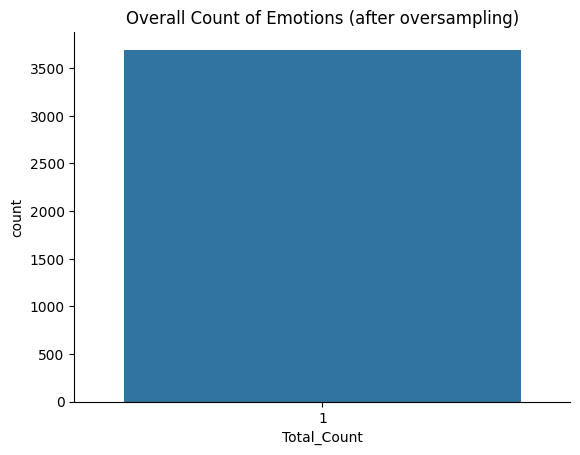

In [ ]:
# Sum the counts across all emotion columns
y_resampled_df['Total_Count'] = y_resampled_df.sum(axis=1)

plt.title("Overall Count of Emotions (after oversampling)")
sns.countplot(x=y_resampled_df['Total_Count'])
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
# Normalization as per the standard NN process
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean) / std
X_val = (X_val - mean) / std
X_test = (X_test - mean) / std

# Print the shapes of the normalized sets
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)


(2956, 81, 144, 1) (884, 81, 144, 1) (739, 81, 144, 1) (2956, 5) (884, 5) (739, 5)


In [ ]:
y_train.nunique()

Emotions_angry      2
Emotions_calm       2
Emotions_happy      2
Emotions_neutral    2
Emotions_sad        2
dtype: int64

In [ ]:
y_train.Emotions_angry.unique()

array([0, 1])

In [ ]:
y_train.Emotions_sad.unique()

array([0, 1])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping

accuracy_threshold = 0.97

class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= accuracy_threshold:
            print("\nReached %2.2f%% accuracy, stopping training" % (accuracy_threshold * 100))
            self.model.stop_training = True

# Callbacks
filepath = "/content/drive/MyDrive/THESIS/BanglaSER/best_model/ICEEICT_main_BanglaSER_HYbrid_CNN_GRU_cochlea_aug.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                             save_weights_only=False, mode='max')

lr_schedule = LearningRateScheduler(lambda epoch: 0.001 * (0.1 ** int(epoch / 10)))

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# callback list
callback_list = [myCallback(), checkpoint, lr_schedule, early_stopping]

In [ ]:
pip install keras-self-attention

  Preparing metadata (setup.py) ... done
  Created wheel for keras-self-attention: filename=keras_self_attention-0.51.0-py3-none-any.whl size=18895 sha256=c633925147213f92b97098436f6c17489cff365d133423fa9aec09fc503402a7
  Stored in directory: /root/.cache/pip/wheels/b8/f7/24/607b483144fb9c47b4ba2c5fba6b68e54aeee2d5bf6c05302e
Successfully built keras-self-attention


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, GRU, Reshape, BatchNormalization, Dropout,GlobalAveragePooling2D
from keras_self_attention import SeqSelfAttention
from tensorflow.keras.regularizers import l2

# Create the 2D CNN model with self-attention and regularization
nclass = 5
cnn_input = Input(shape=(81, 144, 1))
x = Conv2D(64, 5, padding='same', activation='relu')(cnn_input)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(5, 5), padding='same')(x)

x = Conv2D(128, 5, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(5, 5), padding='same')(x)
x = Dropout(0.2)(x)

x = Conv2D(128, 5, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(5, 5), padding='same')(x)

x = Conv2D(256, 3, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(5, 5), padding='same')(x)
x = Dropout(0.2)(x)

x = Conv2D(512, 3, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(3, 3), padding='same')(x)
x = Dropout(0.2)(x)




x = Flatten()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.1))(x)
x = BatchNormalization()(x)

# Now you can connect this new CNN part with your GRU and Dense layers
x = Reshape((-1, 128))(x)
x = GRU(128, return_sequences=True, kernel_regularizer=l2(0.1))(x)
x = SeqSelfAttention(attention_activation='tanh')(x)
x = GRU(64, kernel_regularizer=l2(0.1))(x)  # Add more GRU layers as needed
x = Dropout(0.3)(x)

out = Dense(nclass, activation='softmax')(x)

model = Model(inputs=cnn_input, outputs=out)

# Compile the hybrid model with an appropriate optimizer and loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the hybrid model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 81, 144, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 81, 144, 64)       1664      
                                                                 
 batch_normalization (Batch  (None, 81, 144, 64)       256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 17, 29, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 29, 128)       204928    
                                                                 
 batch_normalization_1 (Bat  (None, 17, 29, 128)       512   

In [ ]:
history=model.fit(X_train, y_train, epochs=50,validation_data = (X_val,y_val),callbacks=[checkpoint],batch_size=32)

Epoch 1/50
93/93 [==============================] - ETA: 0s - loss: 1.2949 - accuracy: 0.4882
Epoch 1: val_accuracy improved from 0.23816 to 0.31935, saving model to /content/drive/MyDrive/THESIS/BanglaSER/best_model/BanglaSER_HYbrid_CNN_GRU_cochlea_aug.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


93/93 [==============================] - 128s 1s/step - loss: 1.2949 - accuracy: 0.4882 - val_loss: 1.6952 - val_accuracy: 0.3194
Epoch 2/50
93/93 [==============================] - ETA: 0s - loss: 1.1767 - accuracy: 0.5186
Epoch 2: val_accuracy improved from 0.31935 to 0.33424, saving model to /content/drive/MyDrive/THESIS/BanglaSER/best_model/BanglaSER_HYbrid_CNN_GRU_cochlea_aug.h5
93/93 [==============================] - 123s 1s/step - loss: 1.1767 - accuracy: 0.5186 - val_loss: 1.4738 - val_accuracy: 0.3342
Epoch 3/50
93/93 [==============================] - ETA: 0s - loss: 1.1012 - accuracy: 0.5487
Epoch 3: val_accuracy improved from 0.33424 to 0.50338, saving model to /content/drive/MyDrive/THESIS/BanglaSER/best_model/BanglaSER_HYbrid_CNN_GRU_cochlea_aug.h5
93/93 [==============================] - 124s 1s/step - loss: 1.1012 - accuracy: 0.5487 - val_loss: 1.3062 - val_accuracy: 0.5034
Epoch 4/50
93/93 [==============================] - ETA: 0s - loss: 1.0363 - accuracy: 0.5822
Ep

In [ ]:
# Evaluation# Evaluation
print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

28/28 [==============================] - 8s 285ms/step - loss: 0.3973 - accuracy: 0.9118
Accuracy of our model on test data :  91.17646813392639 %


In [ ]:
# Evaluation# Evaluation
print("Accuracy of our model on valodation data : " , model.evaluate(X_val,y_val)[1]*100 , "%")

24/24 [==============================] - 7s 292ms/step - loss: 0.4101 - accuracy: 0.9012
Accuracy of our model on valodation data :  90.12178778648376 %


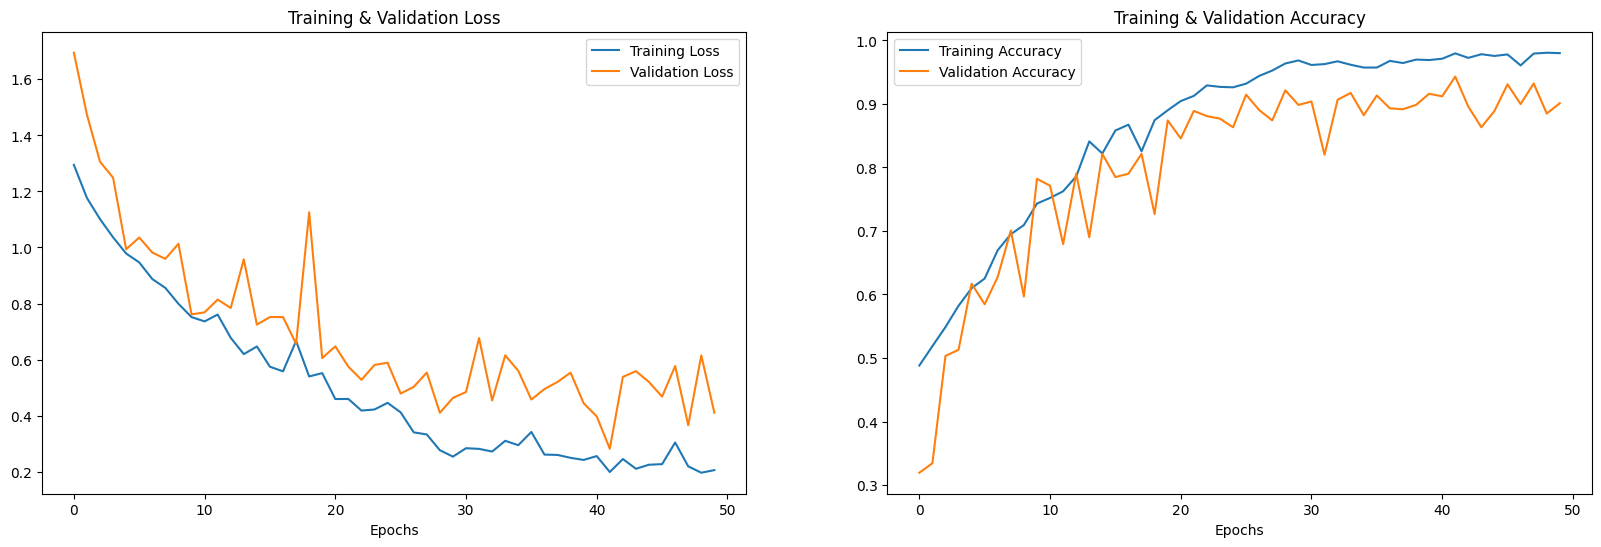

In [ ]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

28/28 [==============================] - 11s 355ms/step


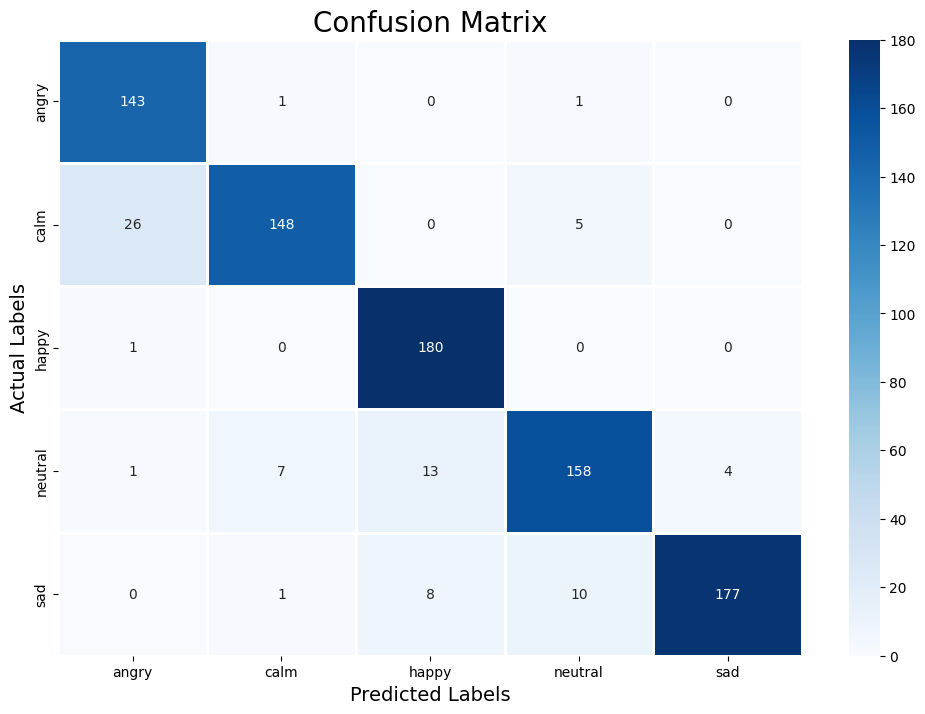

              precision    recall  f1-score   support

       angry       0.84      0.99      0.91       145
        calm       0.94      0.83      0.88       179
       happy       0.90      0.99      0.94       181
     neutral       0.91      0.86      0.89       183
         sad       0.98      0.90      0.94       196

    accuracy                           0.91       884
   macro avg       0.91      0.91      0.91       884
weighted avg       0.92      0.91      0.91       884



In [ ]:
# predicting on test data.
pred_test = model.predict(X_test)
#pred_test = pred_test.astype(int).flatten()
y_pred = encoder.inverse_transform(pred_test)

#y_test = y_test.astype(int).flatten()
y_test = encoder.inverse_transform(y_test)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 8))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test, y_pred))